# Machine Learning Engineer Nanodegree
## Capstone Project
Antal Berenyi  
April 1, 2018

## I. Definition

### Project Overview

#### Domain Background
Lending Club (LC) operates an online, peer-to-peer lending platform that enables borrowers to obtain a loan, and investors to purchase notes backed by payments made on loans.  The company claims that \$15.98 billion in loans had been originated through its platform up to December 31, 2015. [wikipedia](https://en.wikipedia.org/wiki/Lending_Club) Loans can be issued for a variety of purposes, such as loan consolidation, car purchase, medical, etc. Loans are issued as $25 notes so that lenders may diversify their investment over many loans. Loan terms are either 36 or 60 months.

![loan purpose](images/loan purpose small.jpeg)

LC divides loans into categores A,B,C,D,E,FG, based on variables that measure the quality of the loan. A is highest and FG is lowest. Category A loans offers the lowest rate of return backed by borrowes with highest credit rating therefore it is the safest investment. FG are the riskiest loans with high interest rate but least likely to be repaid.

![interest%20rate.jpeg](images/interest%20rate%20small.jpeg)

[source](https://www.lendingclub.com/info/demand-and-credit-profile.action)

If a borrower does not pay a loan installment on time, its status changes from `current` to `grace period` for 14 days. After that the loan status changes to `delinquent`, then to `late`, then `charged off` after 3 months if not paid.

I have been investing in LC for about 3 years. Over this time period I have invested in a range of loan classes. About 50% of the interest earned was erased by load charge-offs. Identifying loans likely to be charged-off means that investor profit could be increased by not investing in those notes. [invesing in LC](https://blog.lendingclub.com/5-key-things-know-investing-lendingclub-notes/)


In this section, look to provide a high-level overview of the project in layman’s terms. Questions to ask yourself when writing this section:
- _Has an overview of the project been provided, such as the problem domain, project origin, and related datasets or input data?_
- _Has enough background information been given so that an uninformed reader would understand the problem domain and following problem statement?_

### Problem Statement

The goal is to identify which loans are likely to be charge-off. Charge-offs impact investor returns because investors lose both investment capital plus the potential to earn interest. 

![chargeoff-small.jpeg](images/chargeoff-small.jpeg)
[source](https://blog.lendingclub.com/5-key-things-know-investing-lendingclub-notes/)

To solve this problem we need to identify a correlation between loan features and "charge-off" probability. In order to classify loans as "charge-off" vs. "non-charge-off" we need to do the following tasks:

 - Obtain loan data containing details about the loan terms and borrower information
 - Establish benchmark metrics against which to measure classifier
 - Clean and pre-process data for feeding the classifier
 - Tune the classifier
 - Predict loan charge-off
 
To quantify the problem: the charge-off rate can be calculated as the percentage of loans with status "charge-off" from the data set. 

To measure performance: The trained classifier should perform better than the bechmark classifier; it should identify charge-off loans better than a naive classifier. The naive classifier picks notes randomly as `charge-off` loans.

### Metrics
In this section, you will need to clearly define the metrics or calculations you will use to measure performance of a model or result in your project. These calculations and metrics should be justified based on the characteristics of the problem and problem domain. Questions to ask yourself when writing this section:
- _Are the metrics you’ve chosen to measure the performance of your models clearly discussed and defined?_
- _Have you provided reasonable justification for the metrics chosen based on the problem and solution?_


I am planning to measure performance by Recall.
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples (charge-offs). This problem is similar to a fraud detector where we aim to catch all positive cases. We don't want a very high rate of False positives either because that would eliminate valid investment opportunities, so reporting a Precision score is also meaningful.

#### Evaluating performance
To measure performance: The trained classifier should perform better than a naive classifier; it should identify charge-off loans with a better Recall than a naive classifier. The naive classifier picks notes randomly with the same probability as the percentage of actual `charge-off` loans.

The best evaluation metric would be Recall. We want to label all charged off loans to minimize our loss. It is OK to mislabel a few loans as false positive, so the situation is similar to a fraud detector or spam filter, where we are aiming for high Recall. Metric must be better than for the Naive predictor: Recall > 0.5 and F2 > 0.132. 

For the Naive predictor, given about 3.35% charge-off rate, the metrics would be:

| Accuracy|Precision|Recall|F1|F2|
|----|----|----|----|----|
|0.5|0.0335|0.5|0.0627|0.132|


### Datasets and Inputs
LC collects extensive statistics on borrowers that they make their rating based on. The borrower data used for this project is publicly available on the LC web site [https://www.lendingclub.com/info/download-data.action-data](https://www.lendingclub.com/info/download-data.action). It contains all the LendingClub loan information available for investors to make a decision about whenter to fund the loan or not. The [https://resources.lendingclub.com/LCDataDictionary.xlsx](https://resources.lendingclub.com/LCDataDictionary.xlsx) file lists the feature with explanation about each feature. The data is in zipped up .csv format that can be imported in Excel, Pandas or other tools. 

This data set should contain a mix of 3yr and 5yr loans that originated up to 5 years ago and new newer loans, with all possible status. For example the Q1 2017 data set contains anonymized information for about 96,781 loans with 151 features. 

The zipped file size is about 22MB while unzipped it is 110 MB. Each row represents a loan. Each column is a feature. Column "loan_status" is the target variable to be predicted. The finacial data set is donwloadable in quarterly and yearly chunks. 
These features relate information about the loand and the borrower: `loan amount, interest rate, grade, purpose; borrower income, geography, employment status, FICO score, etc.` This information will be used to find a good indicator (predictor) of why a borrower may default on a loan. [https://resources.lendingclub.com/LoanStats_2017Q1.csv.zip](https://resources.lendingclub.com/LoanStats_2017Q1.csv.zip)

## II. Analysis
_(approx. 2-4 pages)_

### Data Exploration
In this section, you will be expected to analyze the data you are using for the problem. This data can either be in the form of a dataset (or datasets), input data (or input files), or even an environment. The type of data should be thoroughly described and, if possible, have basic statistics and information presented (such as discussion of input features or defining characteristics about the input or environment). Any abnormalities or interesting qualities about the data that may need to be addressed have been identified (such as features that need to be transformed or the possibility of outliers). Questions to ask yourself when writing this section:
- _If a dataset is present for this problem, have you thoroughly discussed certain features about the dataset? Has a data sample been provided to the reader?_
- _If a dataset is present for this problem, are statistics about the dataset calculated and reported? Have any relevant results from this calculation been discussed?_
- _If a dataset is **not** present for this problem, has discussion been made about the input space or input data for your problem?_
- _Are there any abnormalities or characteristics about the input space or dataset that need to be addressed? (categorical variables, missing values, outliers, etc.)_

In [1]:
import pandas as pd
from preprocess_visuals import *
%matplotlib inline
# df = pd.read_csv('https://resources.lendingclub.com/LoanStats_2017Q1.csv.zip', 
#                  usecols=get_usecols(), skiprows=1, compression='zip', low_memory=False)

df = pd.read_csv('data/LoanStats_securev1_2017Q1.csv', skiprows=1, skipfooter=2, 
                 engine='python', usecols=get_usecols(), converters=get_conv())

display(df.head(10))

loan_amnt  term  int_rate  installment  grade  emp_title emp_length  \
0      15000     0      5.32       451.73      7          0  10+ years   
1      17000     0      7.49       528.73      7          0  10+ years   
2      20000     0      5.32       602.30      7          0    3 years   
3      16000     1     12.74       361.93      5          0  10+ years   
4       2000     0     16.99        71.30      4          0    6 years   
5      11875     0     11.44       391.26      6          0  10+ years   
6       5000     0     14.99       173.31      5          0  10+ years   
7      14400     0     12.74       483.40      5          1        NaN   
8       6800     0     13.49       230.73      5          0   < 1 year   
9      13000     0      6.99       401.35      7          0  10+ years   

  home_ownership  annual_inc verification_status   issue_d  loan_status  \
0       MORTGAGE    182000.0        Not Verified  Mar-2017            0   
1       MORTGAGE    120000.0        Not Verified  Mar-2017            0   
2           RENT    120000.0        Not Verified  Mar-2017            0   
3       MORTGAGE    130000.0        Not Verified  Mar-2017            0   
4       MORTGAGE     62000.0        Not Verified  Mar-2017            0   
5       MORTGAGE     55000.0        Not Verified  Mar-2017            0   
6           RENT     68000.0        Not Verified  Mar-2017            0   
7       MORTGAGE     61000.0            Verified  Mar-2017            0   
8           RENT     55000.0        Not Verified  Mar-2017            0   
9       MORTGAGE    120000.0     Source Verified  Mar-2017            0   

              purpose zip_code    dti  delinq_2yrs earliest_cr_line  \
0  debt_consolidation    751xx   9.35            0         Nov-1974   
1  debt_consolidation    840xx   8.41            0         Oct-2005   
2         credit_card    926xx  26.54            0         Aug-2002   
3  debt_consolidation    577xx   8.28            0         Jul-1995   
4         credit_card    983xx  16.43            0         Oct-2007   
5    home_improvement    480xx  34.50            0         Apr-1997   
6  debt_consolidation    945xx  22.50            0         Apr-2003   
7         credit_card    864xx  14.24            0         Dec-1989   
8         credit_card    908xx  20.73            0         Dec-2006   
9  debt_consolidation    600xx   8.30            0         Dec-1997   

   fico_range_low  fico_range_high  inq_last_6mths  mths_since_last_delinq  \
0             740              744               0                     NaN   
1             735              739               0                    72.0   
2             770              774               1                     NaN   
3             680              684               0                    42.0   
4             680              684               2                    57.0   
5             730              734               0                    75.0   
6             660              664               0                    27.0   
7             670              674               0                    41.0   
8             730              734               1                     NaN   
9             715              719               0                    42.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN        13        0      34623       33.7         32   
1                    89.0         9        1      15406       31.6         34   
2                     NaN        18        0       2646          3         60   
3                    79.0        16        1       8595       25.8         48   
4                    44.0        10        2       6504       44.9         20   
5                     NaN        14        0      17823       39.4         28   
6                     NaN         6        0      10276       90.1         18   
7                     NaN        10        0      15377         62       

### Data Exploration
### Features
The 2017Q1 LC data set has 145 features and 96781 rows available in the data set for analysis for loans issued in that time period. I am working with this particular subset because it has a mixture there hase been sufficient time since issuance for loans to go to default.

I ended up using only 100 features; some of the original ones, and engineered features such as polynomial interactions to boost prediction performance.  A description of the features can be read in the data dictionary [https://resources.lendingclub.com/LCDataDictionary.xlsx](https://resources.lendingclub.com/LCDataDictionary.xlsx). 


- member_id - This will be removed because the data set is anonymized anyways.
- loan_status - Current status of the loan. This is a categorical feature but I encode 1 = "charge-off", 0 = "good"
- loan_amnt - The listed amount of the loan applied for by the borrower. The max loan amount is $ 40,000.
- term - The number of payments on the loan. Values are in months and can be either 36 or 60. 
- int_rate - Interest Rate on the loan
- installment - The monthly payment owed by the borrower if the loan originates.
- grade - LC assigned loan grade.  A,B,C,D,E,F - that need to be one-hot-encoded
- emp_length - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- home_ownership - The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
- annual_inc - The self-reported annual income provided by the borrower during registration. It is numerical and has several outliers, which were removed.
- verification_status - Indicates if income was verified by LC, not verified, or if the income source was verified
- issue_d - The month which the loan was funded
- purpose - A category provided by the borrower for the loan request. 
- zip_code - The first 2 numbers of the zip code provided by the borrower in the loan application. 
- dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- earliest_cr_line - The month the borrower's earliest reported credit line was opened
- fico_range_low - The lower boundary range the borrower’s FICO at loan origination belongs to. Drop.
- fico_range_high - The upper boundary range the borrower’s FICO at loan origination belongs to. Drop.
- fico_range_mean - The mean values of fico_range_low and fico_range_high, which will beused instead of high and low values.
- inq_last_6mths - The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- mths_since_last_delinq - The number of months since the borrower's last delinquency.
- mths_since_last_record - The number of months since the last public record.
- open_acc - The number of open credit lines in the borrower's credit file.
- pub_rec - Number of derogatory public records
- emp_title - The job title supplied by the Borrower when applying for the loan.* The title to loan ration is 1/3, therefore most values are unique. I have decided to encode title as missing-not missing.
- revol_bal - Total credit revolving balance
- revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- total_acc - The total number of credit lines currently in the borrower's credit file
- initial_list_status - The initial listing status of the loan. Possible values are – W, F
- last_fico_range_high - The upper boundary range the borrower’s last FICO pulled belongs to.
- last_fico_range_low - The lower boundary range the borrower’s last FICO pulled belongs to.
- collections_12_mths_ex_med - Number of collections in 12 months excluding medical collections
- mths_since_last_major_derog - Months since most recent 90-day or worse rating
- application_type - Indicates whether the loan is an individual application or a joint application with two co-borrowers
- annual_inc_joint - The combined self-reported annual income provided by the co-borrowers during registration
- dti_joint - A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income
- acc_now_delinq - The number of accounts on which the borrower is now delinquent.
- tot_coll_amt - Total collection amounts ever owed
- tot_cur_bal - Total current balance of all accounts
- open_acc_6m - Number of open trades in last 6 months
- open_act_il - Number of currently active installment trades
- open_il_12m - Number of installment accounts opened in past 12 months
- open_il_24m - Number of installment accounts opened in past 24 months
- mths_since_rcnt_il - Months since most recent installment accounts opened
- total_bal_il - Total current balance of all installment accounts
- il_util - Ratio of total current balance to high credit/credit limit on all install acct
- open_rv_12m - Number of revolving trades opened in past 12 months
- open_rv_24m - Number of revolving trades opened in past 24 months
- max_bal_bc - Maximum current balance owed on all revolving accounts
- all_util - Balance to credit limit on all trades
- inq_fi - Number of personal finance inquiries
- total_cu_tl - Number of finance trades
- inq_last_12m - Number of credit inquiries in past 12 months
- acc_open_past_24mths - Number of trades opened in past 24 months.
- avg_cur_bal - Average current balance of all accounts
- bc_open_to_buy - Total open to buy on revolving bankcards.
- bc_util - Ratio of total current balance to high credit/credit limit for all bankcard accounts.
- chargeoff_within_12_mths - Number of charge-offs within 12 months
- delinq_amnt - The past-due amount owed for the accounts on which the borrower is now delinquent.
- mo_sin_old_il_acct - Months since oldest bank installment account opened
- mo_sin_old_rev_tl_op - Months since oldest revolving account opened
- mo_sin_rcnt_rev_tl_op - Months since most recent revolving account opened
- mo_sin_rcnt_tl - Months since most recent account opened
- mort_acc - Number of mortgage accounts.
- mths_since_recent_bc - Months since most recent bankcard account opened.
- mths_since_recent_inq - Months since most recent inquiry.
- num_accts_ever_120_pd - Number of accounts ever 120 or more days past due
- num_actv_bc_tl - Number of currently active bankcard accounts
- num_actv_rev_tl - Number of currently active revolving trades
- num_bc_sats - Number of satisfactory bankcard accounts
- num_bc_tl - Number of bankcard accounts
- num_il_tl - Number of installment accounts
- num_op_rev_tl - Number of open revolving accounts
- num_rev_accts - Number of revolving accounts
- num_rev_tl_bal_gt_0 - Number of revolving trades with balance >0
- num_sats - Number of satisfactory accounts
- num_tl_30dpd - Number of accounts currently 30 days past due (updated in past 2 months)
- num_tl_90g_dpd_24m - Number of accounts 90 or more days past due in last 24 months
- num_tl_op_past_12m - Number of accounts opened in past 12 months
- pct_tl_nvr_dlq - Percent of trades never delinquent
- percent_bc_gt_75 - Percentage of all bankcard accounts > 75% of limit.
- pub_rec_bankruptcies - Number of public record bankruptcies
- tax_liens - Number of tax liens
- tot_hi_cred_lim - Total high credit/credit limit
- total_bal_ex_mort - Total credit balance excluding mortgage
- total_bc_limit - Total bankcard high credit/credit limit
- total_il_high_credit_limit - Total installment high credit/credit limit

* Join borrowers columns: I have filled the missing values with zeros for Individual borrowers. 

** I have decided to not consider hardship flags since it is very rare, all values except one are N. I have removed all the settlement columns since they are indiactive what happens AFTER the charge-off. 

### Exploratory Visualization

I have developed a visualization method that compares the distribution of the null class agains the positive class (charge-off). The most relevant feature would appear as having difference between the means of the positive and negative distribtion.

In this section, you will need to provide some form of visualization that summarizes or extracts a relevant characteristic or feature about the data. The visualization should adequately support the data being used. Discuss why this visualization was chosen and how it is relevant. Questions to ask yourself when writing this section:
- _Have you visualized a relevant characteristic or feature about the dataset or input data?_
- _Is the visualization thoroughly analyzed and discussed?_
- _If a plot is provided, are the axes, title, and datum clearly defined?_

### loan_status
First we look at the target distribution, loan_status. We can see that the target class is a minority class so we'll need to compensate for it during training to achieve a balanced training set. We'll also encode it as Charged-off=1, all other = 0.

This is the target to be predicted. We need to encode it: Charged-off and default is 1, all the others are 0.

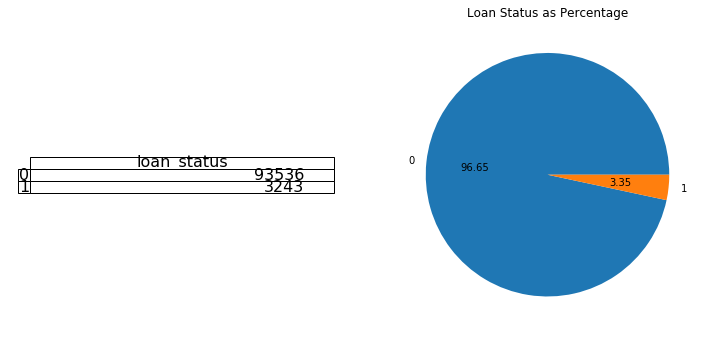

In [2]:
ls_vc = df.loan_status.value_counts()
plt.figure(figsize=(12,6)); 
ax1 = plt.subplot(122, aspect='equal'); ls_vc.plot.pie(ax=ax1, autopct='%.2f'); plt.ylabel(''); plt.title('Loan Status as Percentage');
ax2 = plt.subplot(121); plt.axis('off'); tbl = table(ax2, ls_vc, loc='center'); tbl.set_fontsize(16);

### loan_amount & installment
Plot of the Distribution of Loan Amount and Installment. They are numerical values, we can leave them as is.
This plot shows how much each month the borrower needs to replay. The mean is between 200 and 300.

Missing values for loan_amnt 0


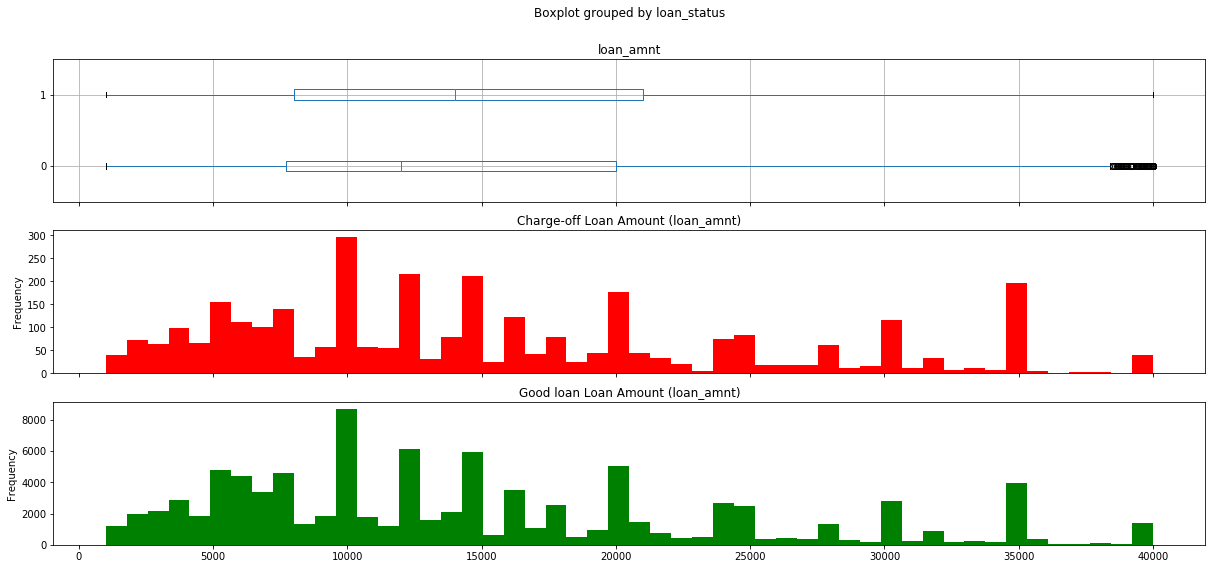

In [3]:
plot_box_hist2(df, 'loan_amnt', title='Loan Amount', bins=50)

#### Plot of the Distribution of Loan Amount and installment
This plot shows how much each month the borrower needs to replay. The mean is between 200 and 300.

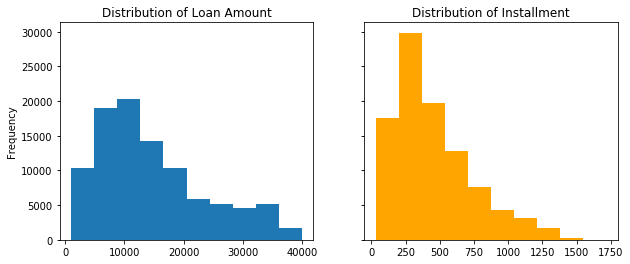

In [4]:
fig, ax = plt.subplots(figsize=(10,4))
plt.subplot(121, sharey=ax); df.loan_amnt.plot.hist(title='Distribution of Loan Amount');
plt.subplot(122, sharey=ax); df.installment.plot.hist(title='Distribution of Installment', color='orange');

#### Histogram of loan terms.
There are only 36 and 60 month terms.

Missing values: 0  Missing percent: 0.0


term
1  24369
0  72410

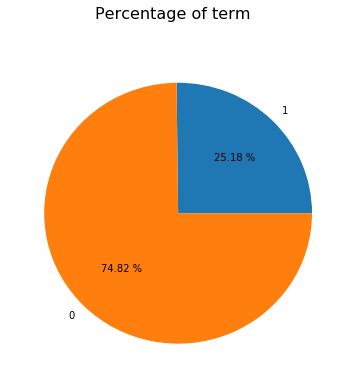

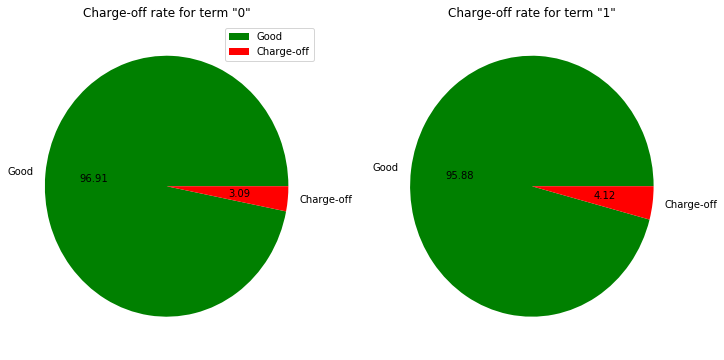

In [5]:
analyze_col(df, 'term', showgroups=True)

### int_rate
Interest rate is a percentage value. We need to keep the float value of the string. The statistics for the interest rate are in the tables below. Overall the charge-off loans have higher mean interest rate of 17.45%, while the good loans have 13.23%. 

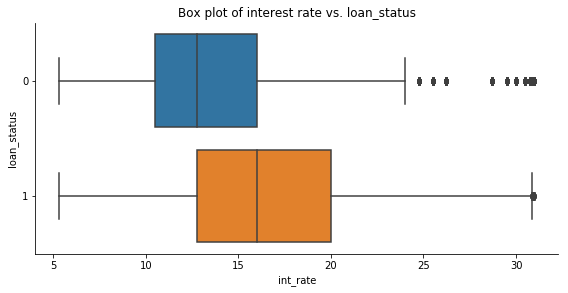

In [6]:
sns.factorplot(kind='box', orient='horizontal', x='int_rate', y='loan_status', aspect=2,
               data=df[['loan_status', 'int_rate']]); plt.title('Box plot of interest rate vs. loan_status');

### grade
Loans are divided into sub-categores based on borrower rating. A is best and G is worst. I will one-hot encode each grade as a number from 1 to 7. The factor plot also reveals that the worse the loan grade the higher the loan amount, but unfortunately the loan_amount median values for chargeoff and good loans are about the same for each grade.

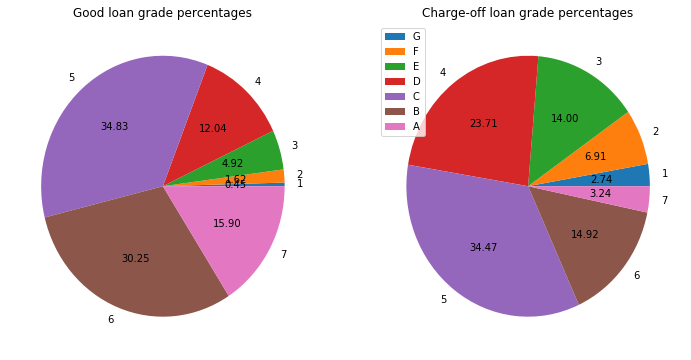

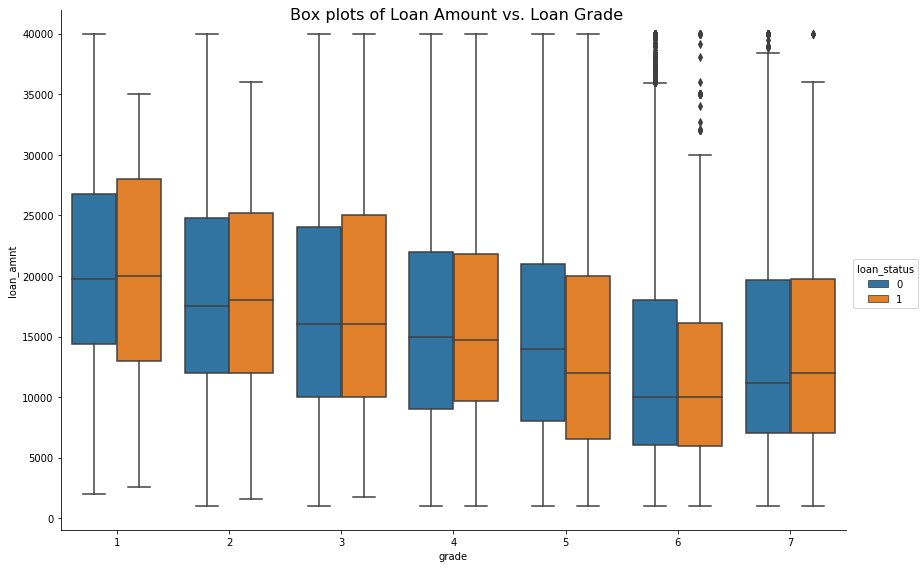

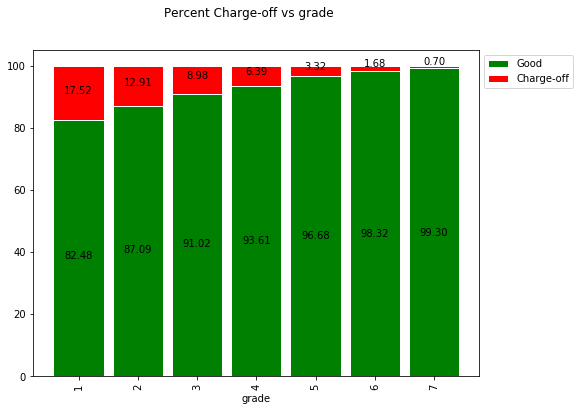

In [7]:
gls = df.groupby(['grade','loan_status']).size()
plt.subplots(12, figsize=(12, 6))
plt.subplot(121); 
gls.xs(0, level=1).plot.pie( autopct='%.2f');
plt.ylabel(''); plt.title('Good loan grade percentages');

plt.subplot(122); 
gls.xs(1, level=1).plot.pie( autopct='%.2f');
plt.legend(labels=['G','F', 'E', 'D', 'C', 'B', 'A'], loc=2);plt.ylabel('');plt.title('Charge-off loan grade percentages');

sns.factorplot(data=df, kind='box', y='loan_amnt', x='grade', hue='loan_status', hue_order=[0,1],
                size=8,  aspect=1.5); plt.suptitle('Box plots of Loan Amount vs. Loan Grade', fontsize=16);

percent_col(df, 'grade')

### emp_length
About one third of the loans were given to individuals with 10+ years of employment. The other 2/3 are given in a much lower proportion to shorter term. 10+ is a collective buckes as includes employment lenghts of 11, 12, 15, 20 up to retirement. I encode employment length with the number of years, where the label is the year. 10+ years is encoded as 12, < 1 year is 0.5, and where not available it is 0.

Missing values: 6792  Missing percent: 0.0701805143677864


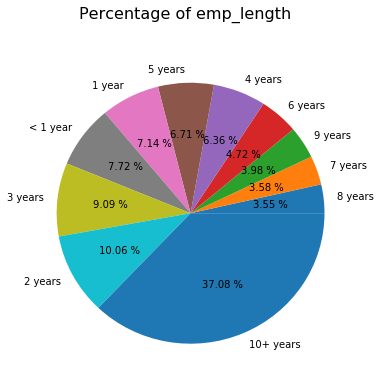

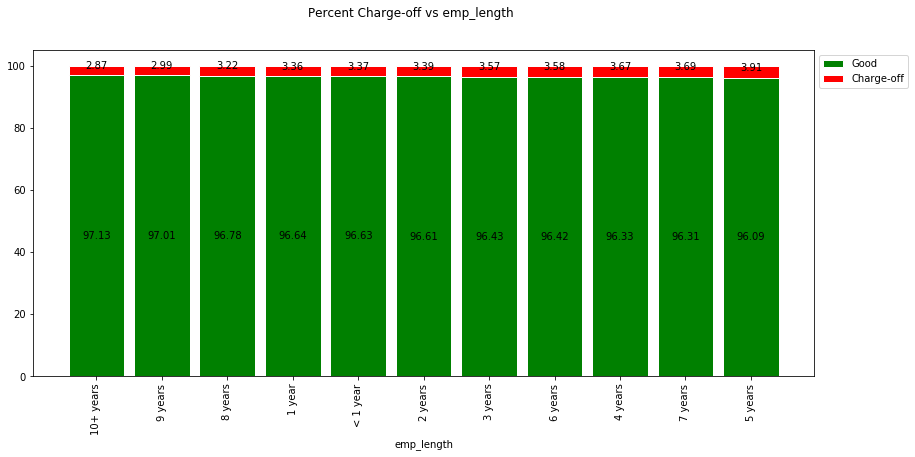

In [8]:
analyze_col(df,'emp_length', showtable=False, showgroups=False)
percent_col(df, 'emp_length', figsize=(14, 6))

### home_ownership
About half of the loan recipients pay mortgage, compared to renting, owning or other. It begs to ask how much money borrowers have left over after paying their mortgages? It seems reasonable to think that people with a long a reliable mortgage history may have higher rating. It will be worth investigating correlation between Home Ownership and other features. Also does NONE mean that a borrower is homeless? Other features such as car ownership would be useful to know: a person may default on other loans before a car loan.
    

Missing values: 0  Missing percent: 0.0


home_ownership
ANY                  382
OWN                11135
RENT               37179
MORTGAGE           48083

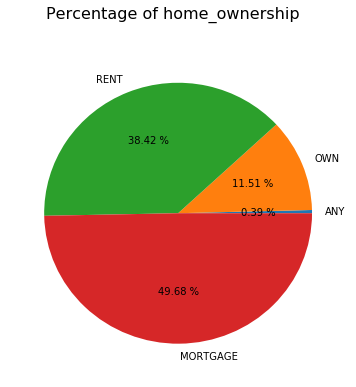

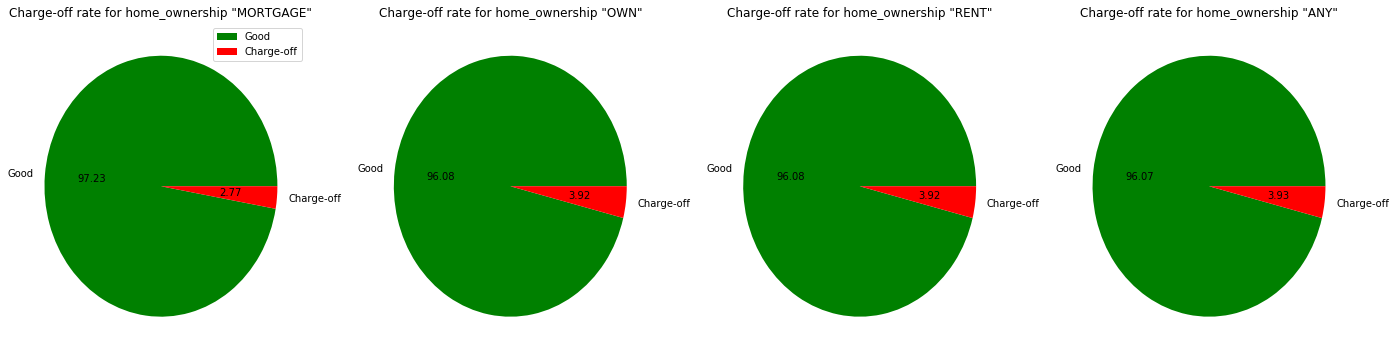

In [9]:
df.loc[df['home_ownership'] == 'NONE', 'home_ownership'] = 'ANY'
analyze_col(df, 'home_ownership', showgroups=True)

### annual_inc
The annual income is perhaps one of the pivotal features. It is worth taking a deeper look. The histogram below shows income distribution in the \$0-200k range. There appears to be spurious data, for illustration see the table. There is a  borrower with income \$61 million and emp_title indicated waitress. There is some data that is suspicious and unlikely. It may be worth asking LC a few questions about their verification process! 
Also, it appears as if there were three nested distributions, I am not sure if it is real.

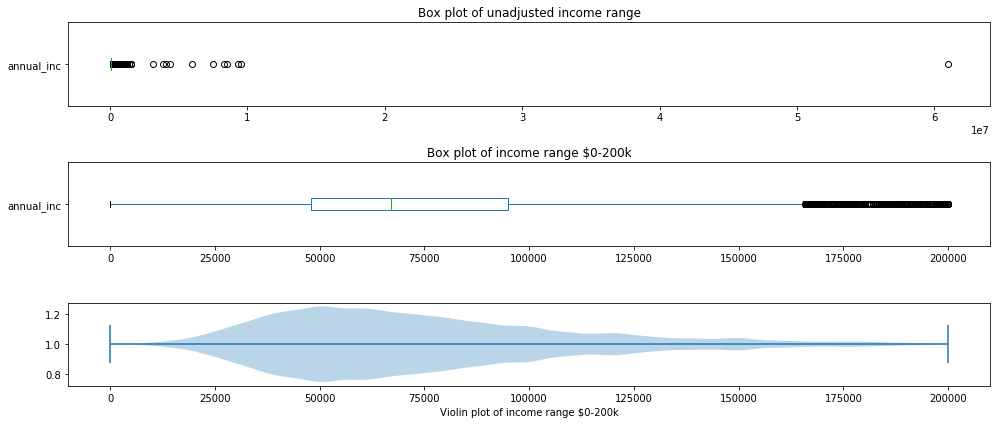

In [10]:
fig, axes = plt.subplots(3,1,figsize=(14,6))
plt.subplot(311)
plt.title='Income distribution'
df.annual_inc.plot.box(vert=False, title='Box plot of unadjusted income range');

plt.subplot(312)
df[df.annual_inc < 2e5].annual_inc.plot.box(vert=False, title='Box plot of income range $0-200k');

plt.subplot(313)
plt.violinplot(df[df.annual_inc < 2e5].annual_inc, vert=False);
plt.xlabel('Violin plot of income range $0-200k');
plt.tight_layout()

The log-transformed annual_inc shows a better distribution

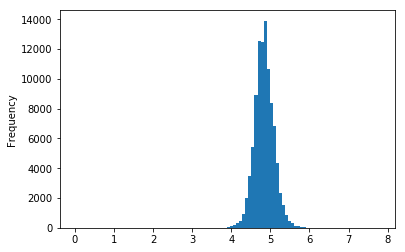

In [11]:
np.log10(df[df.annual_inc > 0].annual_inc).plot.hist(bins=100);

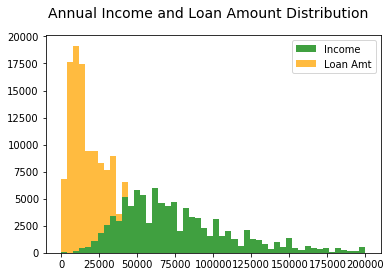

In [12]:
a,b,c = plt.hist((df.annual_inc, df.loan_amnt), 50, color=['g','orange'], 
                histtype='barstacked', stacked=True, range=(0, 200000), alpha=0.75)
plt.suptitle('Annual Income and Loan Amount Distribution', fontsize=14);
plt.legend(['Income', 'Loan Amt']);

### application_type
Some borrower borrow jointly with other individuals. The joint status type of the loan is indicated by this field.

Missing values: 0  Missing percent: 0.0


application_type
0              4407
1             92372

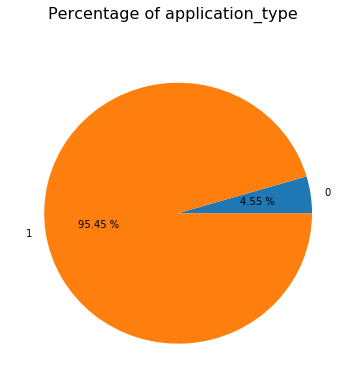

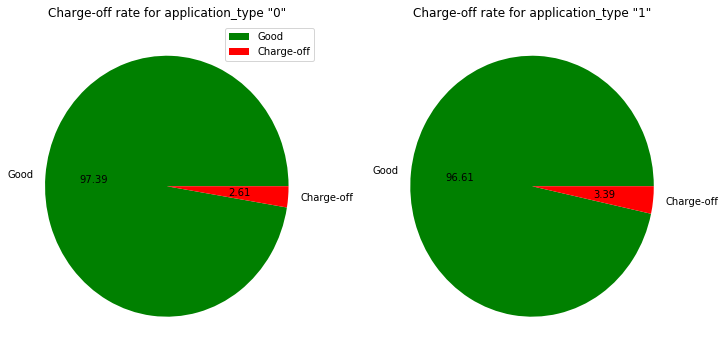

In [13]:
analyze_col(df, 'application_type', showgroups=True)

### emp_title
The output below shows that about 7% of loans have no employment title. This may be indicative. It may be worth encoding it a title/no title. There is a very large number of different titles, one out of three loans have a unique employment title. Missing employee title has a little higher charge-off rate.

Missing values: 0  Missing percent: 0.0


emp_title
1       6891
0      89888

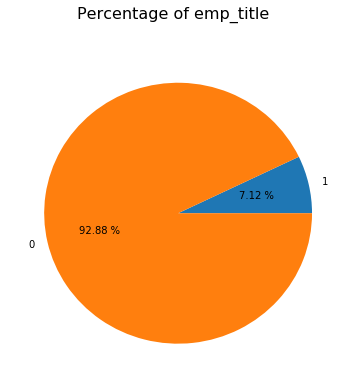

In [14]:
analyze_col(df, 'emp_title')

### verification_status
Indicates if income was verified by LC, not verified, or if the income source was verified. It can take on values 'Source Verified', 'Not Verified', 'Verified'. Below pie plot shows surpisingly that Verified status is charged off at a higher rate than 'Source Verified', 'Not Verified'. The values need to be one-hot encoded.

Missing values: 0  Missing percent: 0.0


verification_status
Verified                       27545
Not Verified                   31016
Source Verified                38218

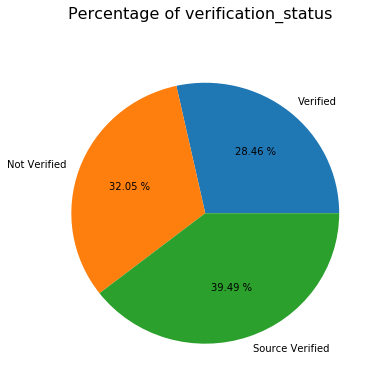

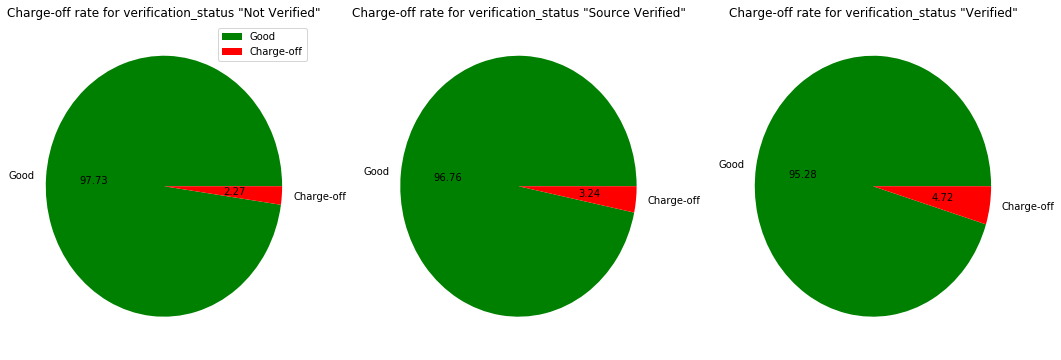

In [15]:
analyze_col(df, 'verification_status', showgroups=True)


### purpose
Purpose is related to charge-off rate, but since it is a categorical variable, it should be encoded. Low frequency groups could be grouped together.

Missing purpose value: False
Missing values: 0  Missing percent: 0.0


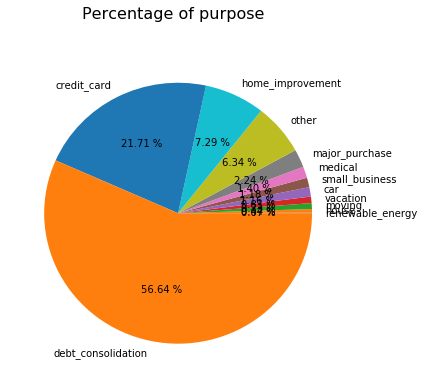

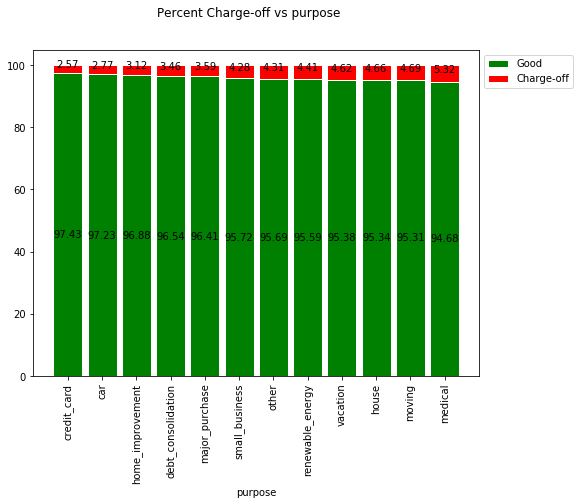

In [16]:
print("Missing purpose value:", df.purpose.isnull().any())
analyze_col(df, 'purpose', showtable=False, showgroups=False)
percent_col(df, 'purpose')

### fico_range_mean
Since the high and los FICO values are very close, I took the mean of the two values. There is a cutoff at 660, only loans higher than that value are approved. 

Missing values for fico_range_mean 0


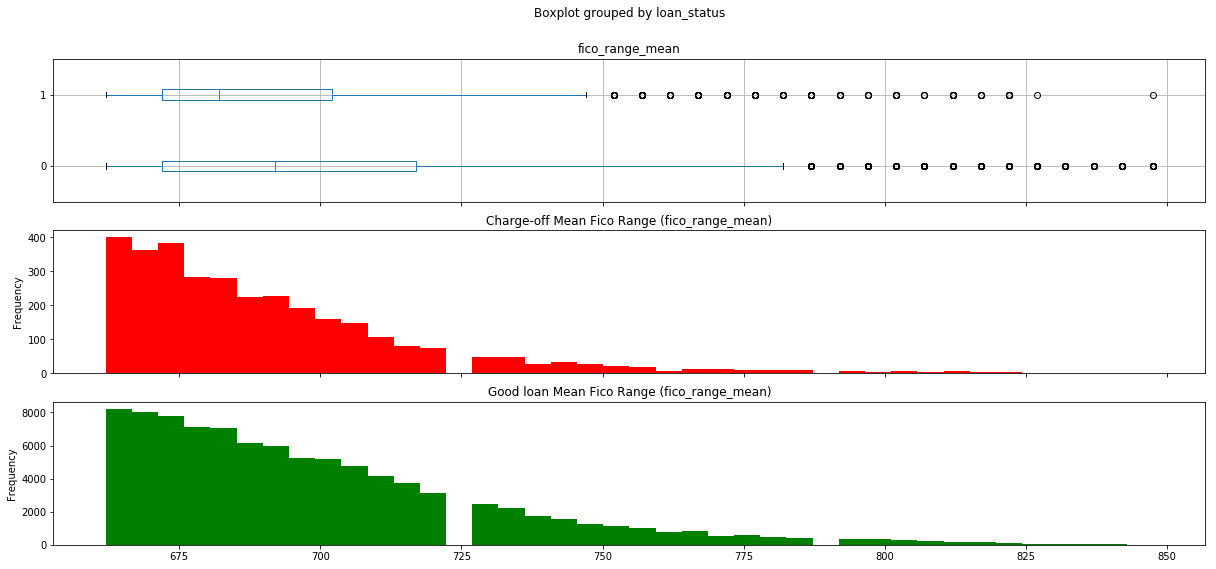

In [17]:
df['fico_range_mean'] = df[['fico_range_high', 'fico_range_low']].mean(1)
plot_box_hist2(df, 'fico_range_mean', title='Mean Fico Range', bins=40)

### inq_last_6mths 
This feature strongly correlates with the charge-off status. It indicates the number of times credit inquiries were run on the borrower's credit history. 

Missing values: 0  Missing percent: 0.0


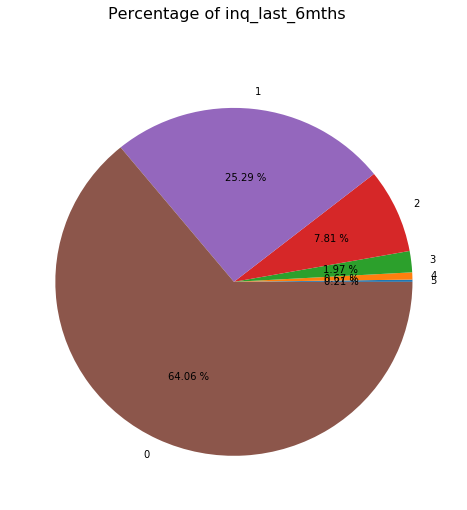

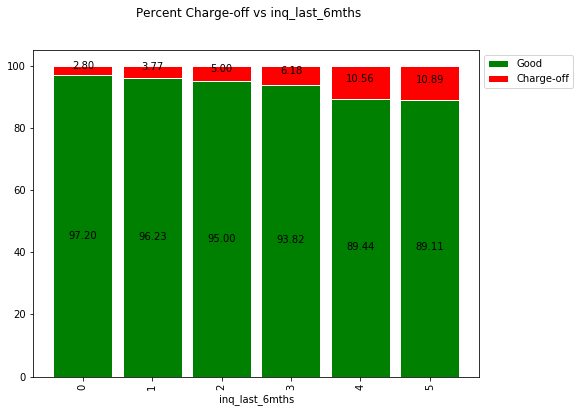

In [18]:
analyze_col(df, 'inq_last_6mths', showtable=False, showgroups=False, piesize=(8, 8))
percent_col(df, 'inq_last_6mths')

### Algorithms and Techniques
In this section, you will need to discuss the algorithms and techniques you intend to use for solving the problem. You should justify the use of each one based on the characteristics of the problem and the problem domain. Questions to ask yourself when writing this section:
- _Are the algorithms you will use, including any default variables/parameters in the project clearly defined?_
- _Are the techniques to be used thoroughly discussed and justified?_
- _Is it made clear how the input data or datasets will be handled by the algorithms and techniques chosen?_

The Decision Tree algorithm used is well suited for the type of problem at hand. We have a large number of variables of different types: categorical, discreet numerical and continuous numerical. Decision Tree and ensemble methods like Random Forest, work well with this kind of data with varying and ranges and types. They don't require special preprocessing apart from data fill-in and encoding. 

The parameters controlling Decision Tree are:
 - criterion - The function to measure the quality of a split. Supported criteria are “gini” (default) for the Gini impurity and “entropy” for the information gain. "Entropy" function performed better than "gini" when all other parameters were the same.
 - max_depth - The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. The tree was surprisingly shallow; the max depth at which the best results were measured was 3.

The input dataset was initially inspected to identify data types, and descriptive statistics such as missing values, mean, std, min and max values, and number of categories in categorical variables. Some of the variables with very low variance and over 90% missing values were dropped. In cases where it made sense, missing values were filled in from other columns, and the FICO range was converted to mean.

After initial preprocessing as described in the section below, the data was split into training and testing in a 80:20 proportion. To find the optimal tree depth and splitting criterion learing curves were generated with the two kinds of splitting criteria and a range of depths. The best  The learning curves used 3-fold cross validation and "recall" scoring method.

The best parameter value was selected and the classifier result reported on the held-out test set. 


http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html



### Benchmark
In this section, you will need to provide a clearly defined benchmark result or threshold for comparing across performances obtained by your solution. The reasoning behind the benchmark (in the case where it is not an established result) should be discussed. Questions to ask yourself when writing this section:
- _Has some result or value been provided that acts as a benchmark for measuring performance?_
- _Is it clear how this result or value was obtained (whether by data or by hypothesis)?_

### Benchmark Model

The benchmark model I intend to use is a naive predictor. It will randomly classify a loan as `charge-off` with the probability of occurence of charge-off loans in the whole data set.

Define the percentage of charged off loans calculated from the data set as P0. That is estimated about 3.335% A naive predictor is built to randomly label a data point as "charge-off" with probability PN = 0.5. Calculate the Recall score of the naive predictor. This will be the benchmark against which the solution will be beasured.



For a model that predicts all notes as charge-off, the metrics would be:

| Accuracy|Precision|Recall|F1|F2|
|----|----|----|----|----|
|0.0335|0.0335|1|0.0648|0.148|

For a model that predicts all notes as OK, the metrics would be:

| Accuracy|Precision|Recall|F1|F2|
|----|----|----|----|----|
|0.9665|0|0|0|0|

For the Naive predictor, given about 3.35% charge-off rate, the metrics would be:

| Accuracy|Precision|Recall|F1|F2|
|----|----|----|----|----|
|0.5|0.0335|0.5|0.0627|0.132|
 

Clearly, a better model would have a better Recall than 50% and F2 score greater than 0.132


[classification-accuracy-is-not-enough](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/)


## III. Methodology
_(approx. 3-5 pages)_

### Data Preprocessing
In this section, all of your preprocessing steps will need to be clearly documented, if any were necessary. From the previous section, any of the abnormalities or characteristics that you identified about the dataset will be addressed and corrected here. Questions to ask yourself when writing this section:
- _If the algorithms chosen require preprocessing steps like feature selection or feature transformations, have they been properly documented?_
- _Based on the **Data Exploration** section, if there were abnormalities or characteristics that needed to be addressed, have they been properly corrected?_
- _If no preprocessing is needed, has it been made clear why?_

1. The data set was read in as DataFrame and the column types, ranges and missing values inspected. Then I have developed specialized data converters to encode and transform the data as it is being read in. 

1. The following columns need converting:
 - loan_status: The target varianble is 1 if 'Charged Off' or 'Default' else 0
 - term: "36 month" is encoded as 0, "60 months" encoded as 1
 - int_rate: the % sign stripped from the string and converted to float
 - revol_util: the % sign stripped from the string and converted to float
 - grade: mapped as follows: {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F':2, 'G': 
 - emp_title: 1 if missing, 0 if a title is given
 - application_type: 'Individual': 1, 'Joint App': 0 
 - initial_list_status: 0 if x == 'w' else 1

1. The following features were one-hot encoded: 
 - verification_status (three distinct values)
 - verification_status_joint (three distinct values)
 - home_ownership 
 - purpose 
 - emp_length (while it is numerical, from visual inspection there did not appear to be a correlation to loan_status)
 
1. After the pre-processing, there remained a large number of numerical variables with some missing values. I have listed them in a table and used sklear.preprocessing.Imputer to fill in missing values with the impute strategy='mean'

1. Before adding interactions I scaled the features so they have similar values. 

1. Since I suspected that there may be interdependce between features, I added 2nd degree polynomial interactions (sklearn.preprocessing.PolynomialFeatures) between the features after the initial classification results were not too great.

1. The polynomial fetures have increased the number of features to over 6000. I then reduced the number of features back to 100 by applying sklearn.feature_selection.SelectKBest.


The following notebook was a helpful guidance in preprocessing: https://github.com/aprilypchen/depy2016


In [21]:
col_stats(df).sort_values(by='Null Percent', ascending=False)

dtypes  Null Count  Null Percent           Min  \
columns                                                                        
annual_inc_joint             float64       92372     95.446326         18122   
dti_joint                    float64       92372     95.446326          0.32   
verification_status_joint     object       92372     95.446326           NaN   
mths_since_last_record       float64       77674     80.259147             0   
mths_since_last_major_derog  float64       69688     72.007357             0   
mths_since_last_delinq       float64       46293     47.833724             0   
il_util                      float64       12998     13.430600             0   
mths_since_recent_inq        float64       11314     11.690553             0   
emp_length                    object        6792      7.018051           NaN   
mths_since_rcnt_il           float64        2596      2.682400             0   
mo_sin_old_il_acct           float64        2596      2.682400             0   
bc_util                      float64        1028      1.062214             0   
percent_bc_gt_75             float64         987      1.019849             0   
bc_open_to_buy               float64         985      1.017783             0   
mths_since_recent_bc         float64         945      0.976452             0   
revol_util                    object          51      0.052697             0   
dti                          float64          33      0.034098            -1   
all_util                     float64           3      0.003100             0   
zip_code                      object           1      0.001033           NaN   
earliest_cr_line              object           0      0.000000      Apr-1963   
delinq_2yrs                    int64           0      0.000000             0   
purpose                       object           0      0.000000           car   
loan_status                    int64           0      0.000000             0   
issue_d                       object           0      0.000000      Feb-2017   
verification_status           object           0      0.000000  Not Verified   
annual_inc                   float64           0      0.000000             0   
total_rev_hi_lim               int64           0      0.000000             0   
home_ownership                object           0      0.000000           ANY   
emp_title                      int64           0      0.000000             0   
grade                          int64           0      0.000000             1   
installment                  float64           0      0.000000         30.12   
int_rate                     float64           0      0.000000          5.32   
open_acc                       int64           0      0.000000             1   
revol_bal                      int64           0      0.000000             0   
open_act_il                    int64           0      0.000000             0   
total_acc                      int64           0      0.000000             2   
open_acc_6m                    int64           0      0.000000             0   
initial_list_status            int64           0      0.000000             0   
collections_12_mths_ex_med     int64           0      0.000000             0   
application_type               int64           0      0.000000             0   
acc_now_delinq                 int64           0      0.000000             0   
tot_coll_amt                   int64           0      0.000000             0   
tot_cur_bal                    int64           0      0.000000             0   
fico_range_high                int64           0      0.000000           664   
max_bal_bc                     int64           0      0.000000             0   
open_il_12m                    int64           0      0.000000             0   
open_il_24m                    int64           0      0.000000             0   
total_bal_il                   int64           0      0.000000             0   
term                          

In [22]:
df = preprocess(df)

In [23]:
col_stats(df).sort_values(by='Null Percent', ascending=False)

dtypes  Null Count  Null Percent  \
columns                                                                        
loan_amnt                                  float32           0           0.0   
open_acc                                   float32           0           0.0   
installment                                float32           0           0.0   
grade                                      float32           0           0.0   
emp_title                                  float32           0           0.0   
annual_inc                                 float32           0           0.0   
loan_status                                float32           0           0.0   
zip_code                                   float32           0           0.0   
delinq_2yrs                                float32           0           0.0   
inq_last_6mths                             float32           0           0.0   
mths_since_last_delinq                     float32           0           0.0   
mths_since_last_record                     float32           0           0.0   
mths_since_recent_inq                      float32           0           0.0   
revol_bal                                  float32           0           0.0   
open_acc_6m                                float32           0           0.0   
revol_util                                 float32           0           0.0   
total_acc                                  float32           0           0.0   
initial_list_status                        float32           0           0.0   
collections_12_mths_ex_med                 float32           0           0.0   
application_type                           float32           0           0.0   
annual_inc_joint                           float32           0           0.0   
dti_joint                                  float32           0           0.0   
acc_now_delinq                             float32           0           0.0   
tot_coll_amt                               float32           0           0.0   
tot_cur_bal                                float32           0           0.0   
pub_rec                                    float32           0           0.0   
int_rate                                   float32           0           0.0   
open_act_il                                float32           0           0.0   
pub_rec_bankruptcies                       float32           0           0.0   
acc_open_past_24mths                       float32           0           0.0   
mths_since_rcnt_il                         float32           0           0.0   
total_bal_il                               float32           0           0.0   
il_util                                    float32           0           0.0   
open_rv_12m                                float32           0           0.0   
open_rv_24m                                float32           0           0.0   
max_bal_bc                                 float32           0           0.0   
all_util                                   float32           0           0.0   
total_rev_hi_lim                           float32           0           0.0   
inq_fi                                     float32           0           0.0   
total_cu_tl                                float32           0           0.0   
inq_last_12m                               float32           0           0.0   
avg_cur_bal                                float32           0           0.0   
open_il_12m                                float32           0           0.0   
bc_open_to_buy                             float32           0           0.0   
bc_util                                    float32           0           0.0   
chargeoff_within_12_mths                   float32           0           0.0   
delinq_amnt                                float32           0           0.0   
mo_sin_old_il_acct                         float32           0           0.0   
mo_sin_old_rev_tl_op                       f

Missing values for loan_amnt 0


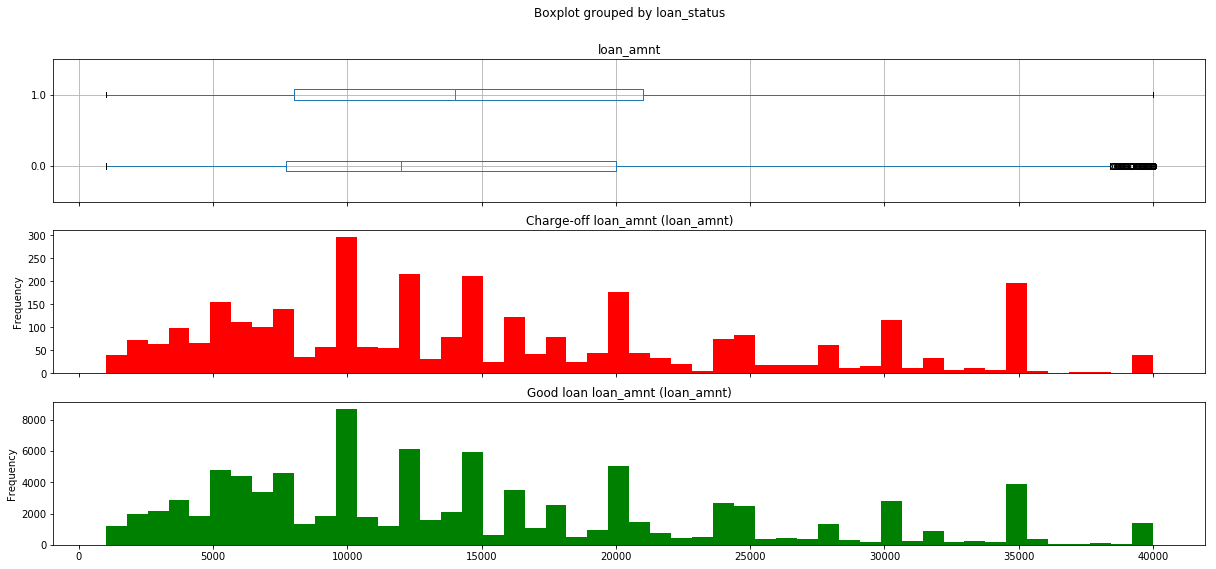

Missing values for term 0


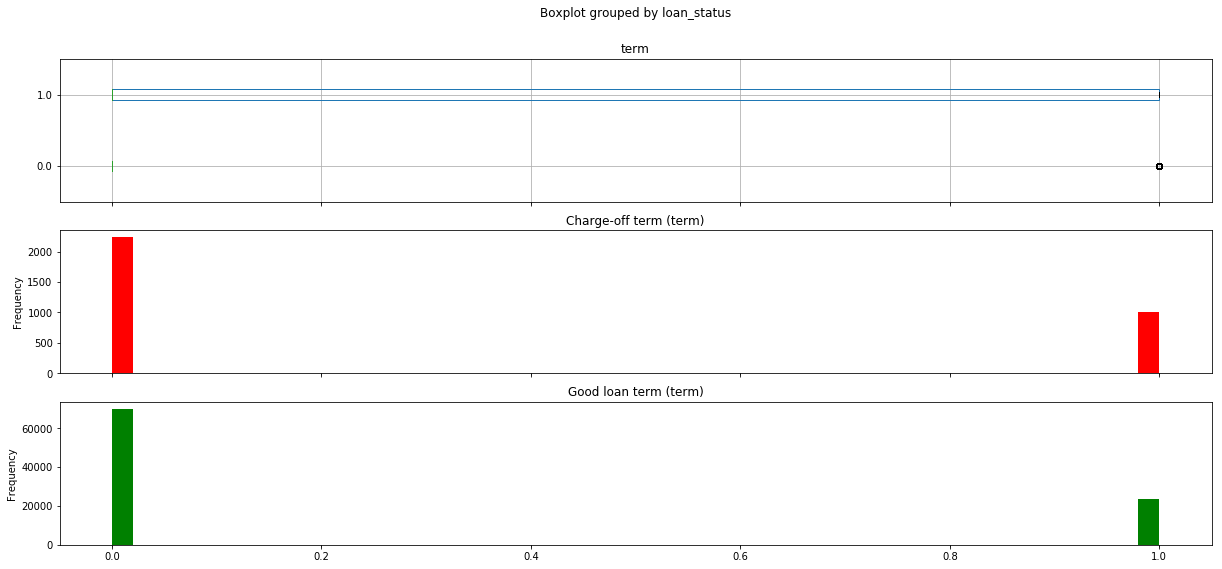

Missing values for int_rate 0


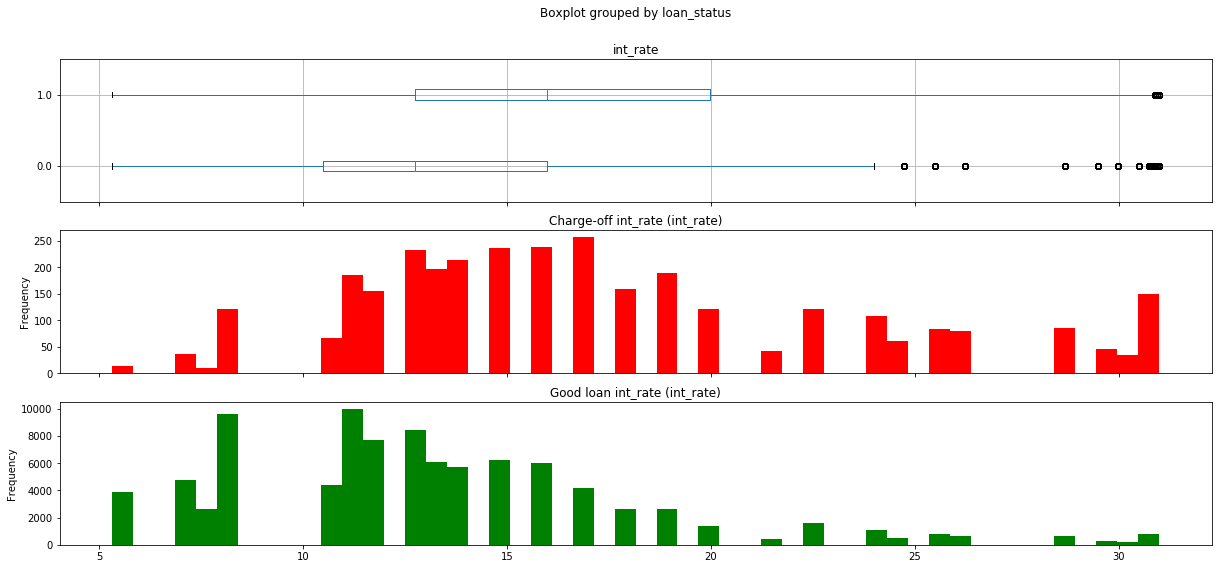

Missing values for installment 0


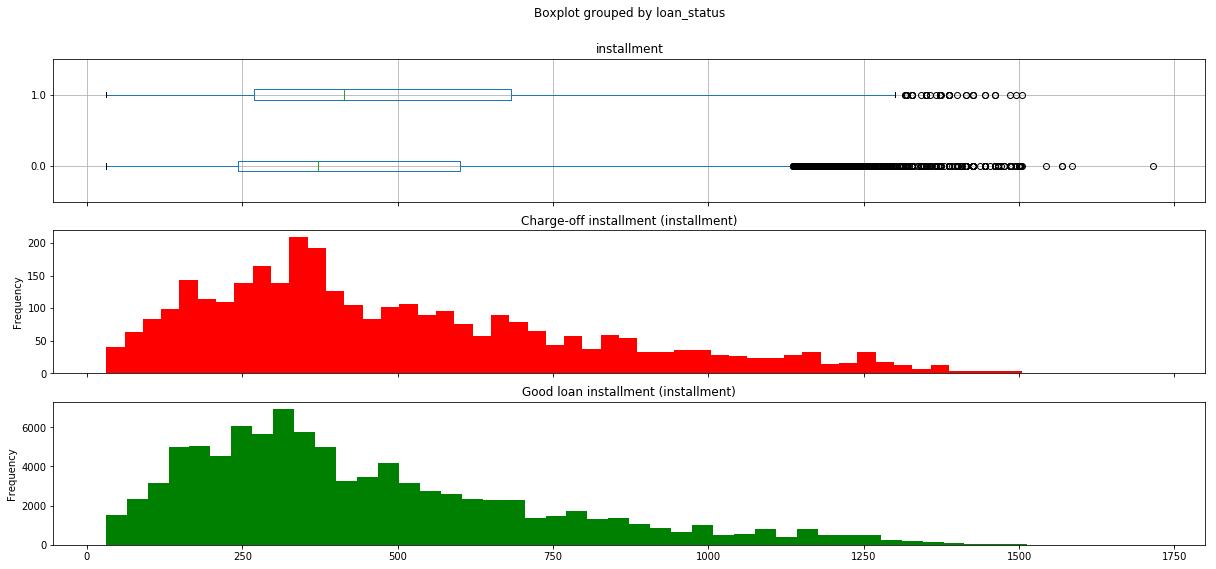

Missing values for grade 0


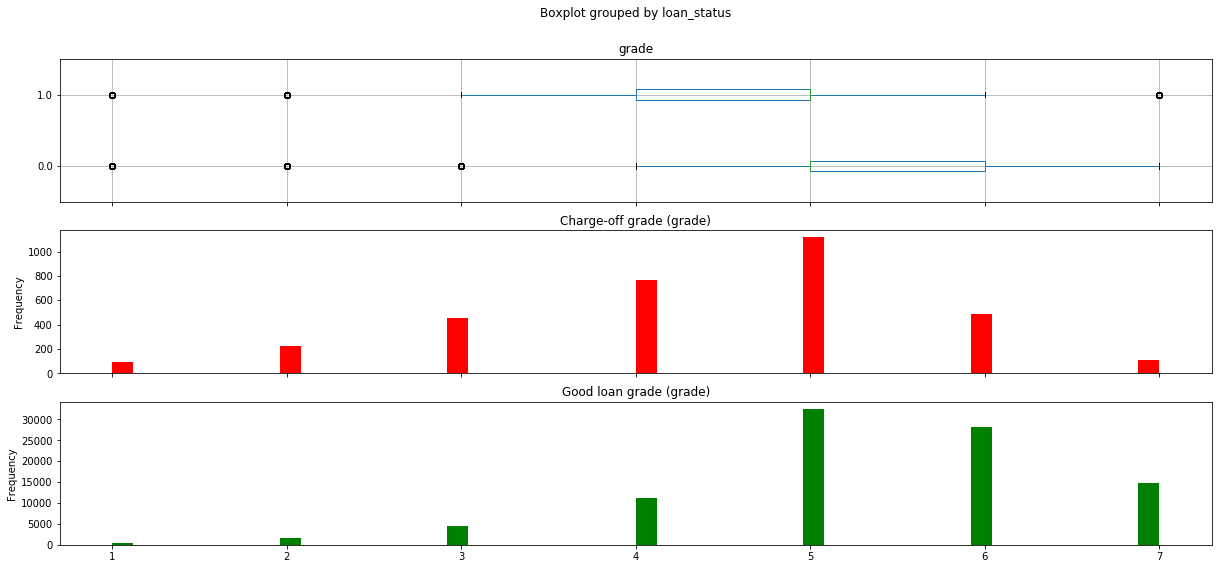

Missing values for emp_title 0


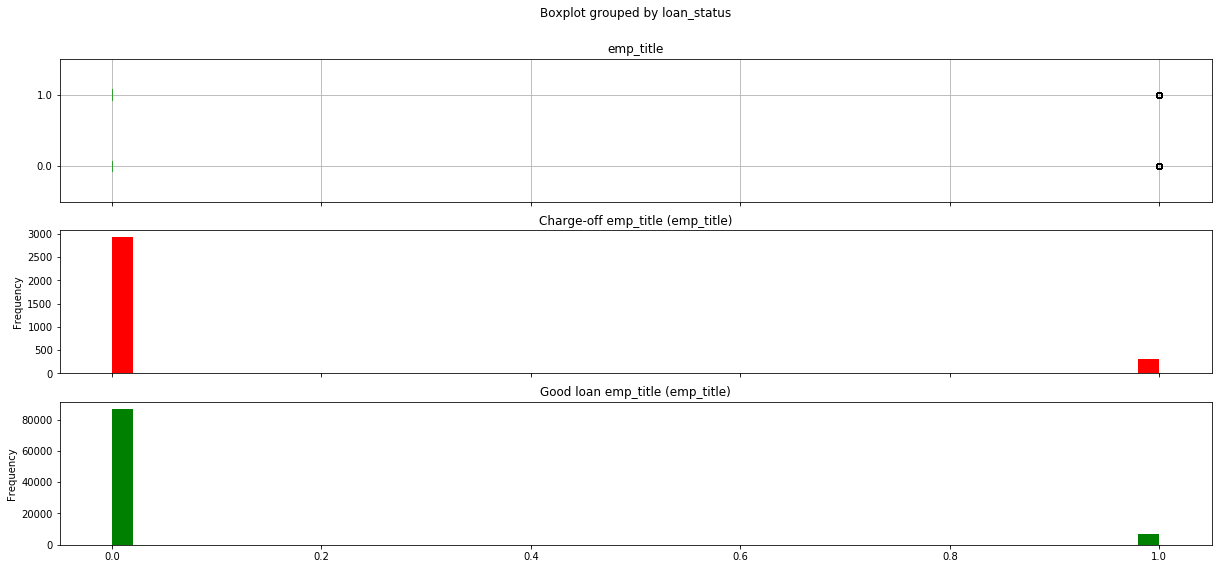

Missing values for annual_inc 0


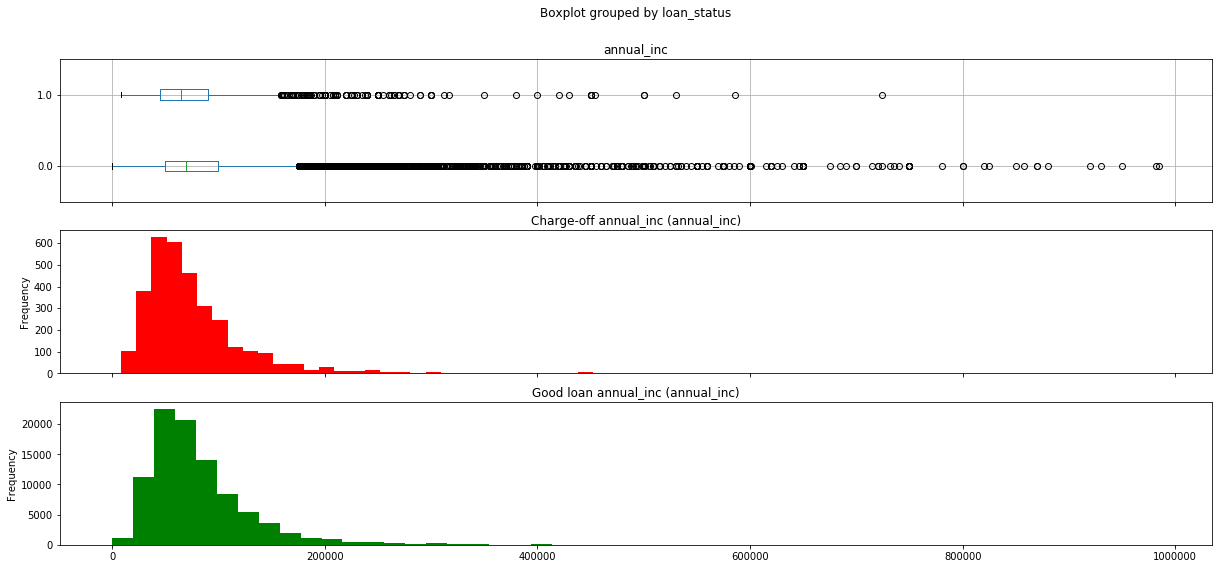

Missing values for loan_status 0


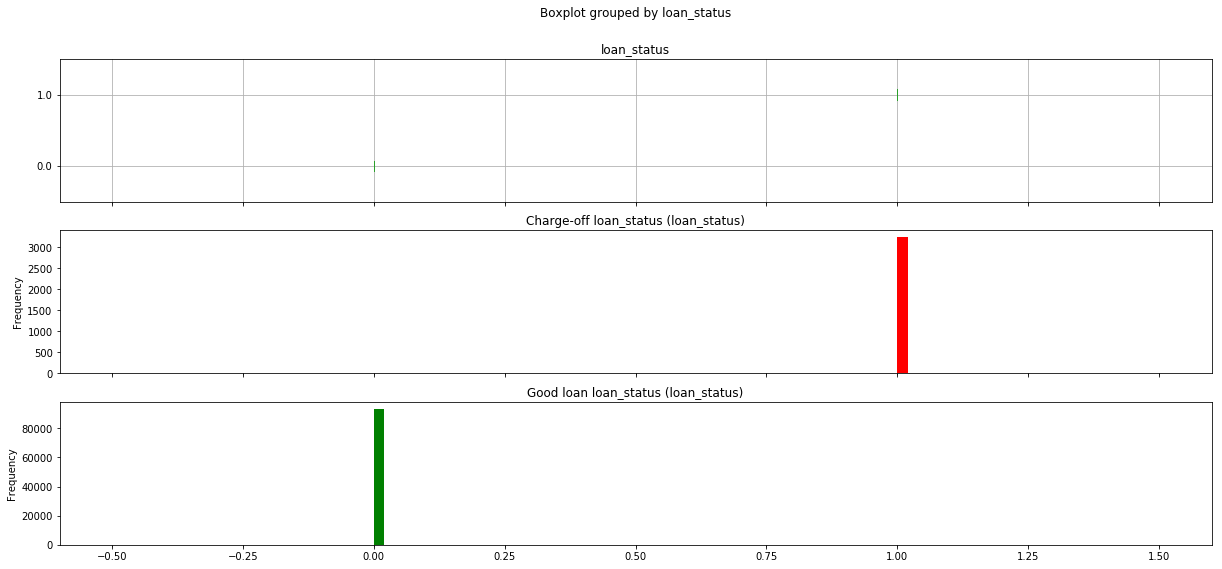

Missing values for zip_code 0


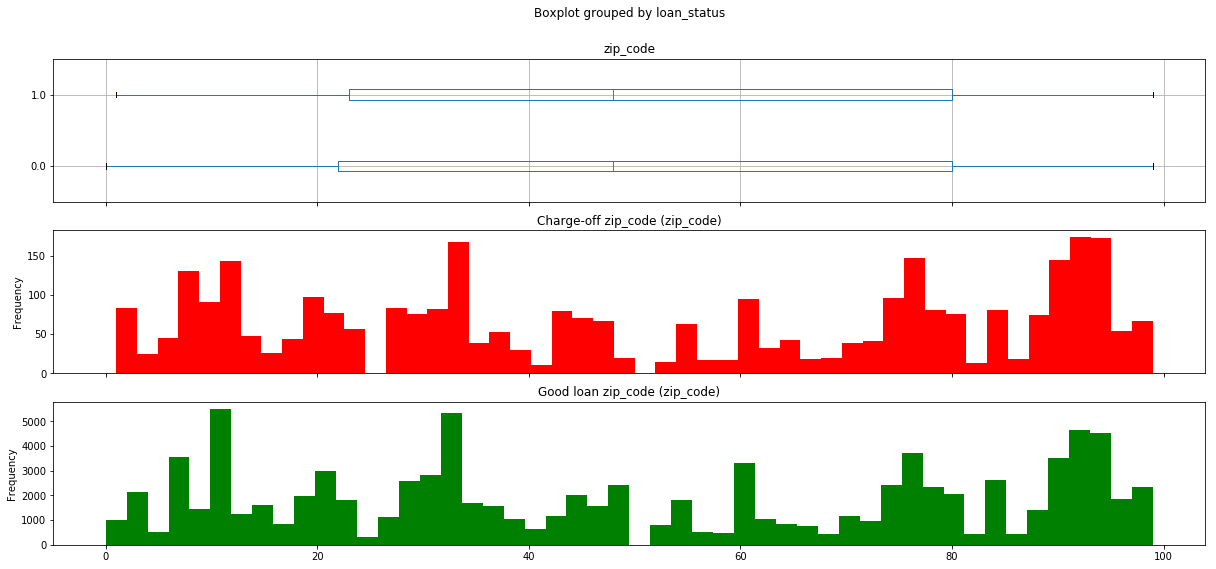

Missing values for delinq_2yrs 0


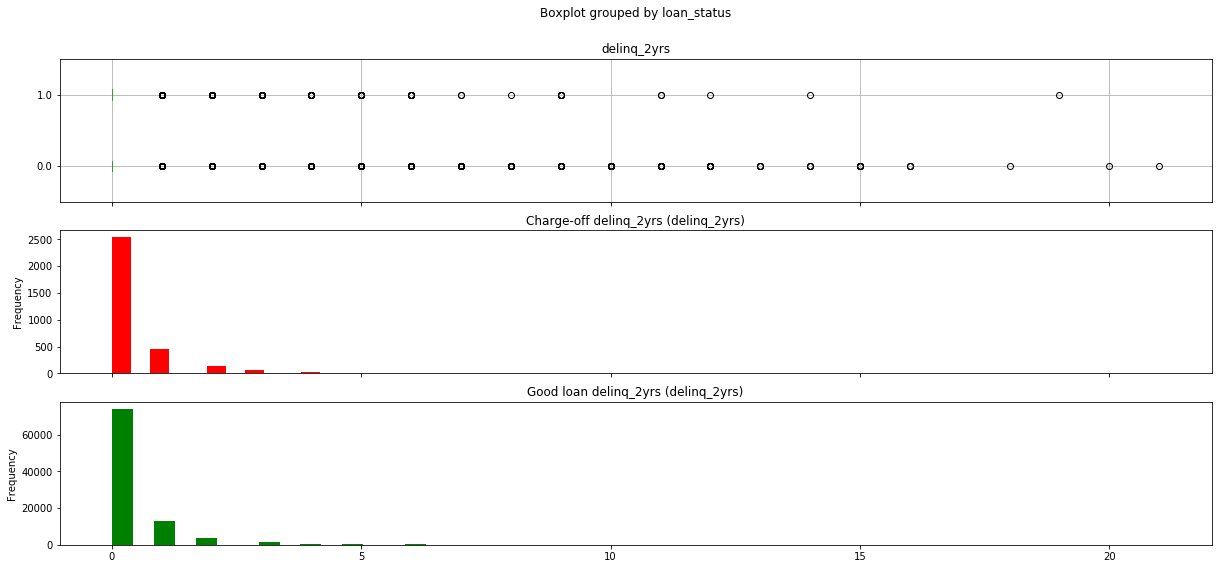

Missing values for inq_last_6mths 0


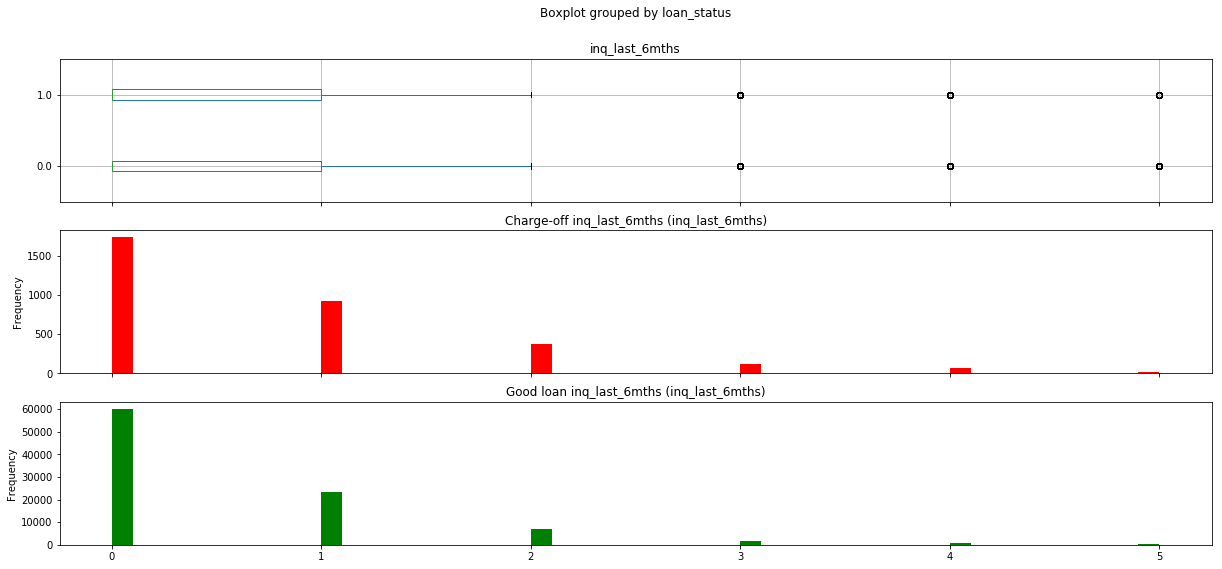

Missing values for mths_since_last_delinq 0


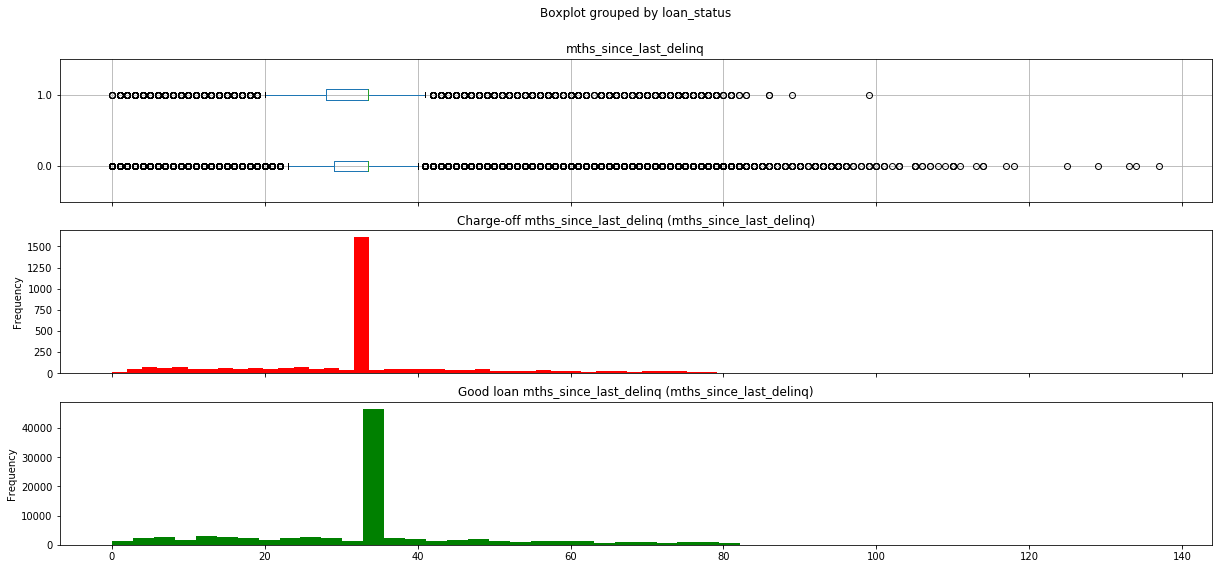

Missing values for mths_since_last_record 0


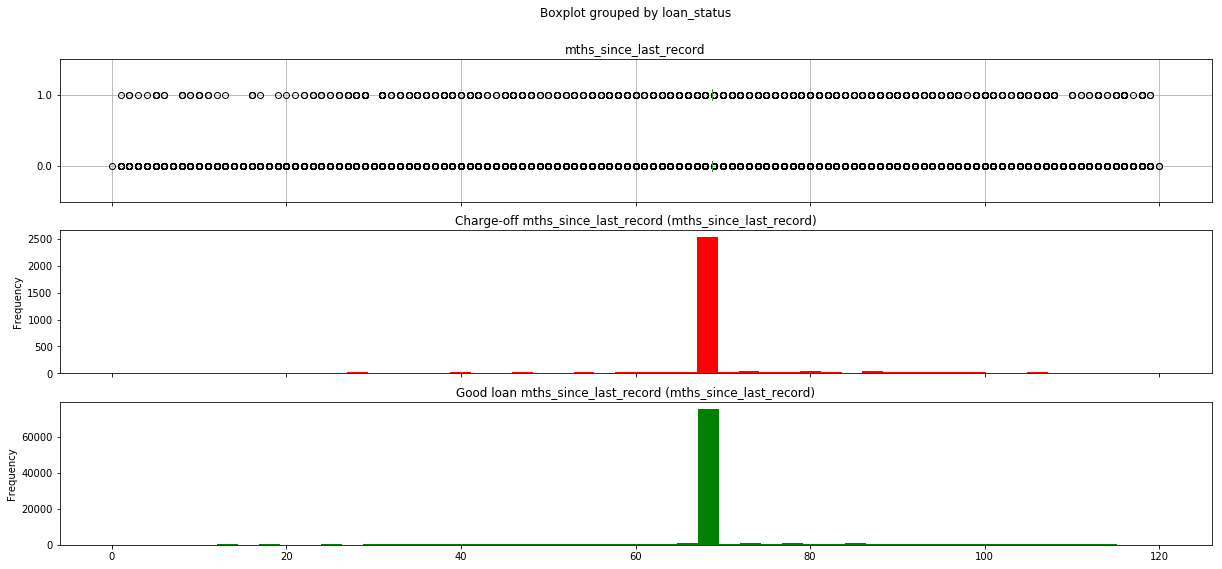

Missing values for open_acc 0


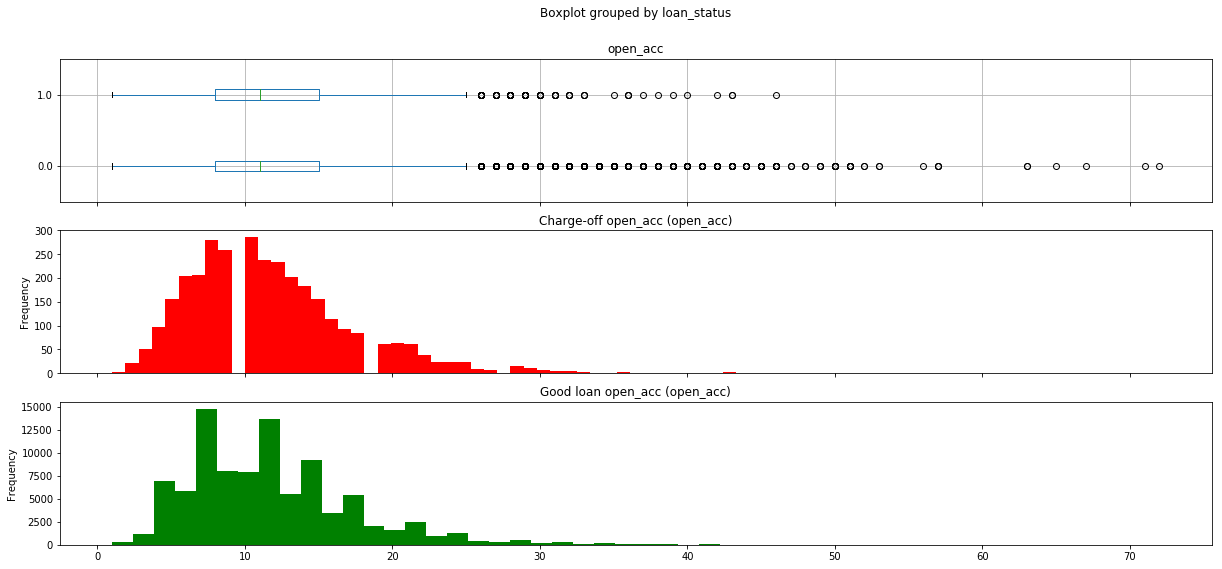

Missing values for pub_rec 0


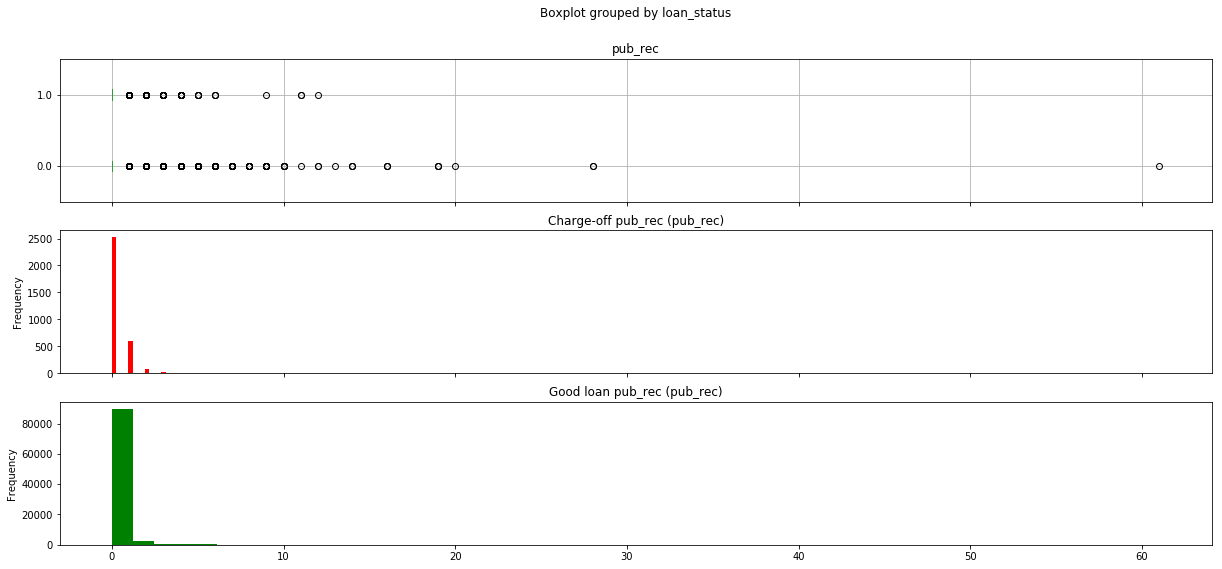

Missing values for revol_bal 0


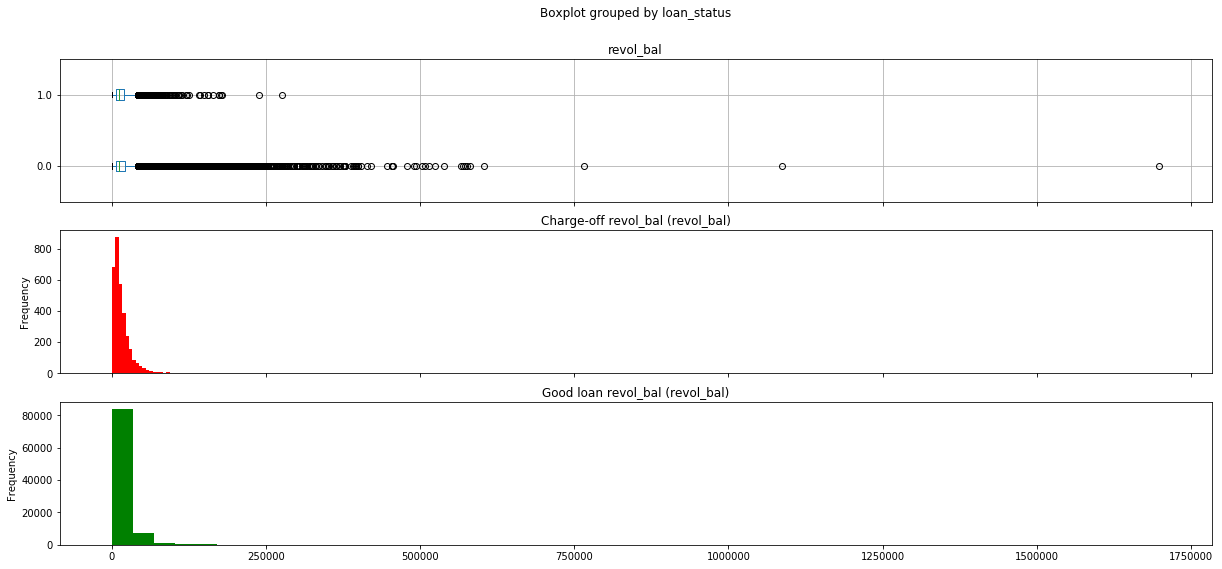

Missing values for revol_util 0


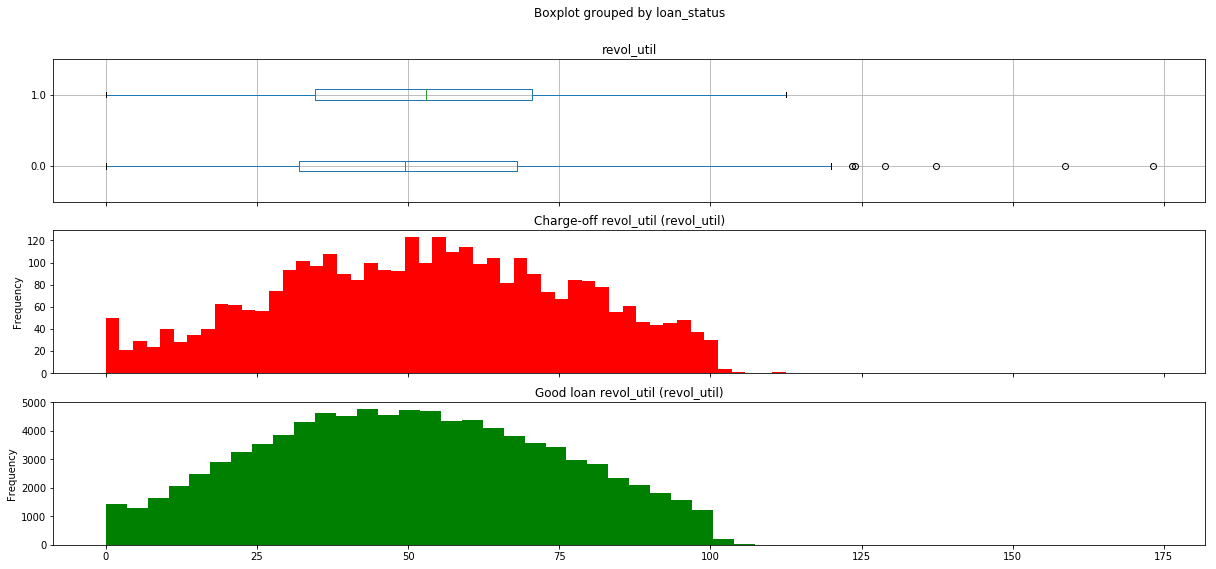

Missing values for total_acc 0


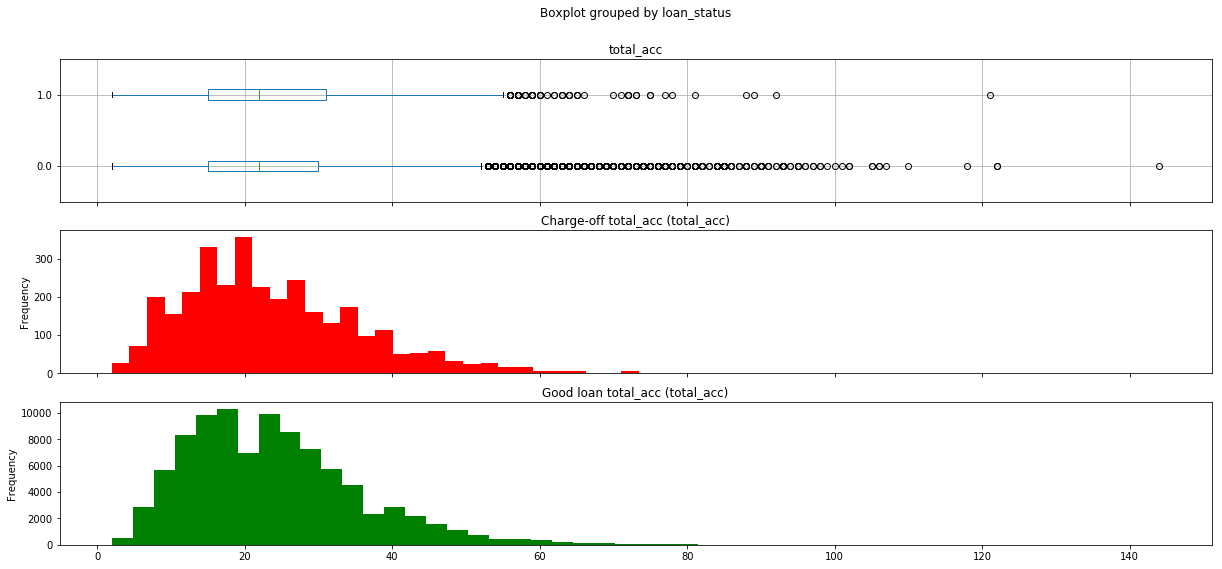

Missing values for initial_list_status 0


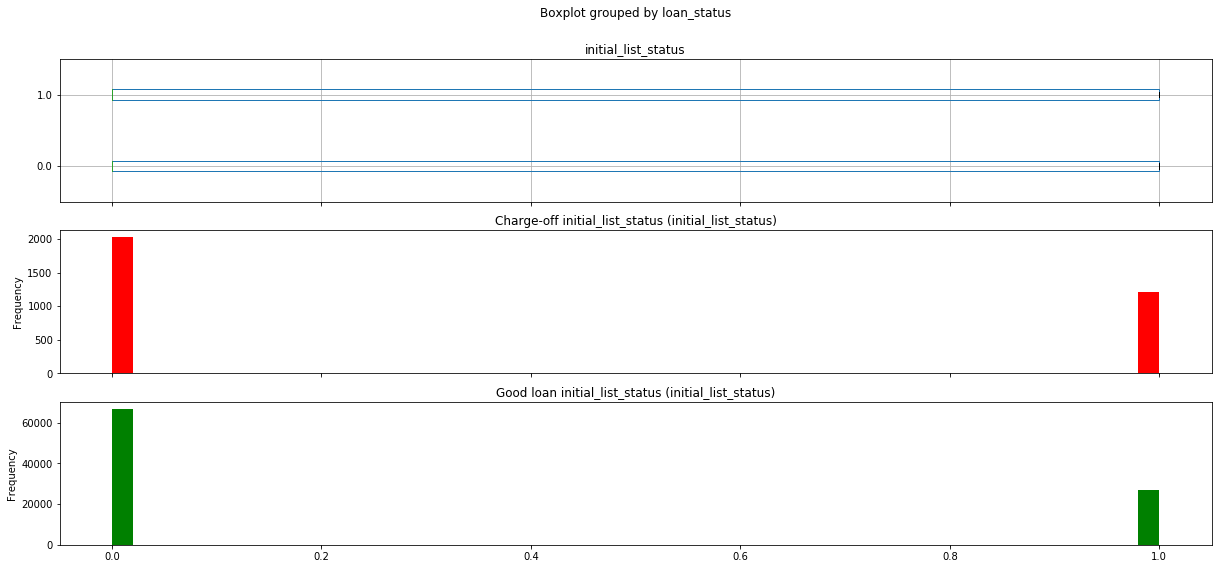

Missing values for collections_12_mths_ex_med 0


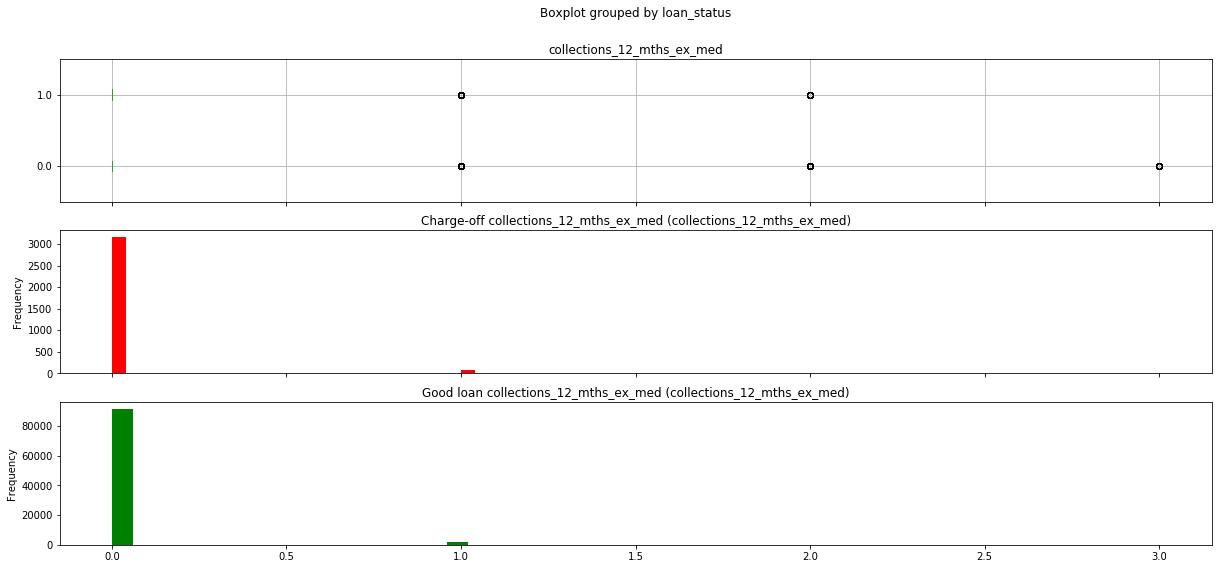

Missing values for application_type 0


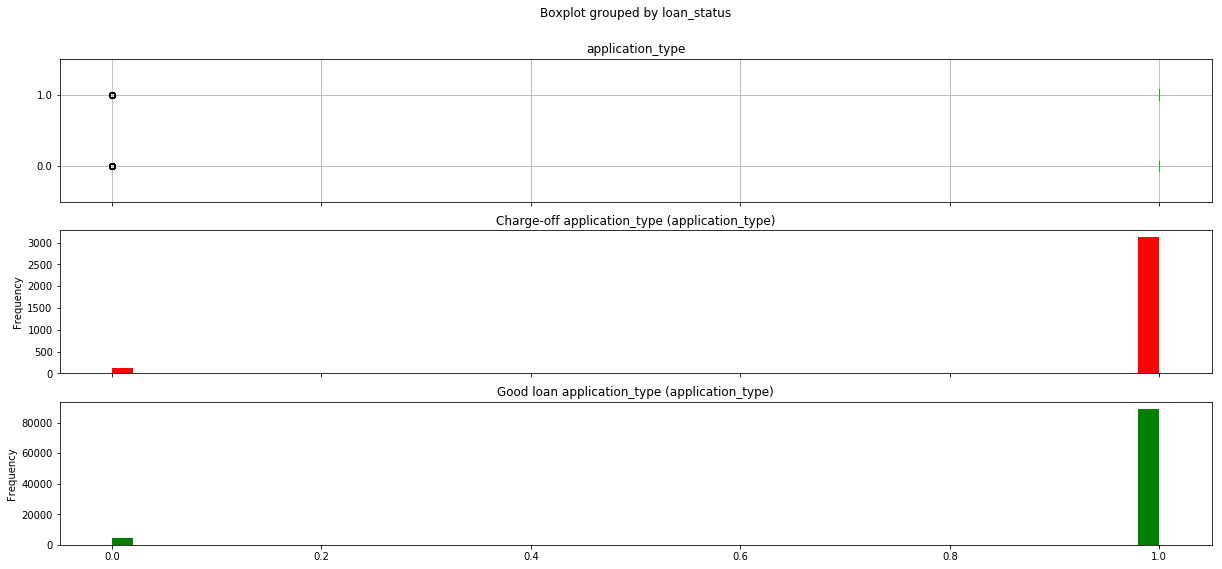

Missing values for annual_inc_joint 0


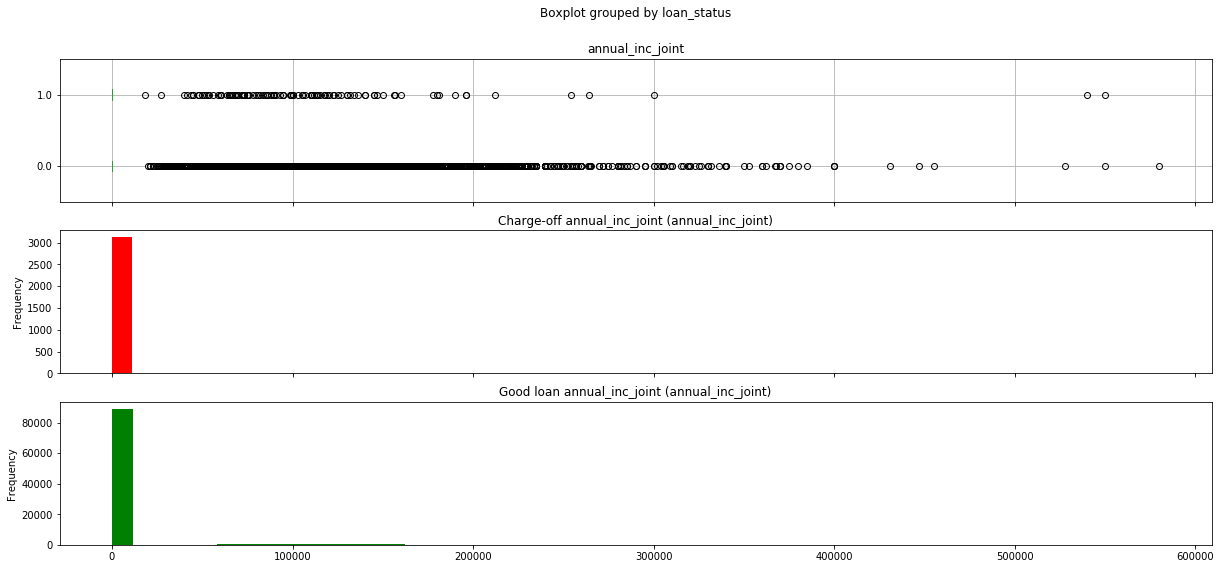

Missing values for dti_joint 0


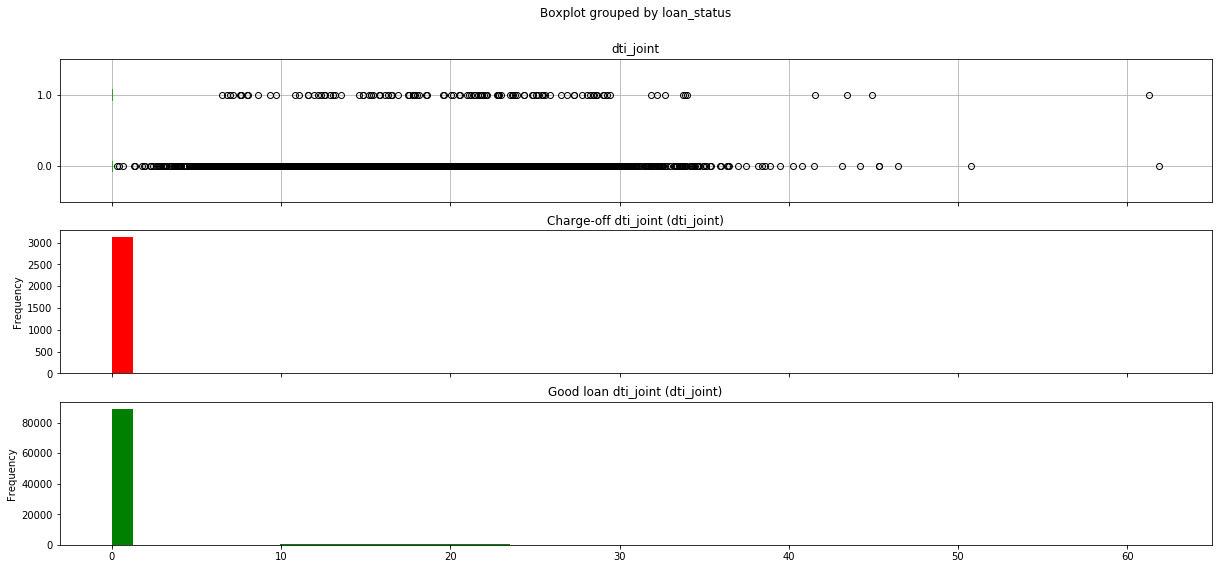

Missing values for acc_now_delinq 0


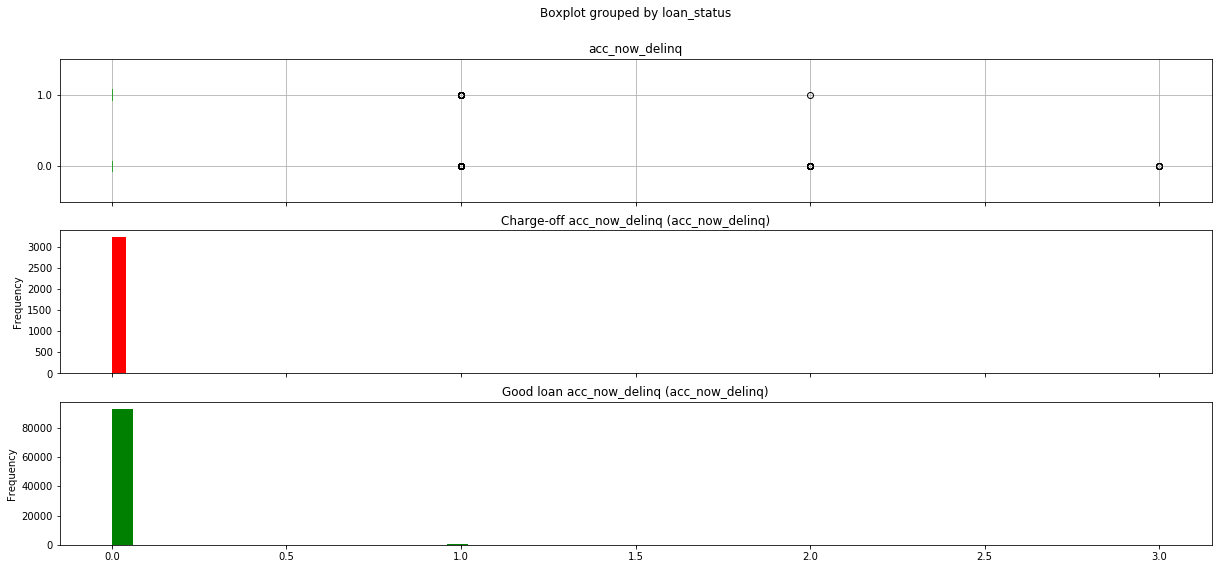

Missing values for tot_coll_amt 0


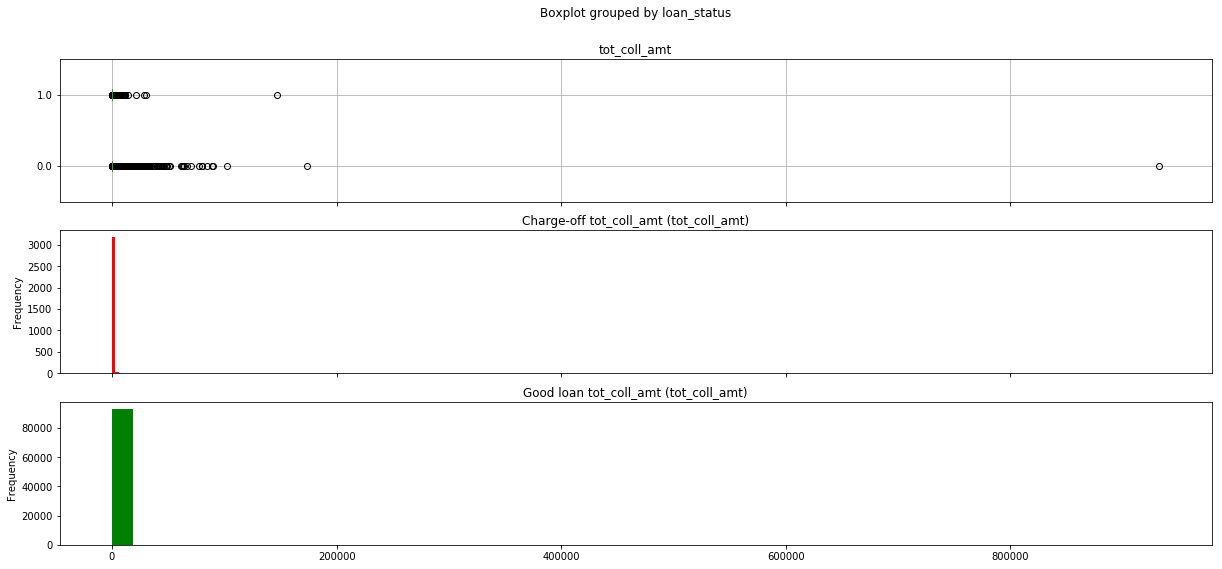

Missing values for tot_cur_bal 0


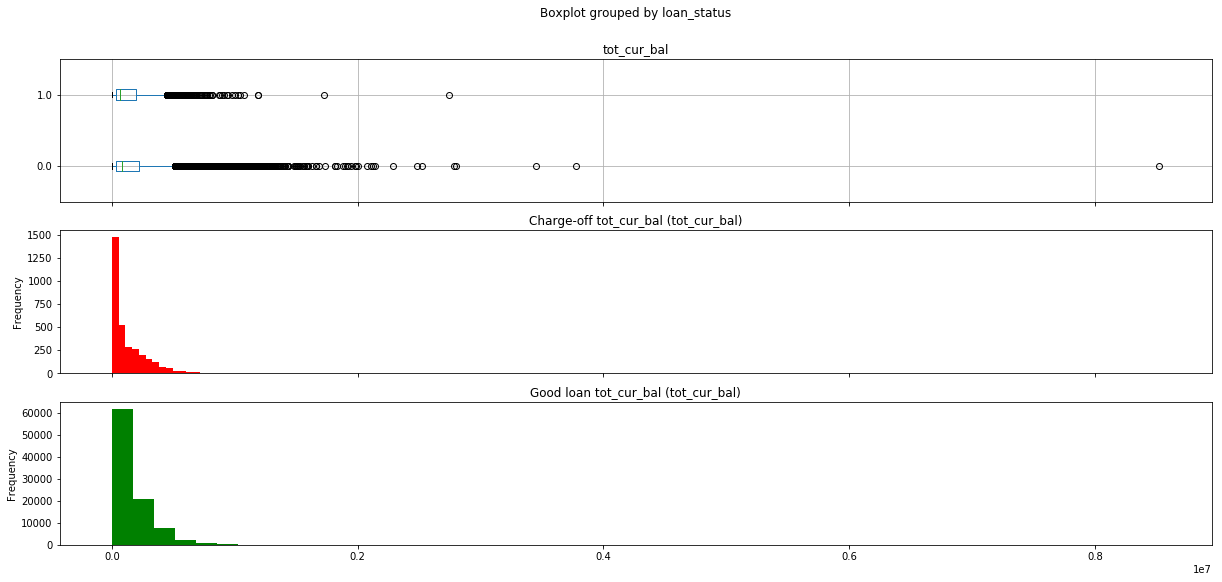

Missing values for open_acc_6m 0


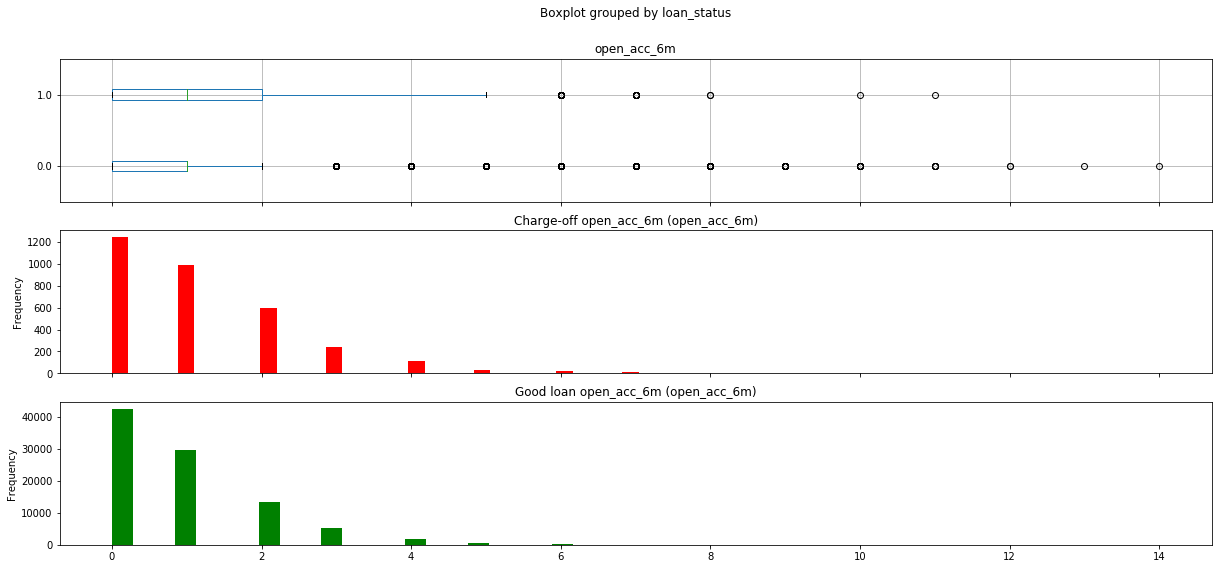

Missing values for open_act_il 0


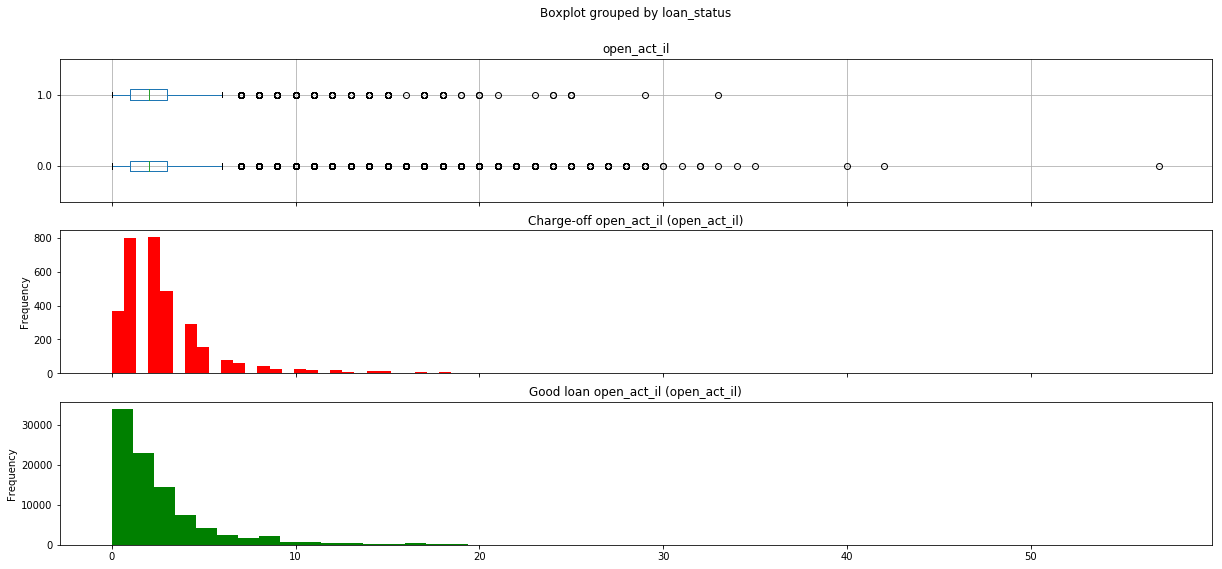

Missing values for open_il_12m 0


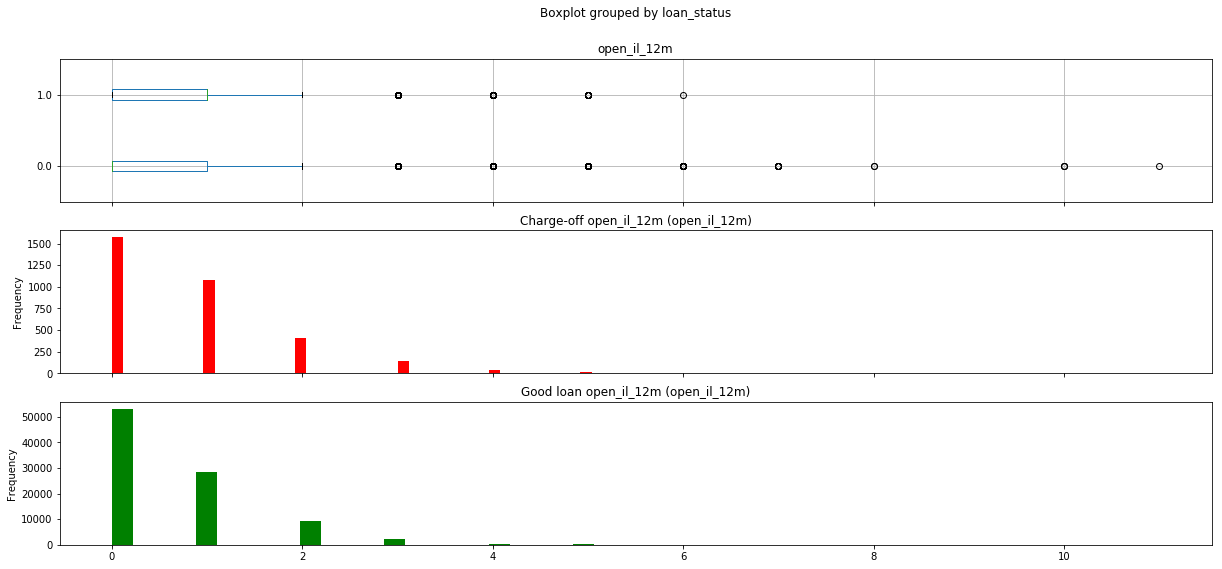

Missing values for open_il_24m 0


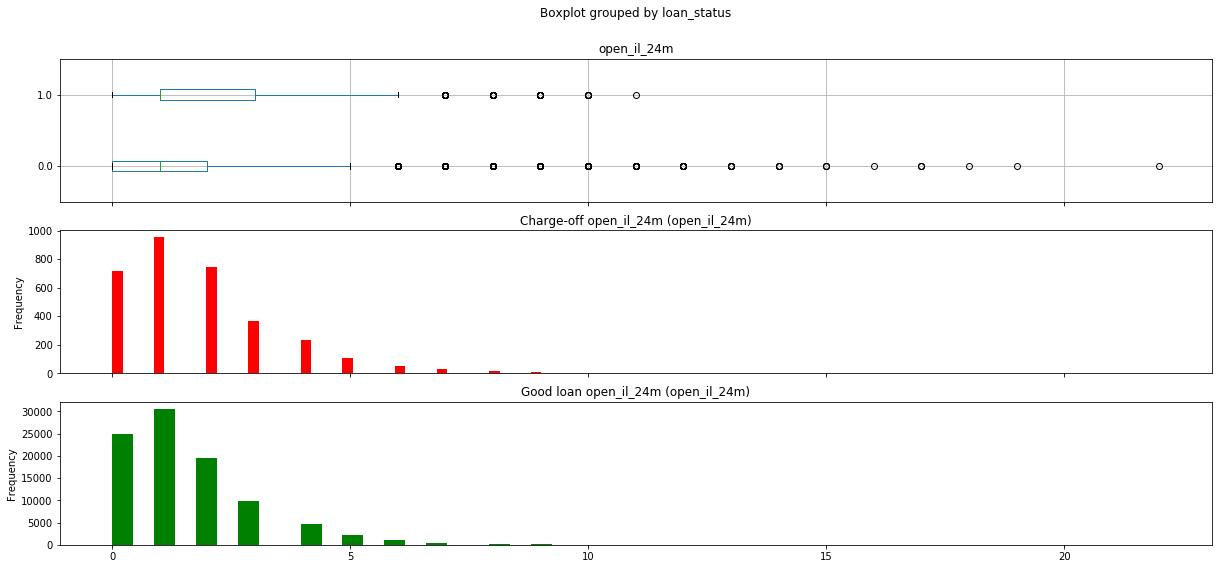

Missing values for mths_since_rcnt_il 0


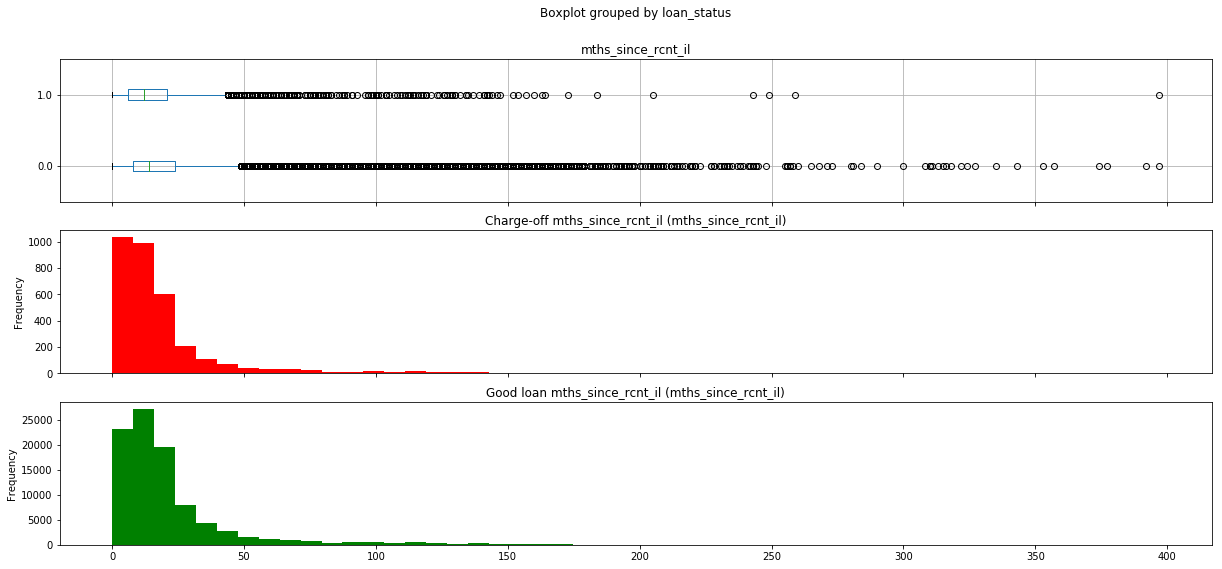

Missing values for total_bal_il 0


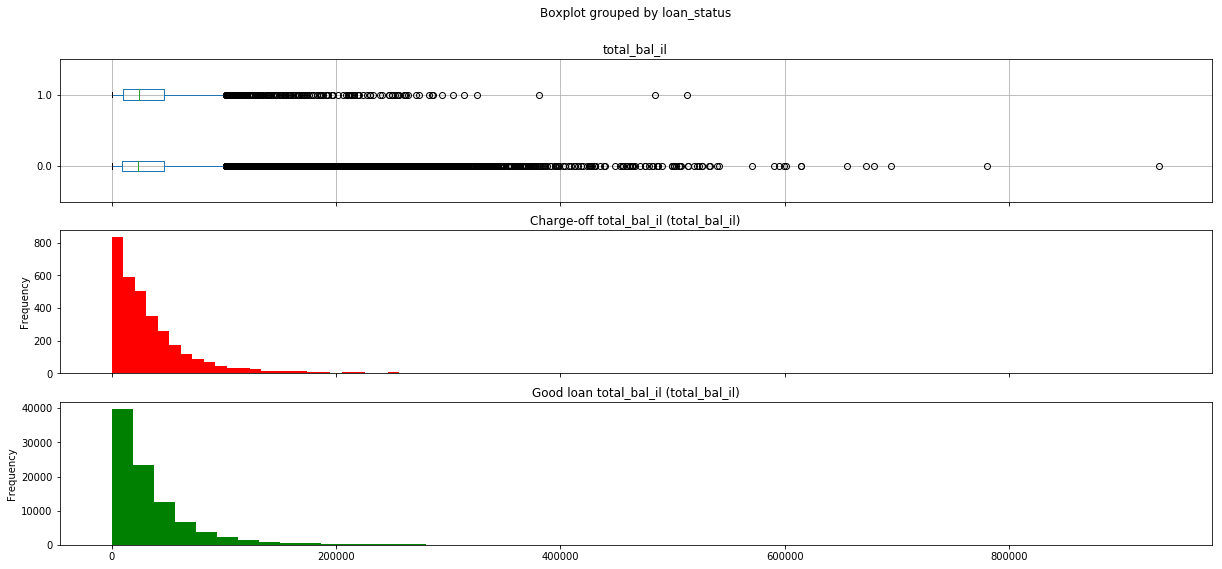

Missing values for il_util 0


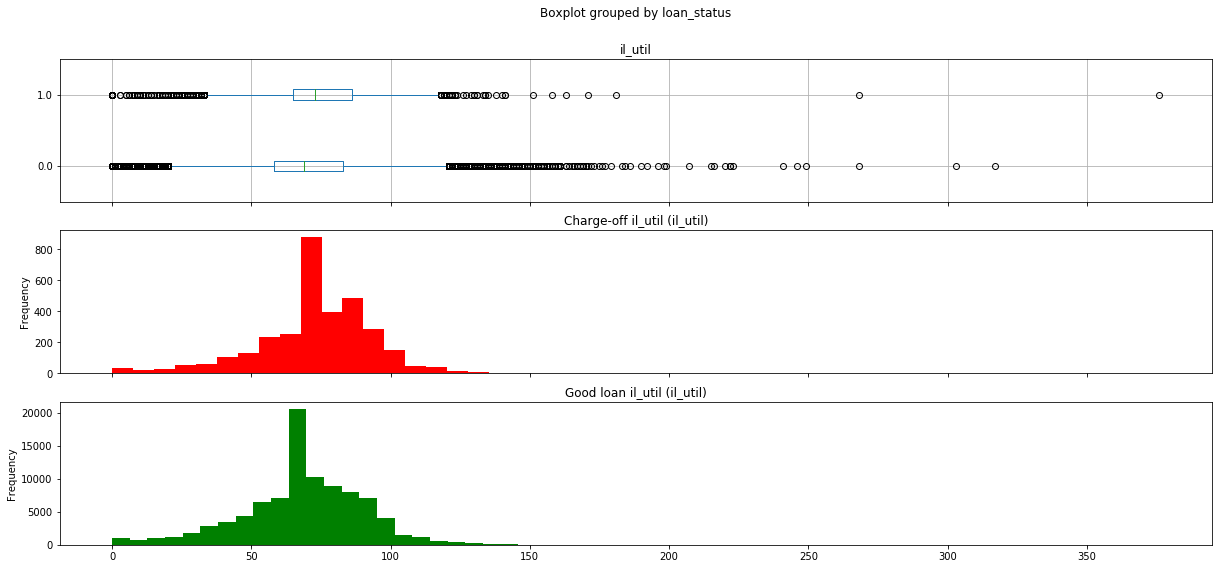

Missing values for open_rv_12m 0


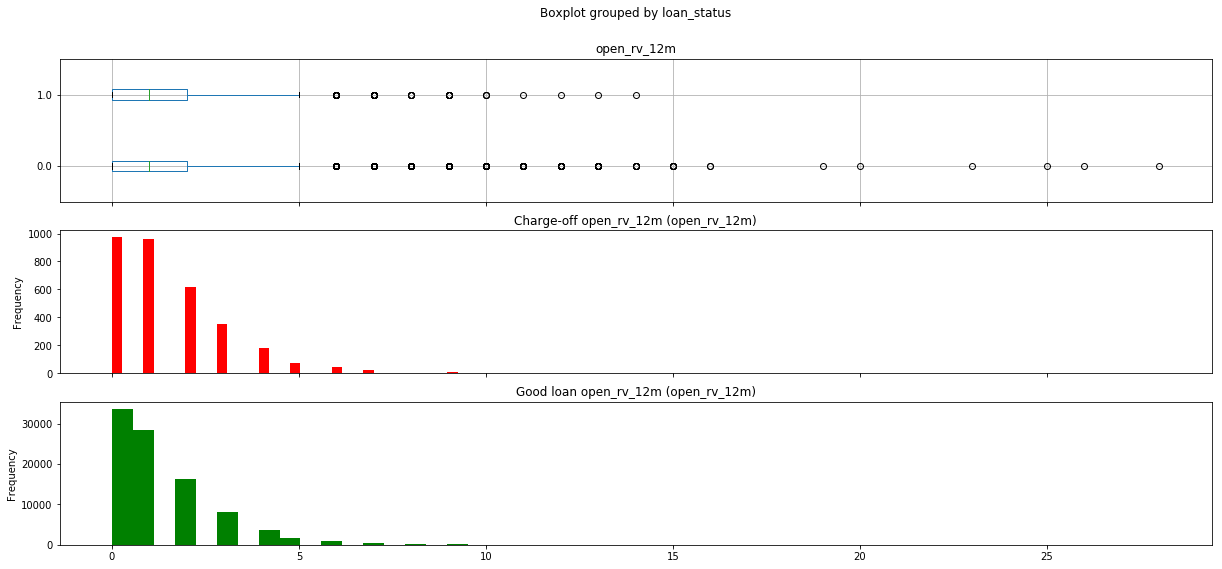

Missing values for open_rv_24m 0


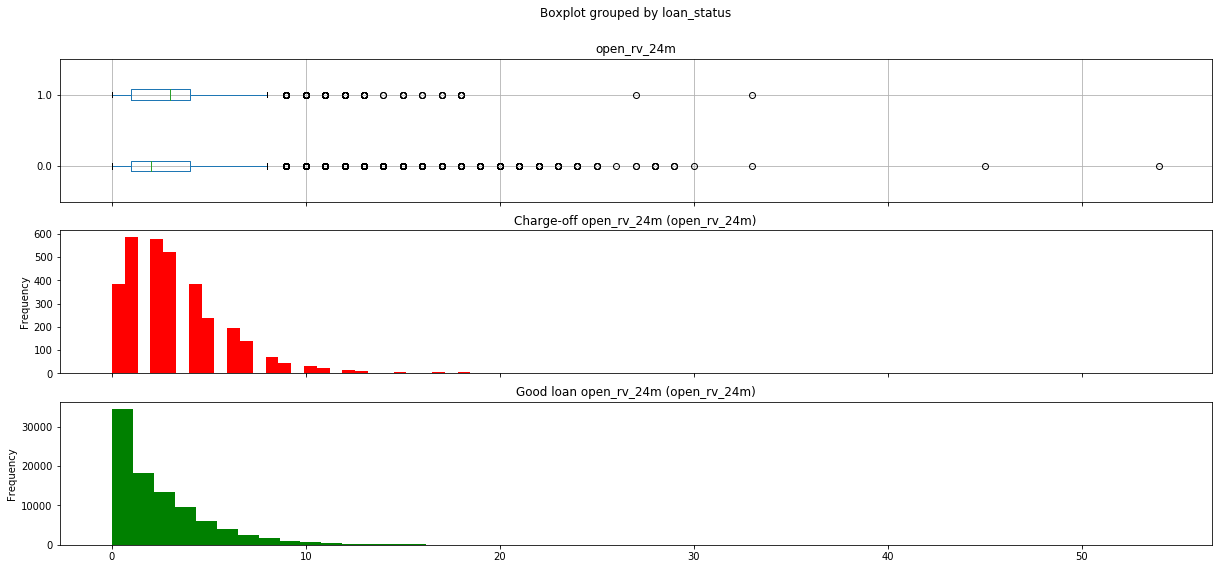

Missing values for max_bal_bc 0


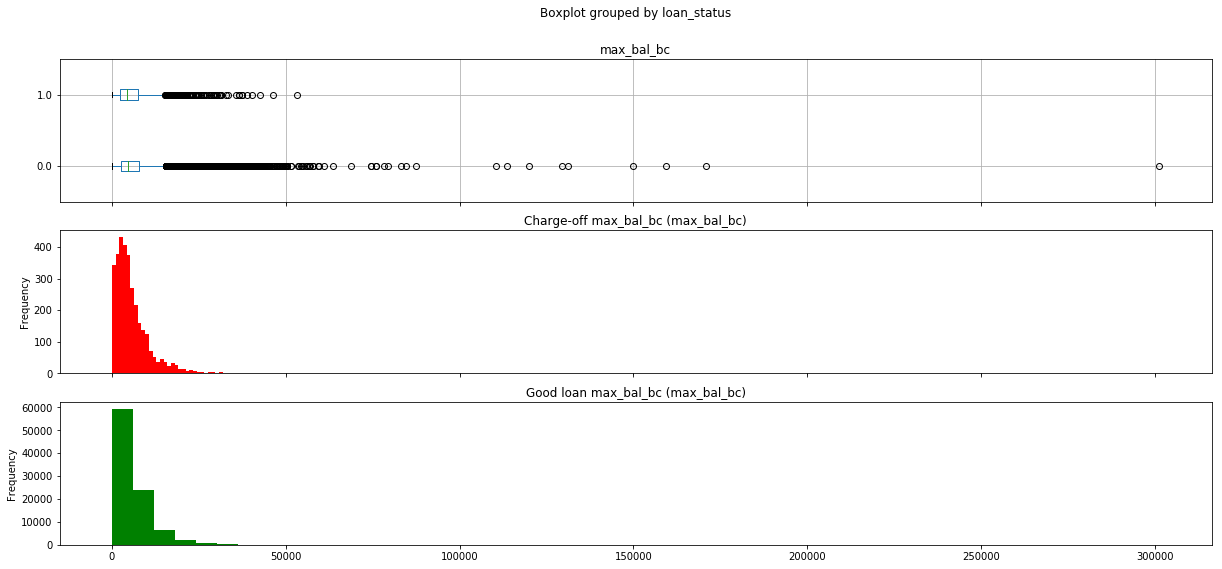

Missing values for all_util 0


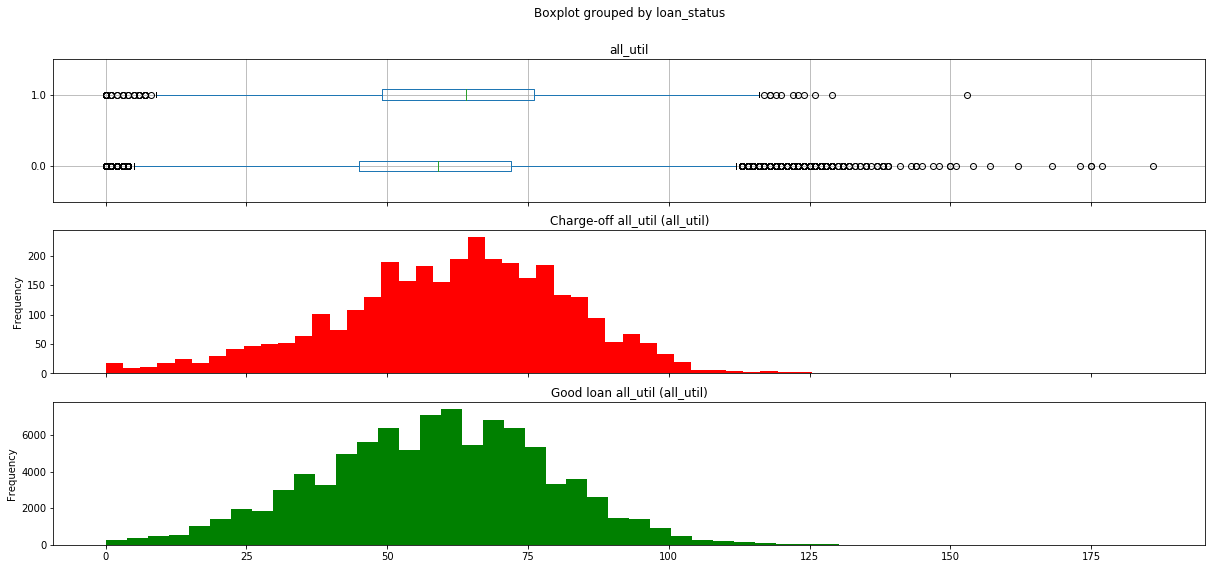

Missing values for total_rev_hi_lim 0


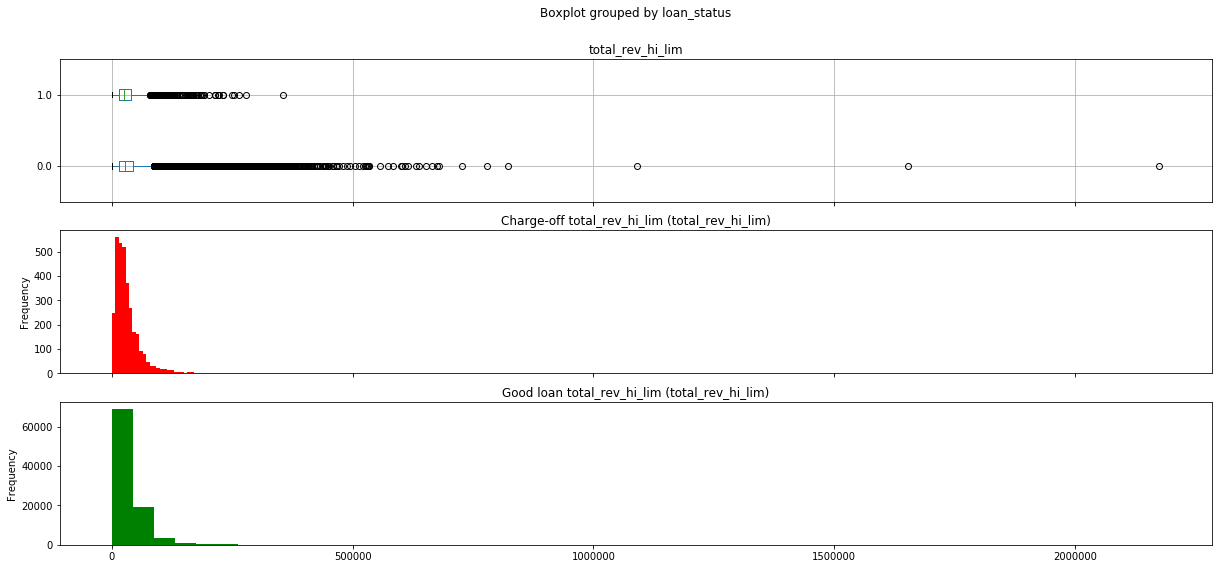

Missing values for inq_fi 0


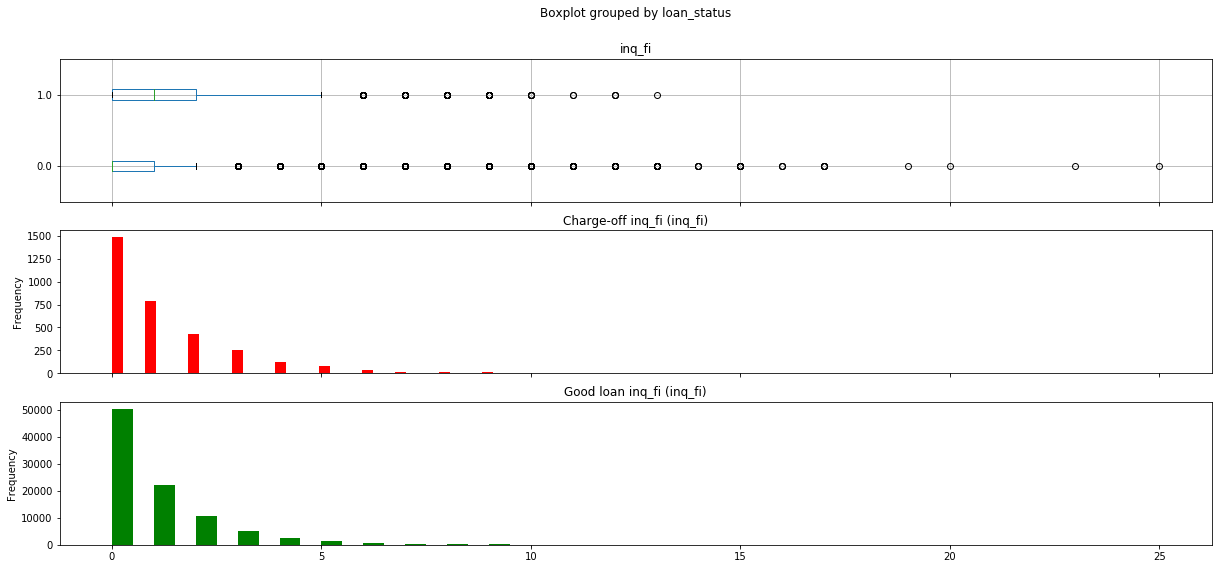

Missing values for total_cu_tl 0


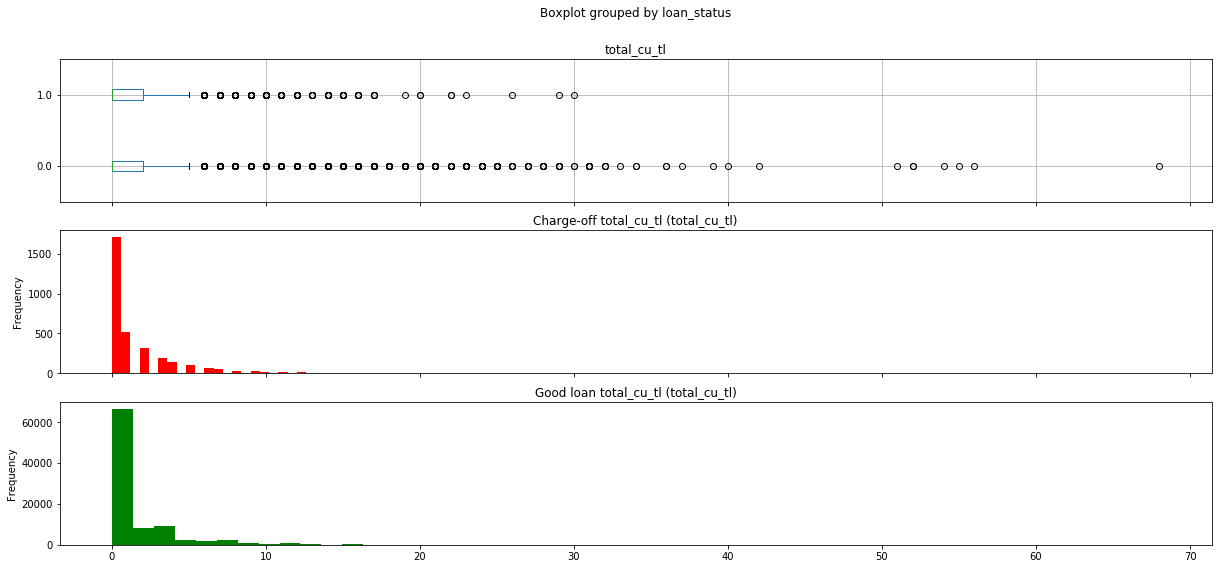

Missing values for inq_last_12m 0


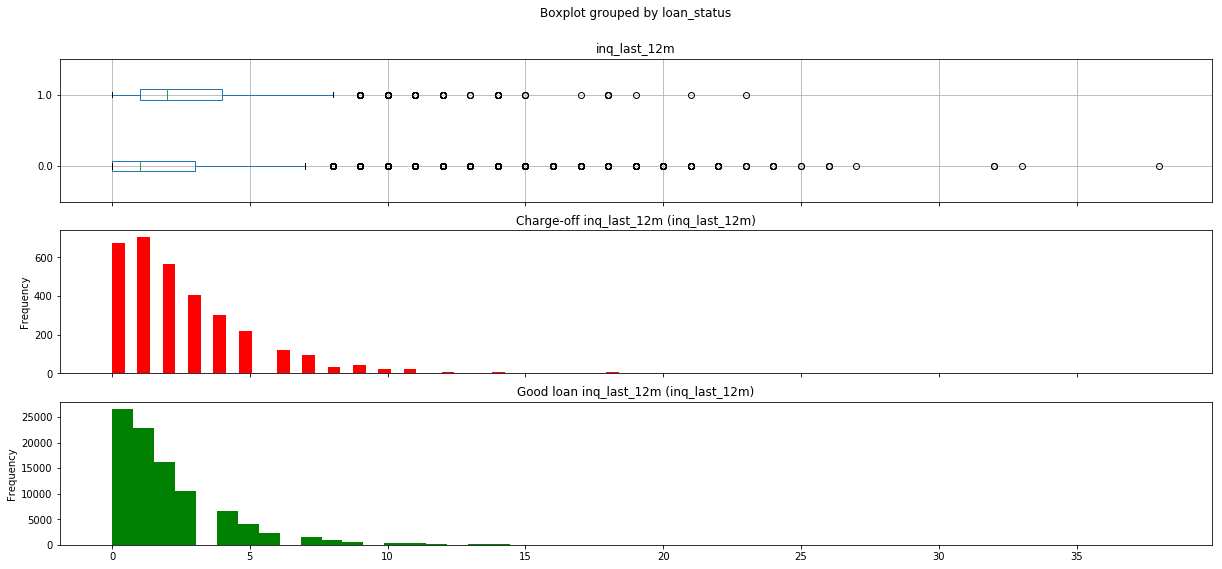

Missing values for acc_open_past_24mths 0


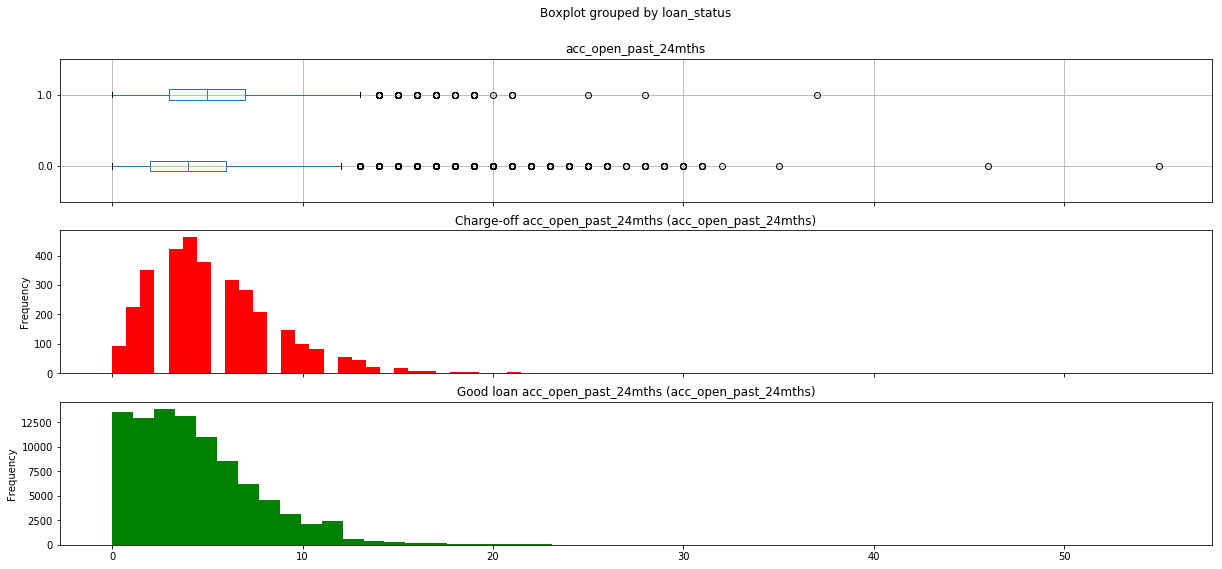

Missing values for avg_cur_bal 0


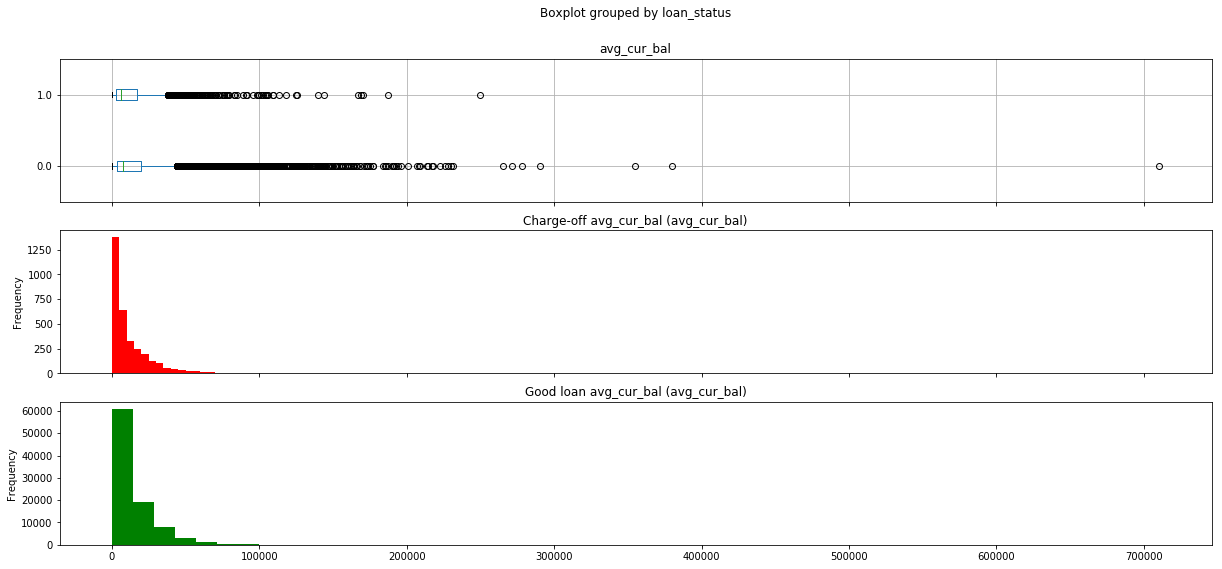

Missing values for bc_open_to_buy 0


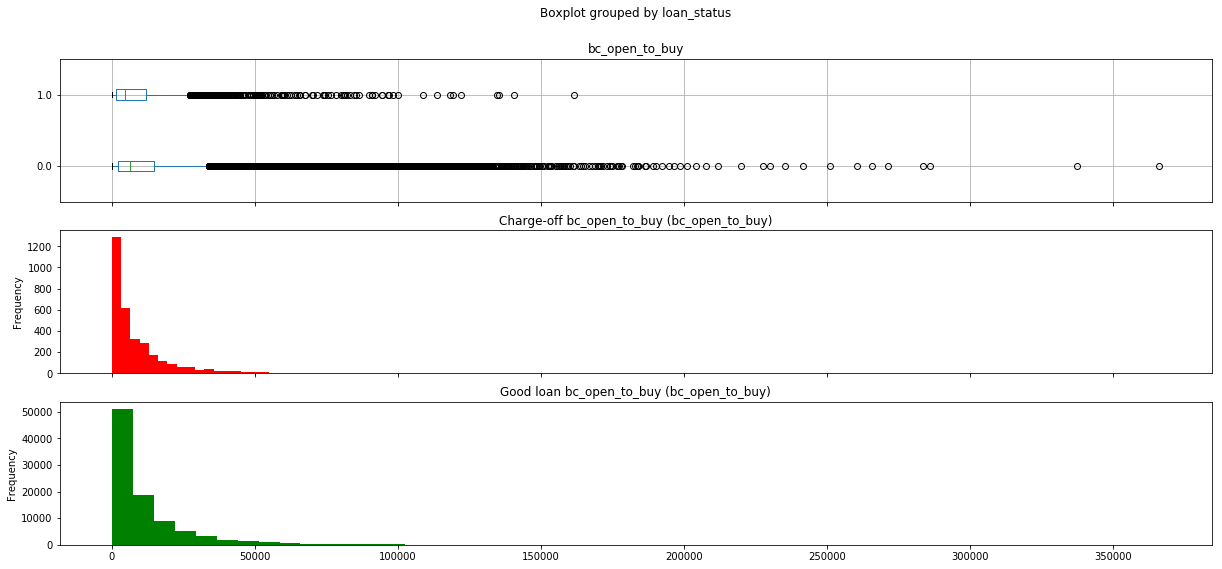

Missing values for bc_util 0


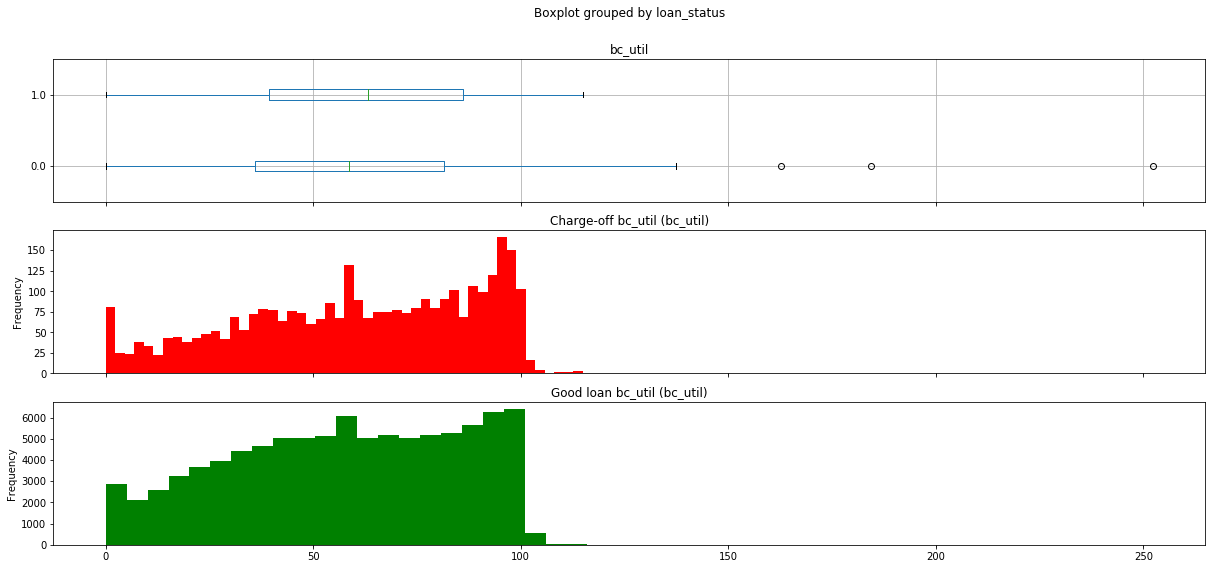

Missing values for chargeoff_within_12_mths 0


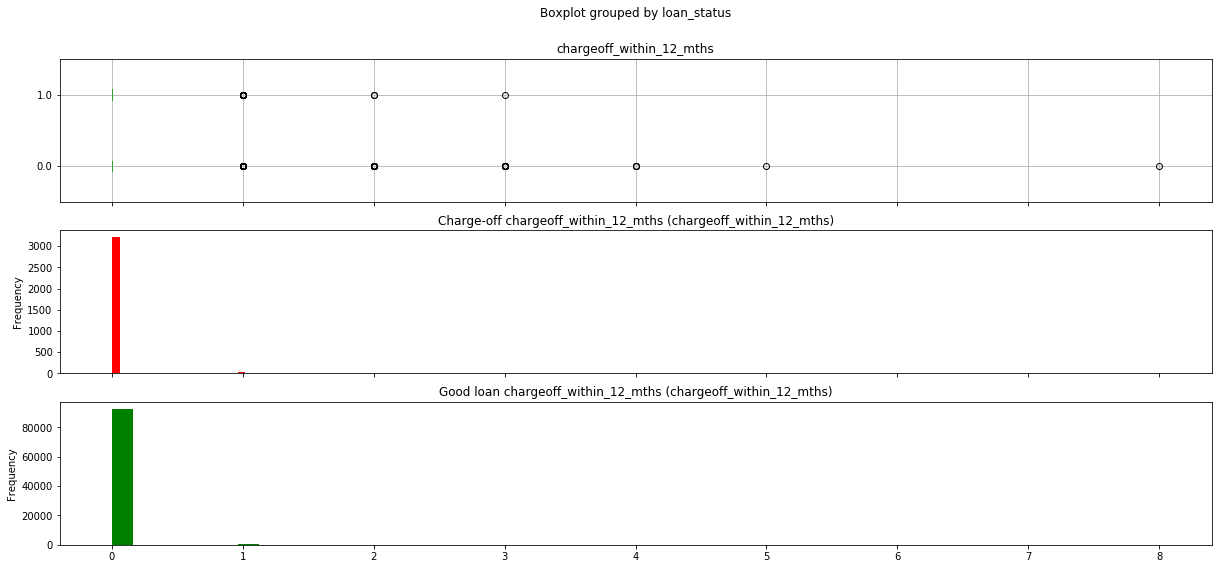

Missing values for delinq_amnt 0


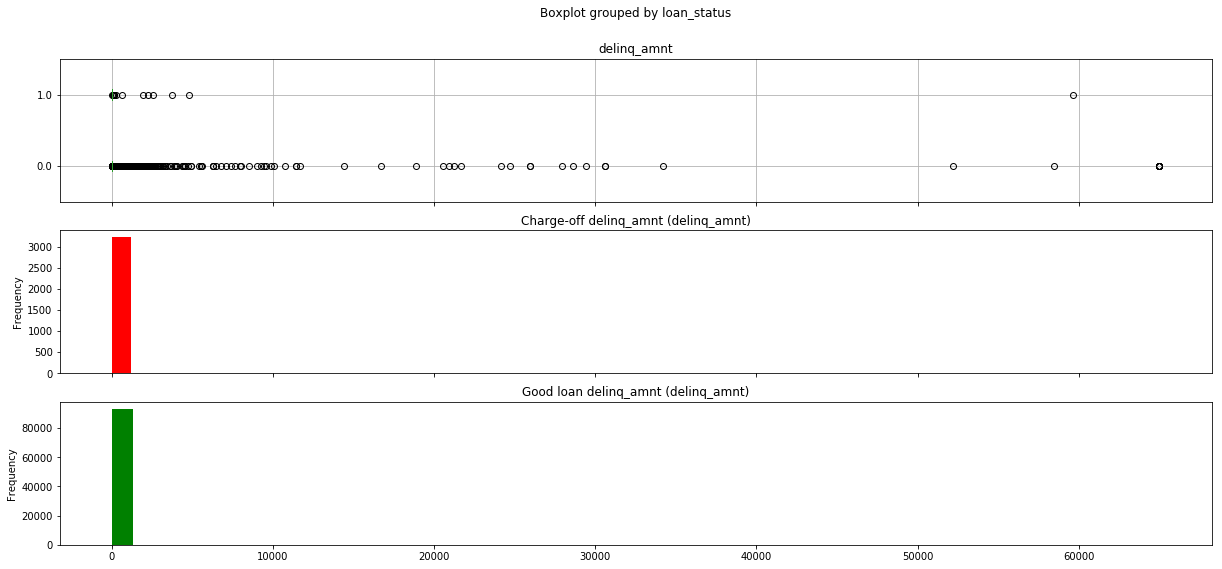

Missing values for mo_sin_old_il_acct 0


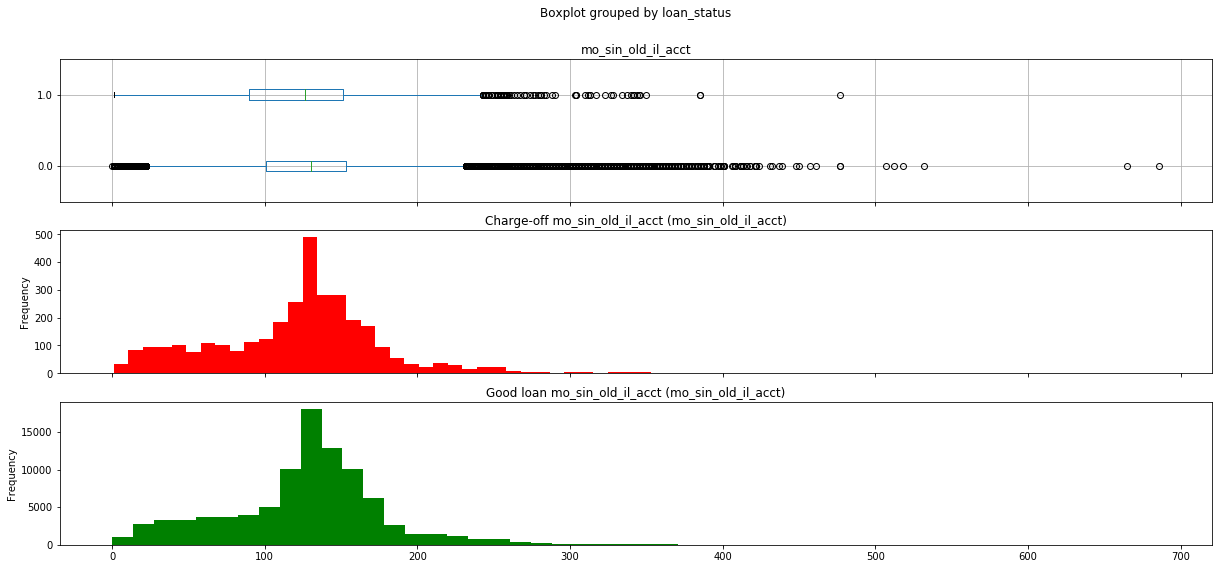

Missing values for mo_sin_old_rev_tl_op 0


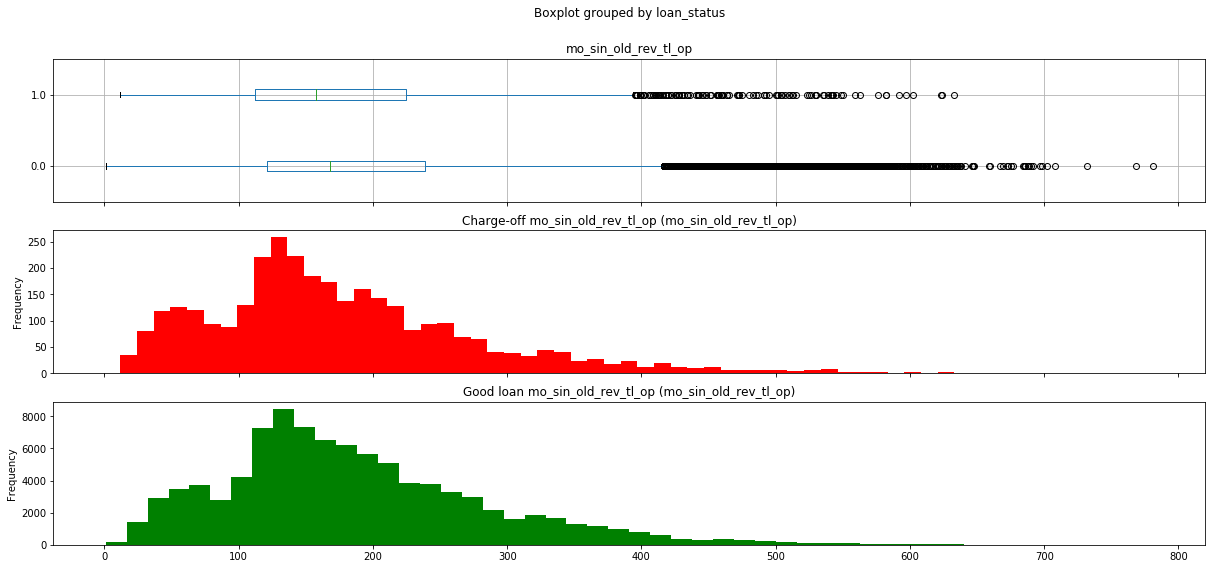

Missing values for mo_sin_rcnt_rev_tl_op 0


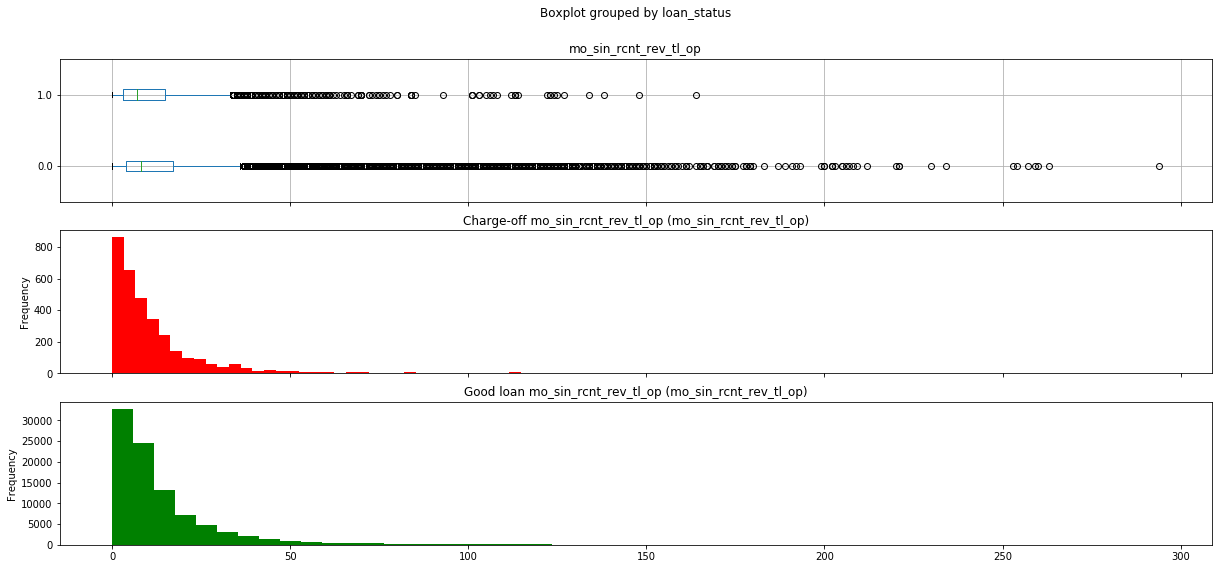

Missing values for mo_sin_rcnt_tl 0


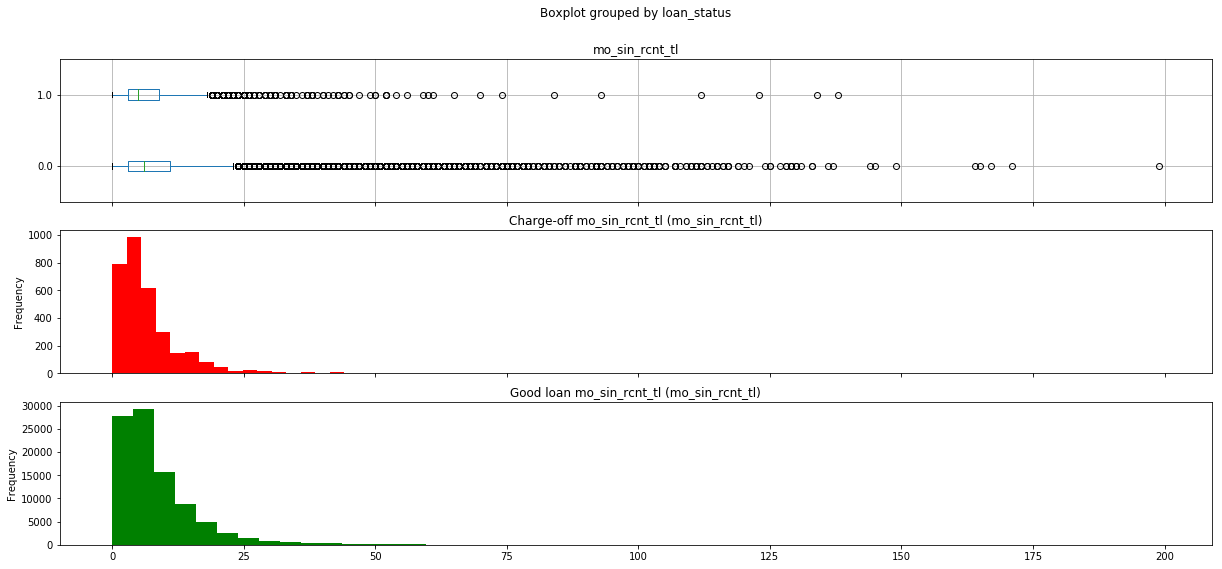

Missing values for mort_acc 0


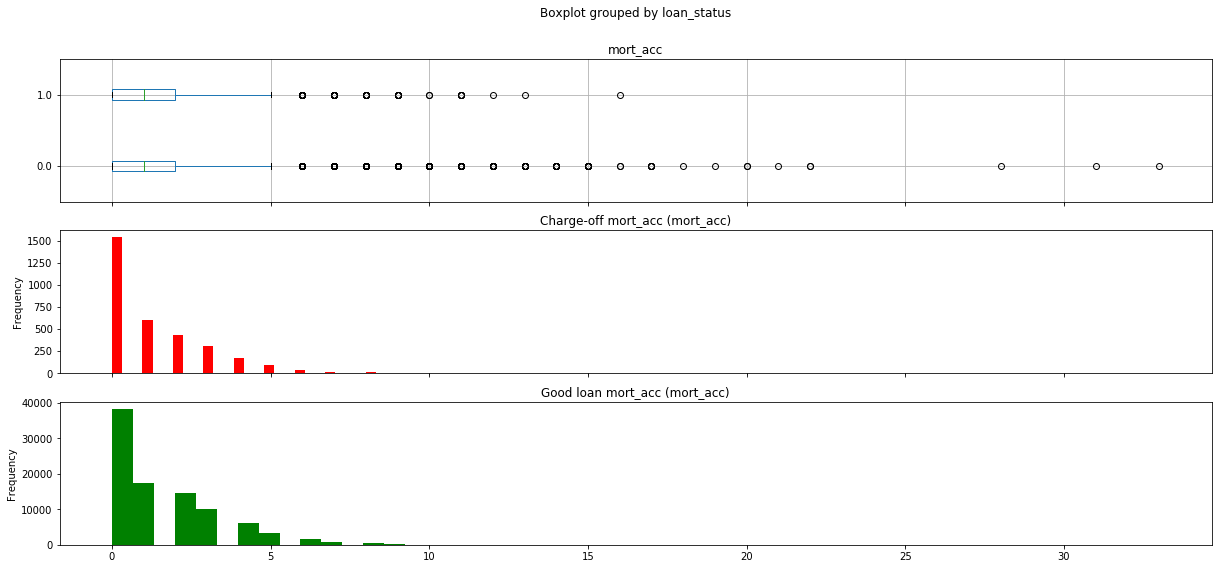

Missing values for mths_since_recent_bc 0


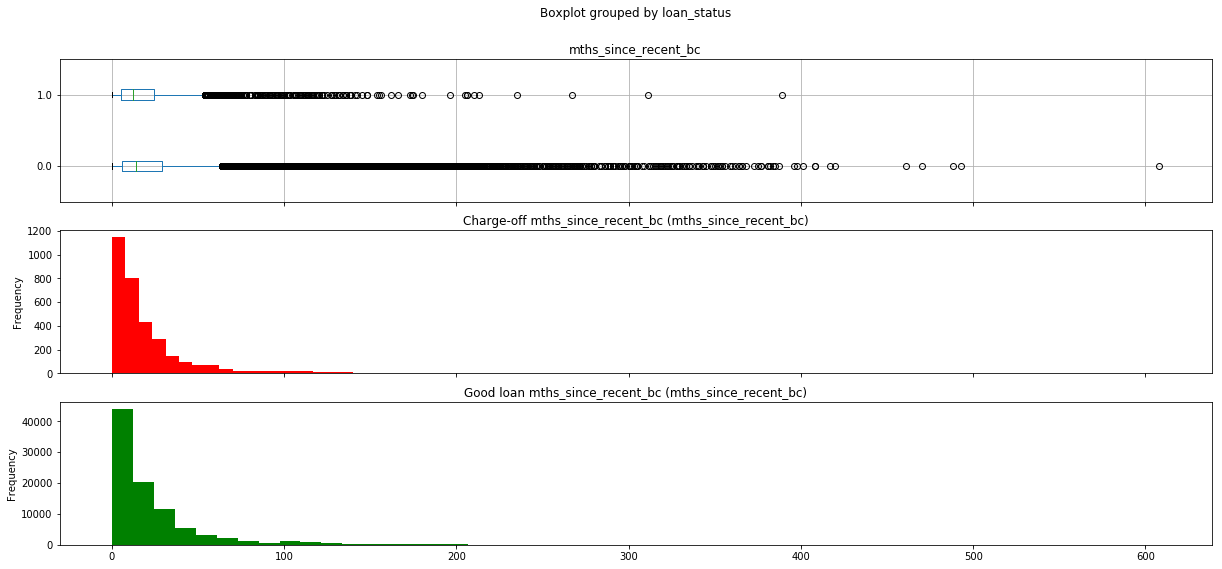

Missing values for mths_since_recent_inq 0


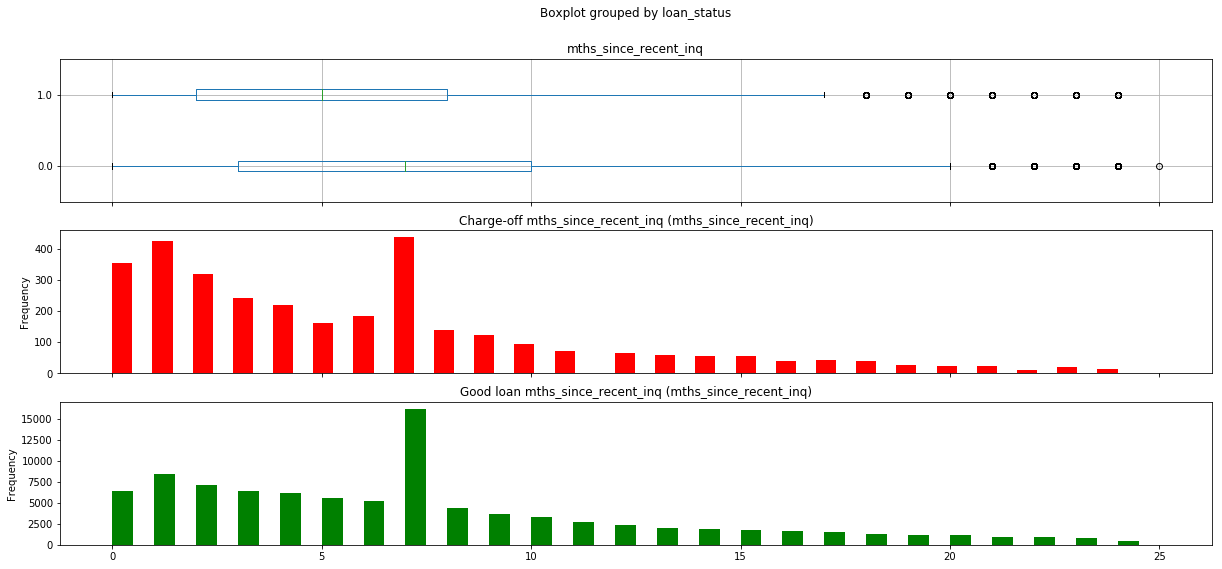

Missing values for num_accts_ever_120_pd 0


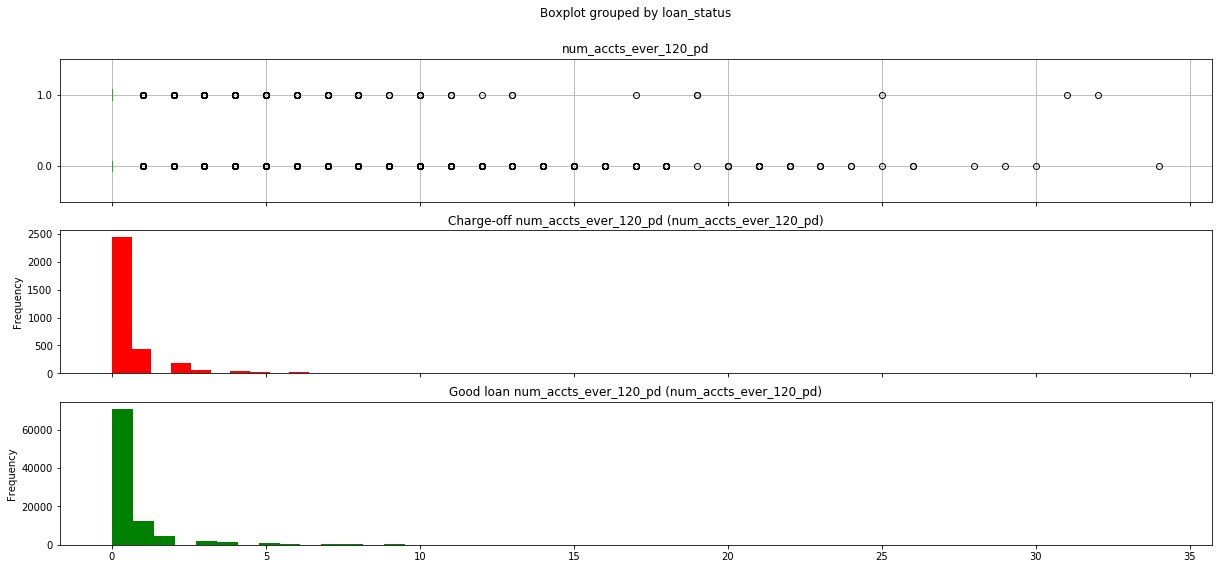

Missing values for num_actv_bc_tl 0


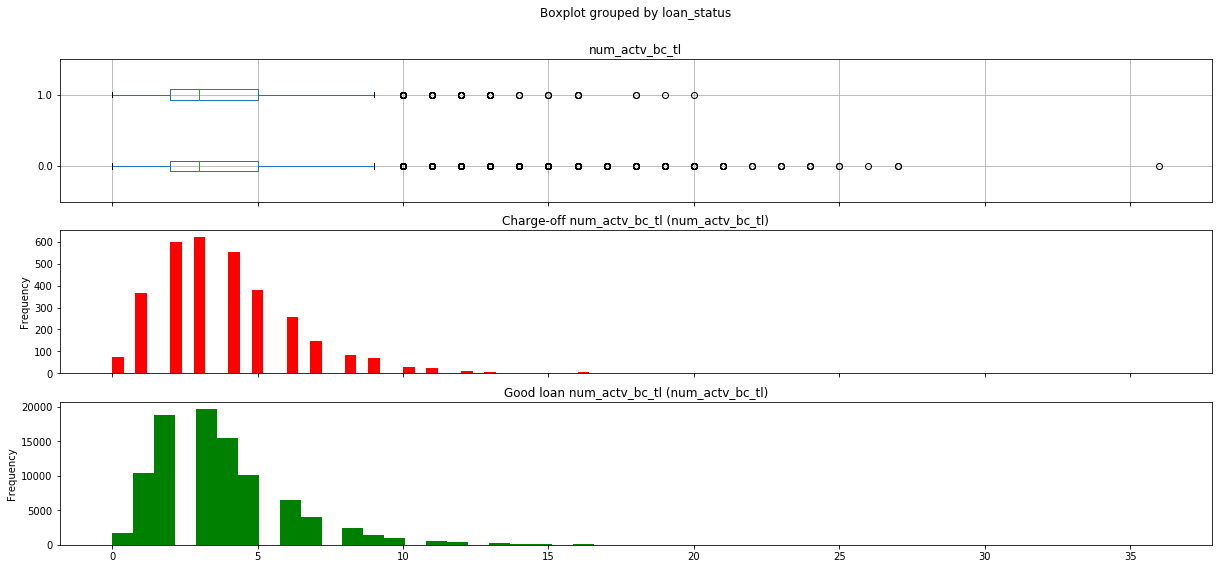

Missing values for num_actv_rev_tl 0


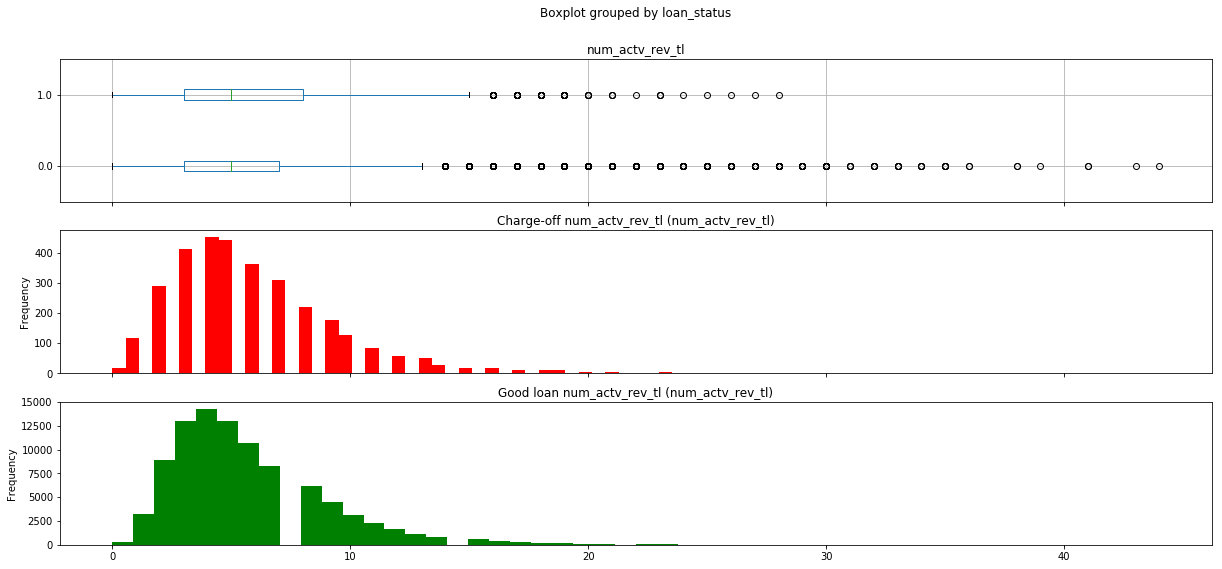

Missing values for num_bc_sats 0


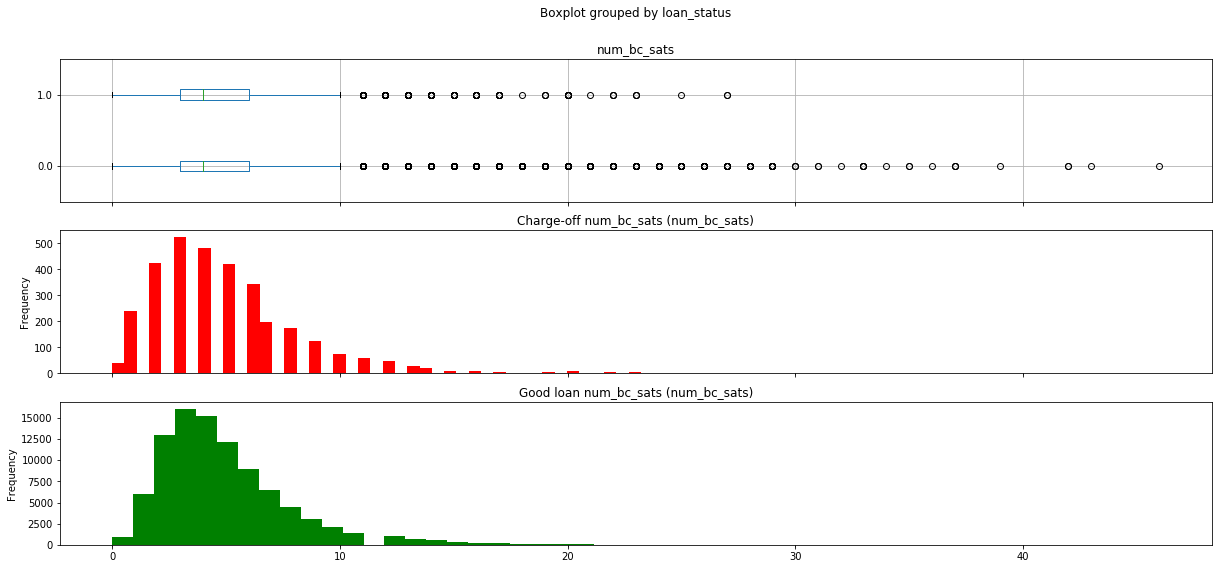

Missing values for num_bc_tl 0


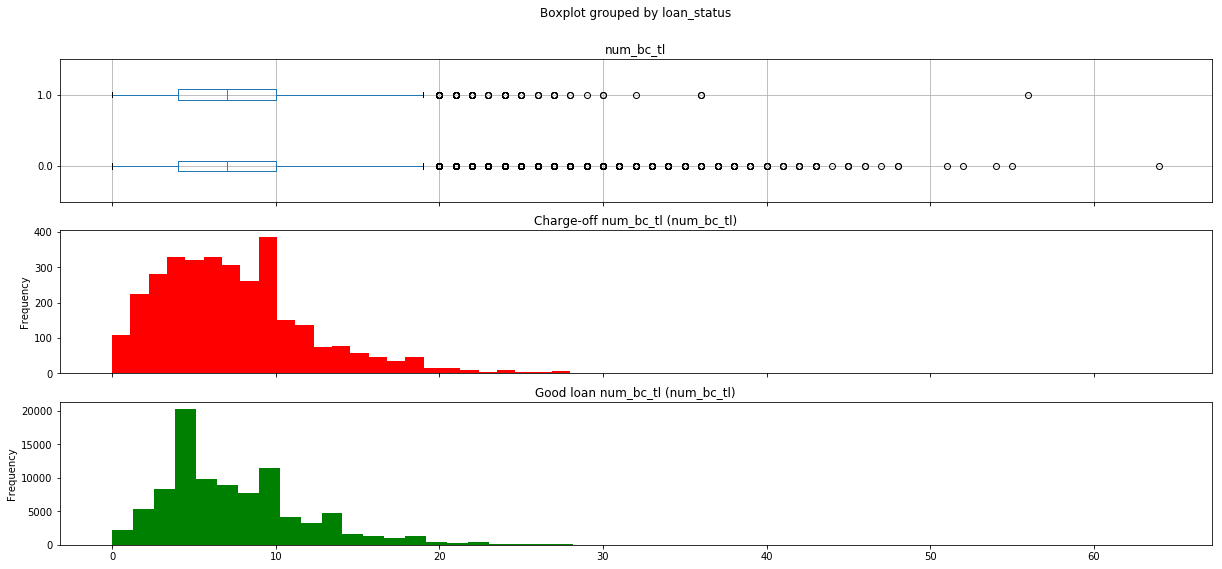

Missing values for num_il_tl 0


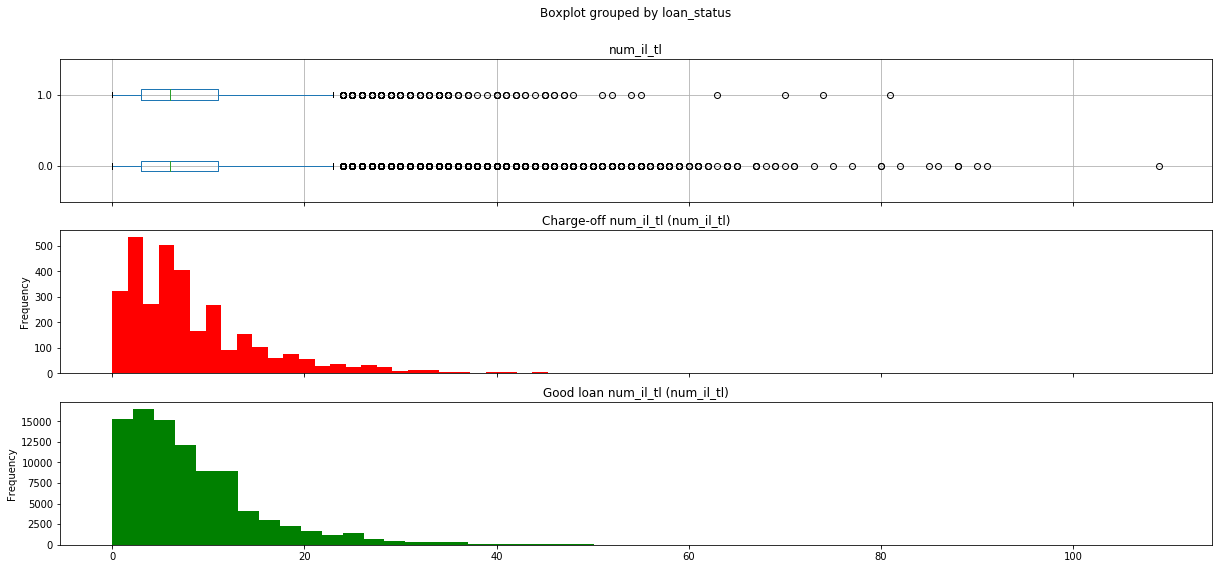

Missing values for num_op_rev_tl 0


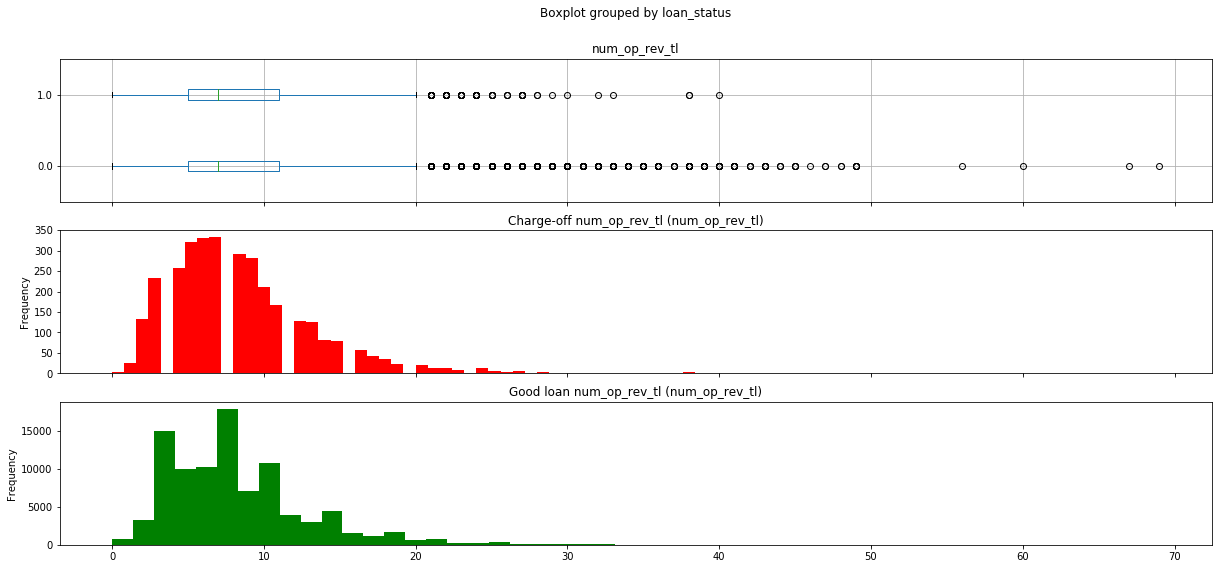

Missing values for num_rev_accts 0


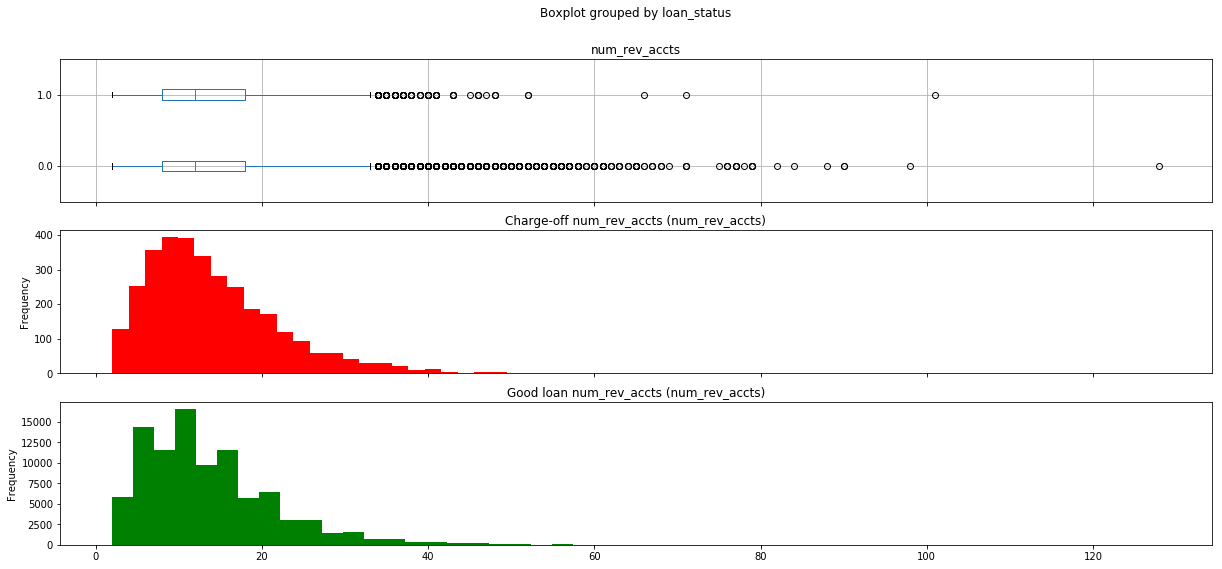

Missing values for num_rev_tl_bal_gt_0 0


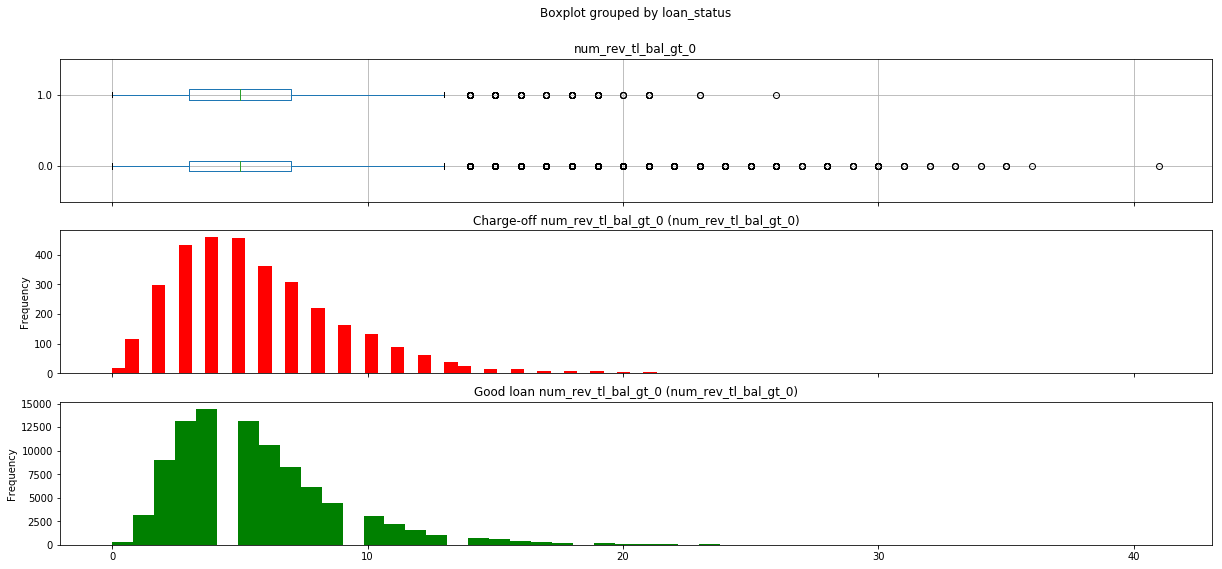

Missing values for num_sats 0


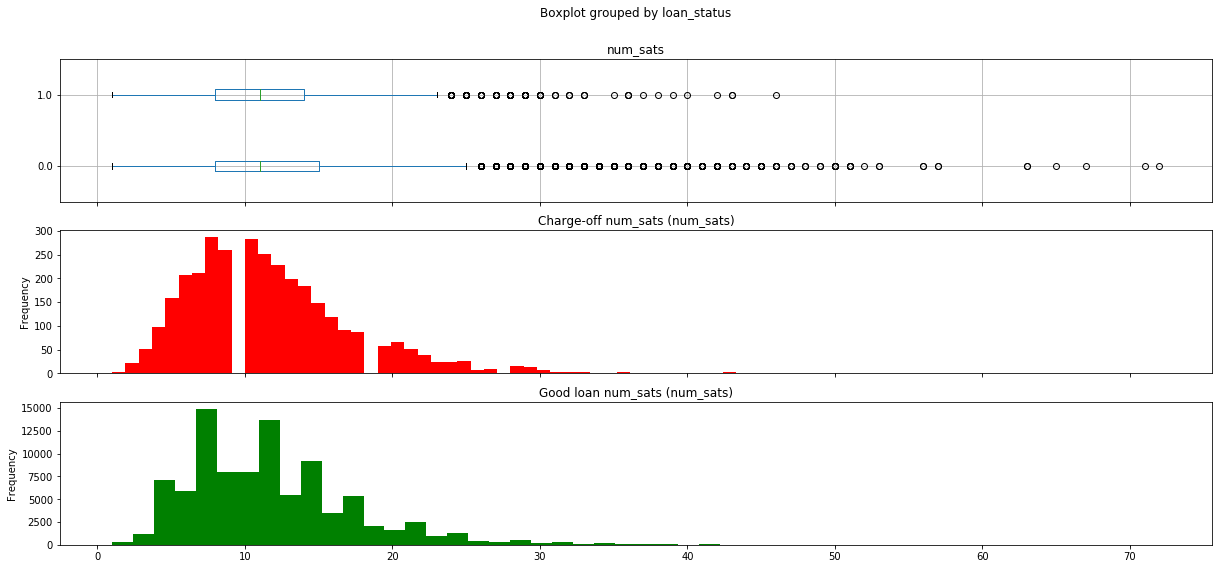

Missing values for num_tl_30dpd 0


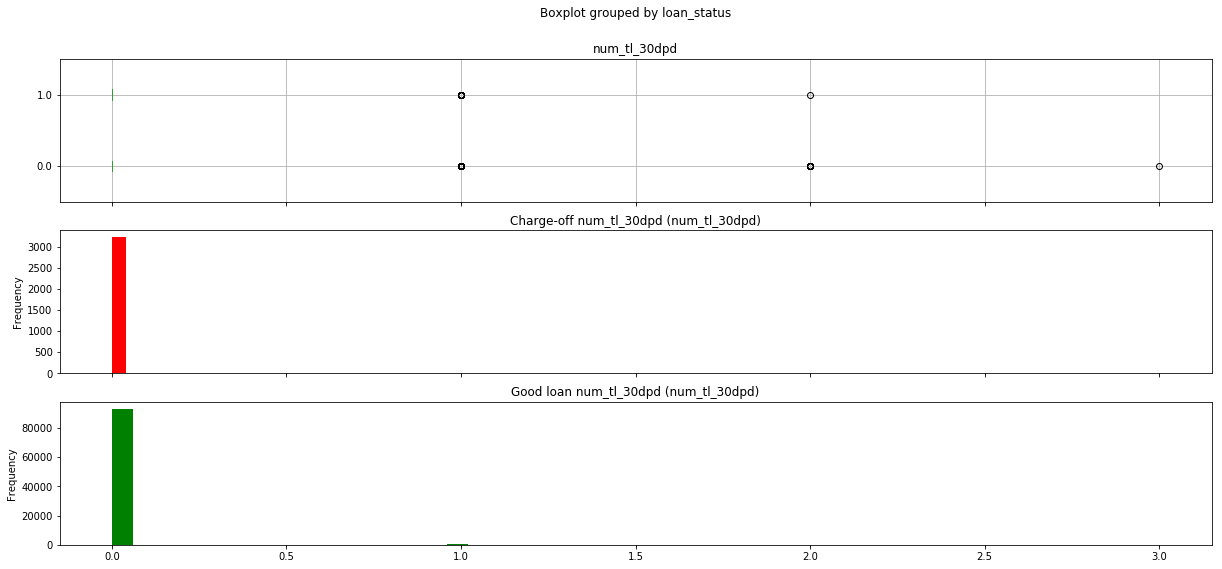

Missing values for num_tl_90g_dpd_24m 0


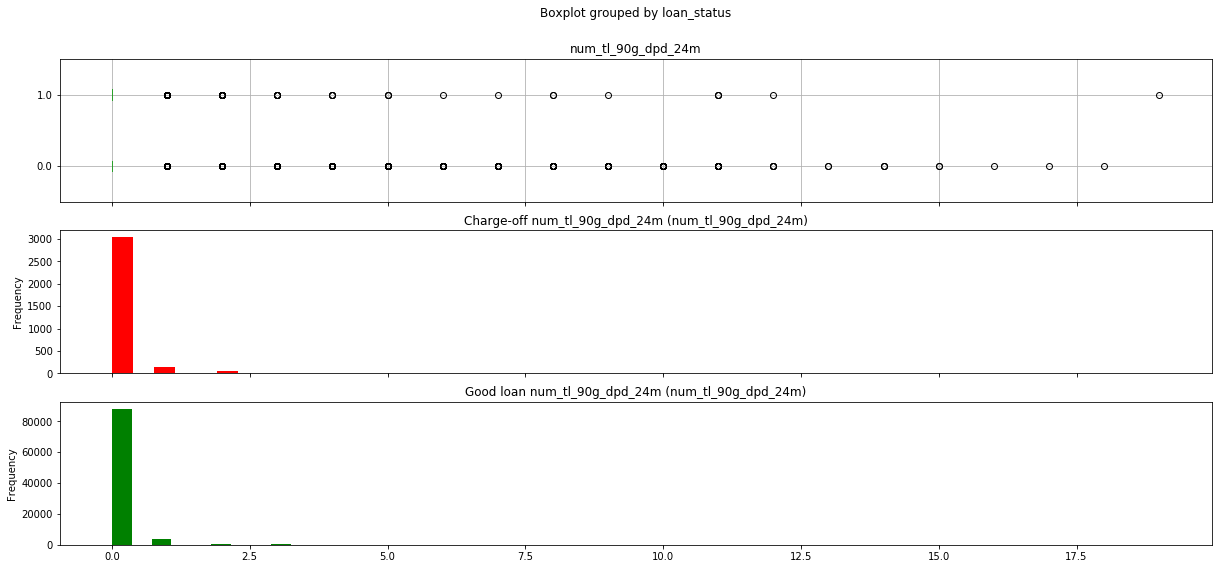

Missing values for num_tl_op_past_12m 0


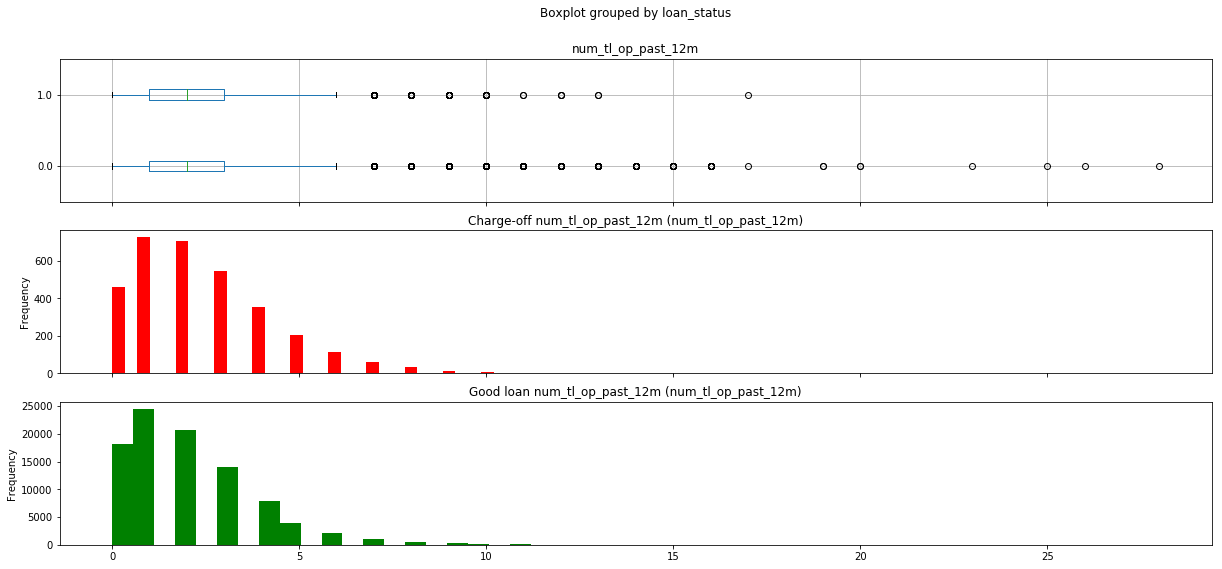

Missing values for pct_tl_nvr_dlq 0


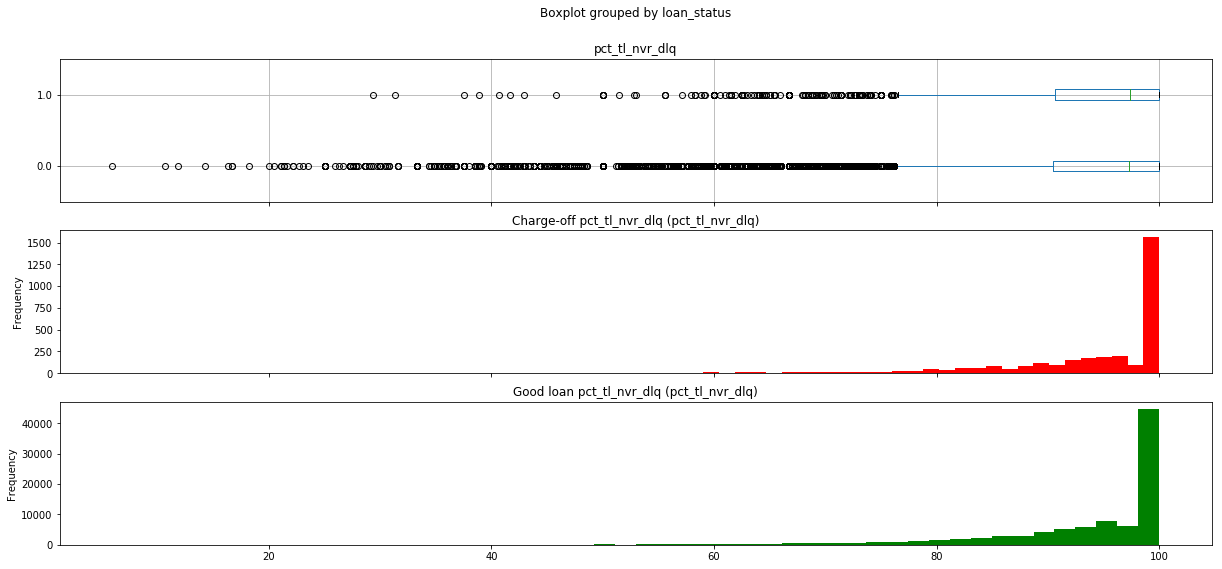

Missing values for percent_bc_gt_75 0


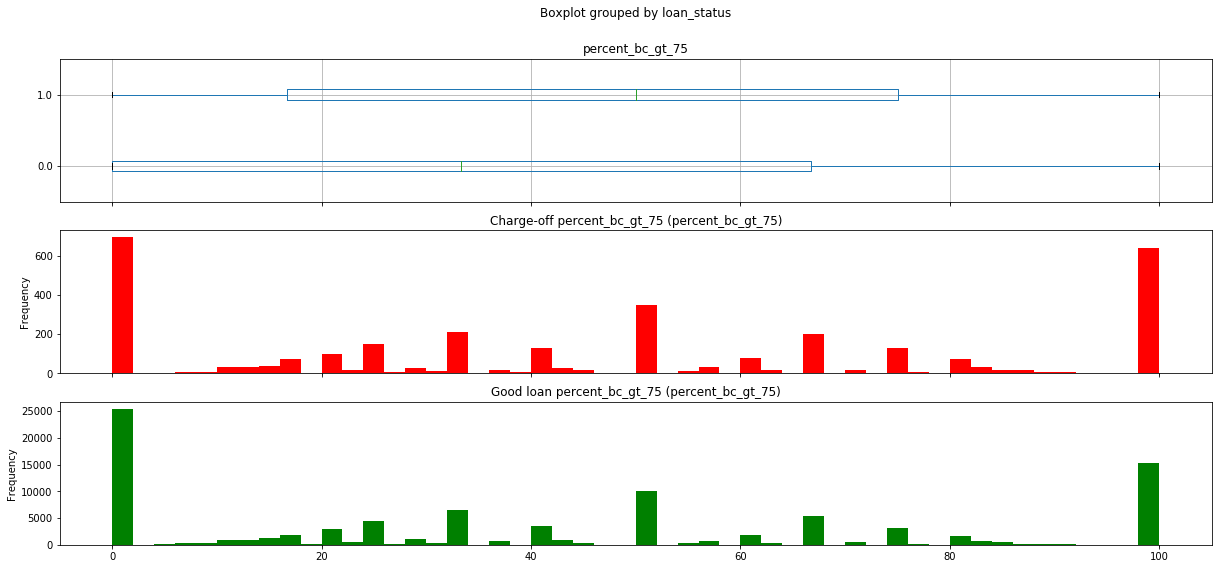

Missing values for pub_rec_bankruptcies 0


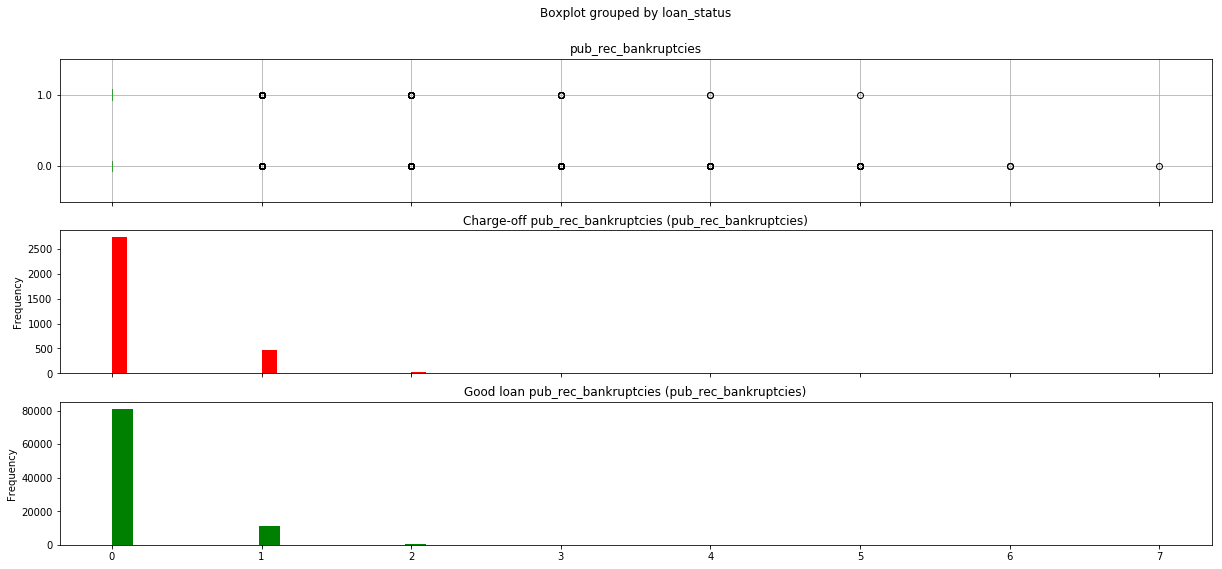

Missing values for tax_liens 0


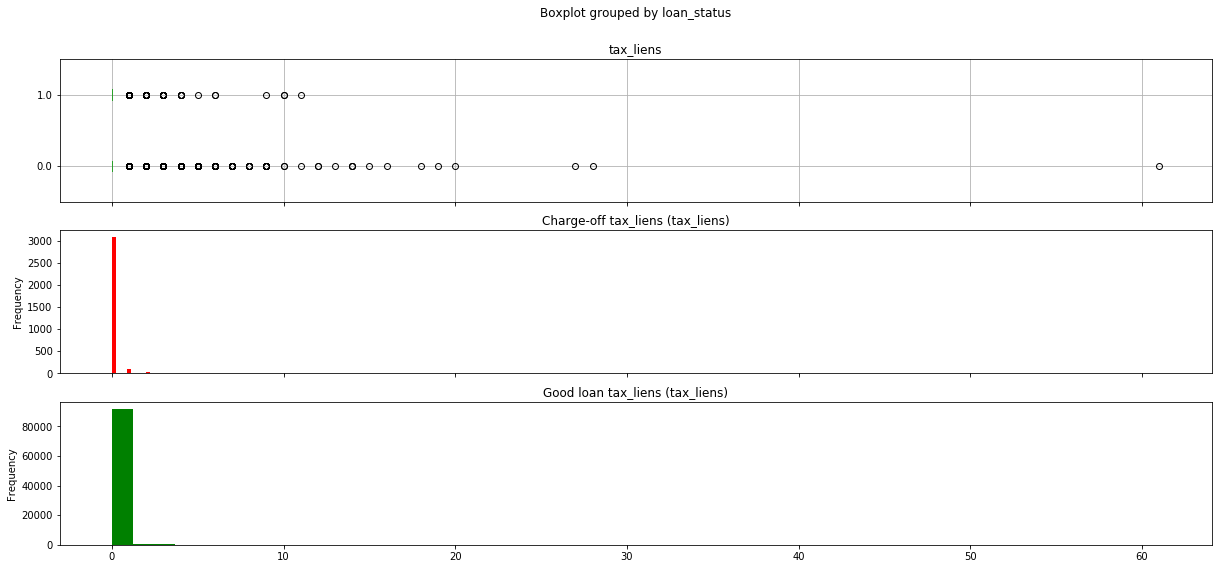

Missing values for tot_hi_cred_lim 0


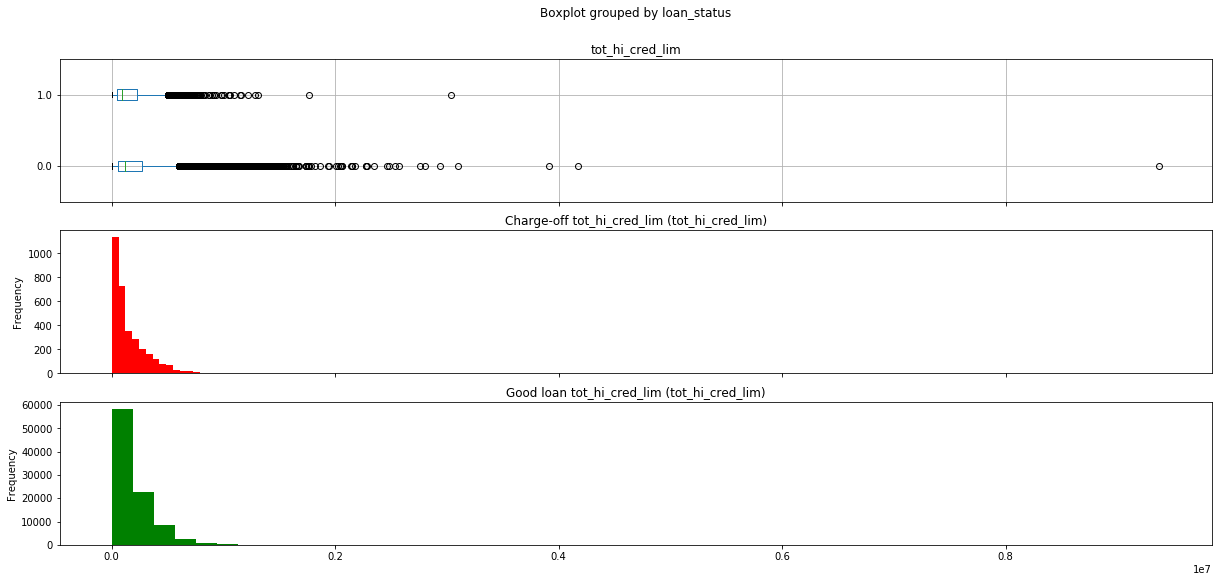

Missing values for total_bal_ex_mort 0


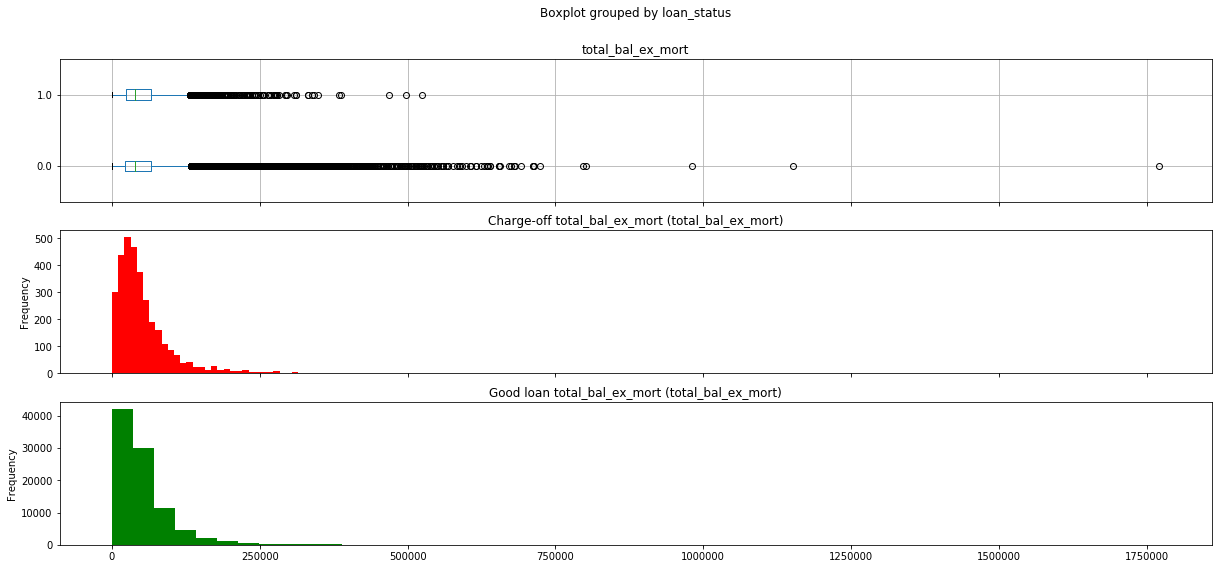

Missing values for total_bc_limit 0


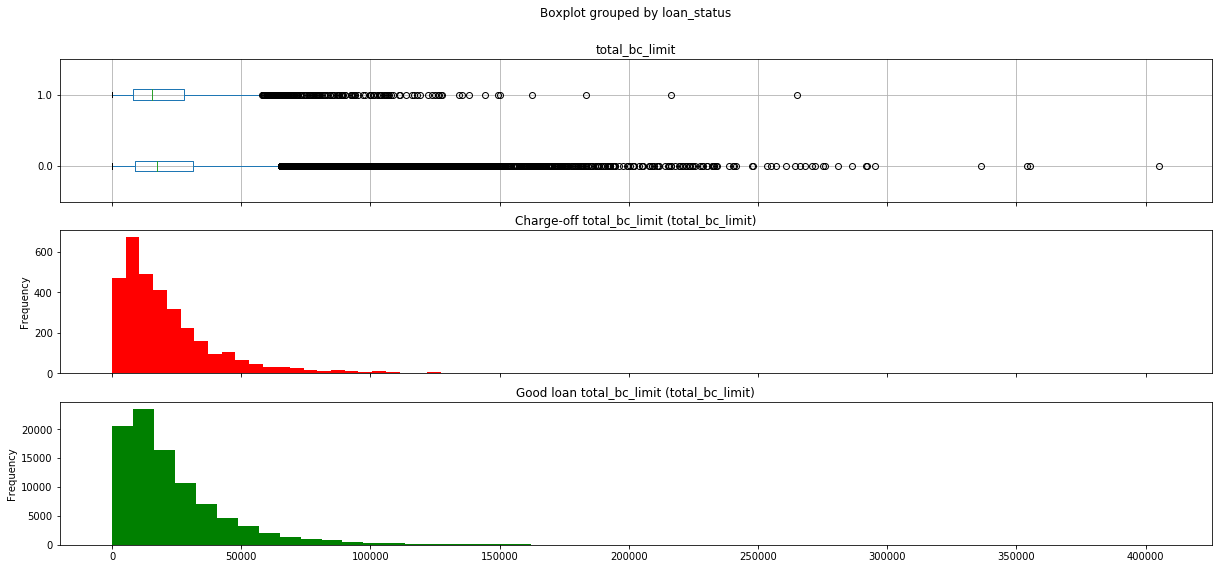

Missing values for total_il_high_credit_limit 0


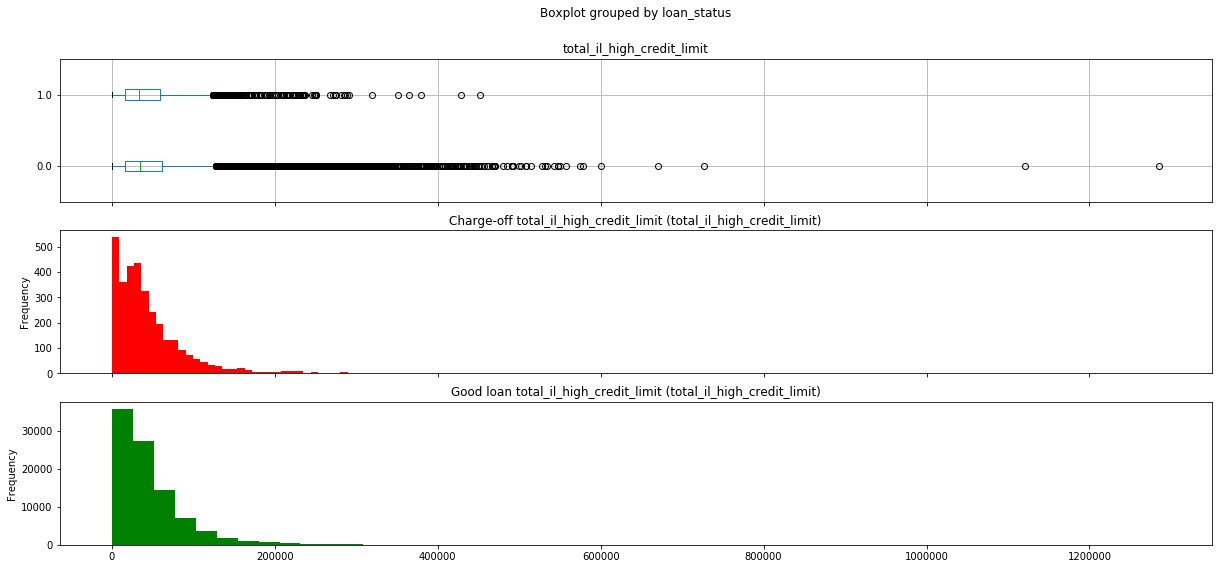

Missing values for fico_range_mean 0


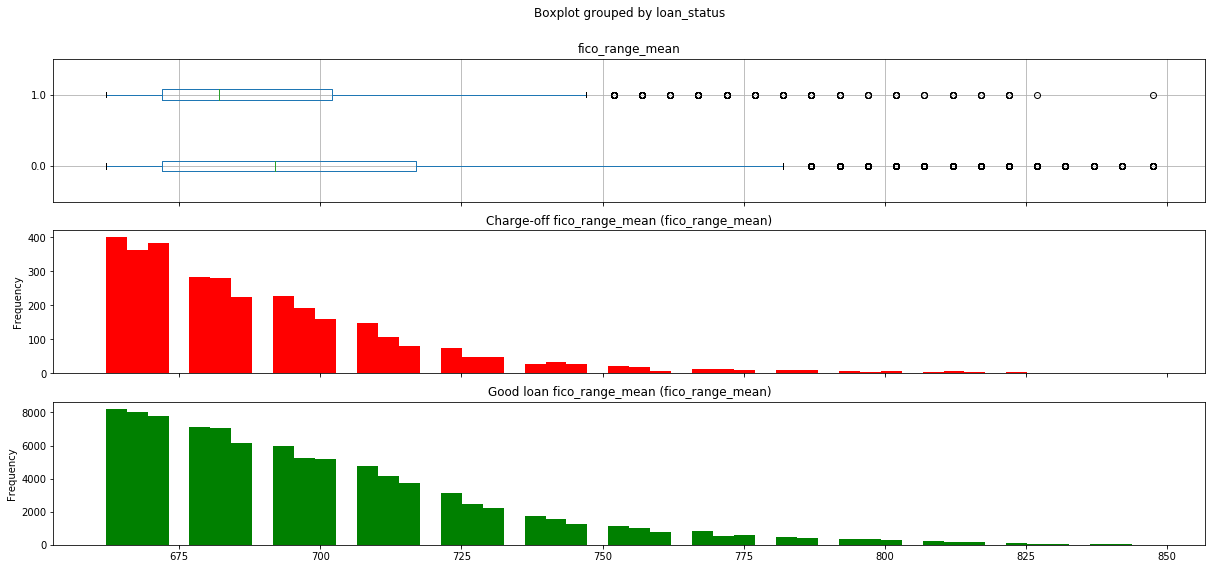

Missing values for cr_history 0


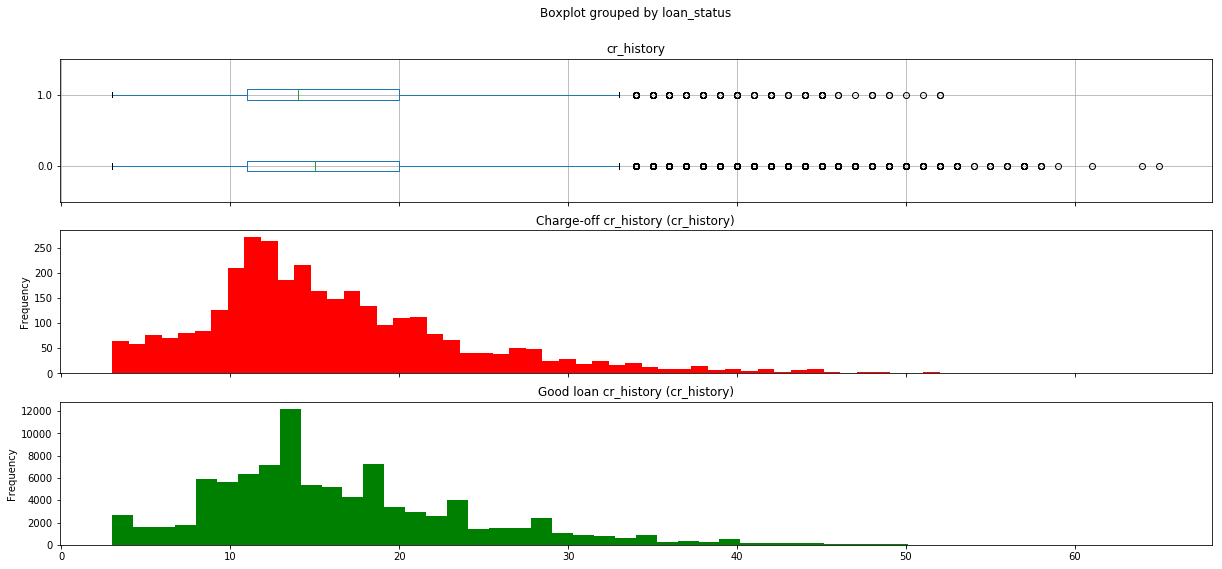

Missing values for verification_status_Not Verified 0


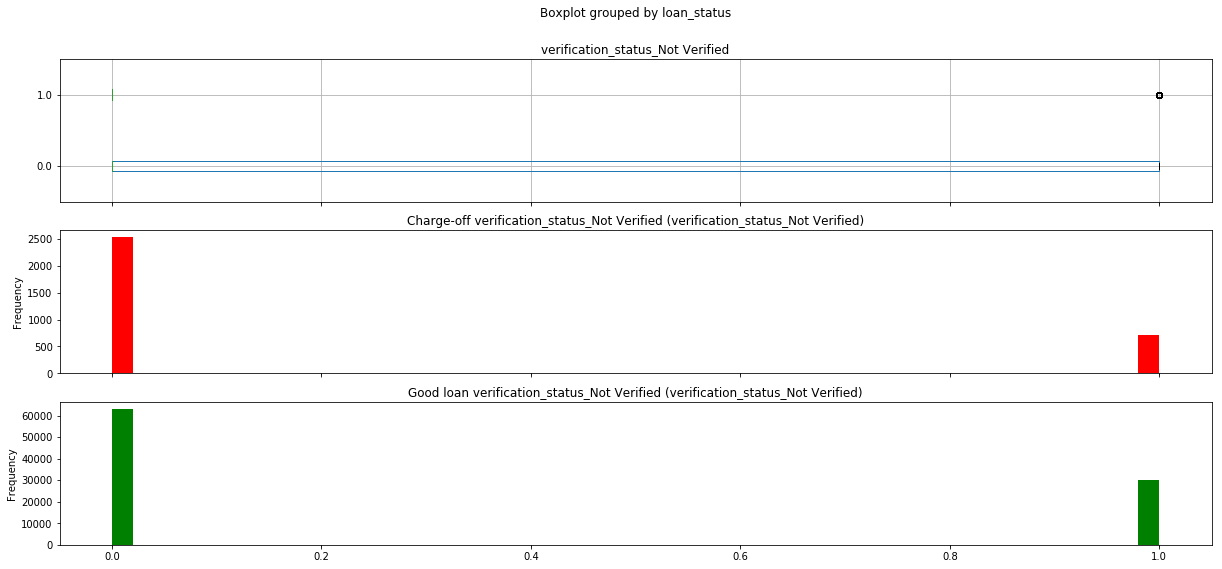

Missing values for verification_status_Source Verified 0


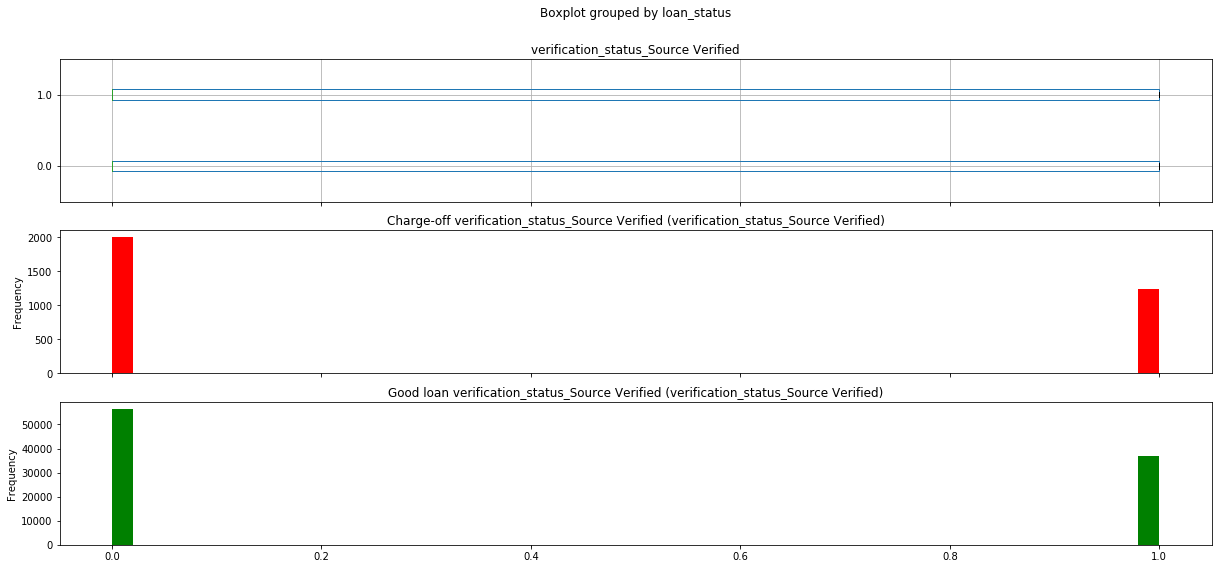

Missing values for verification_status_Verified 0


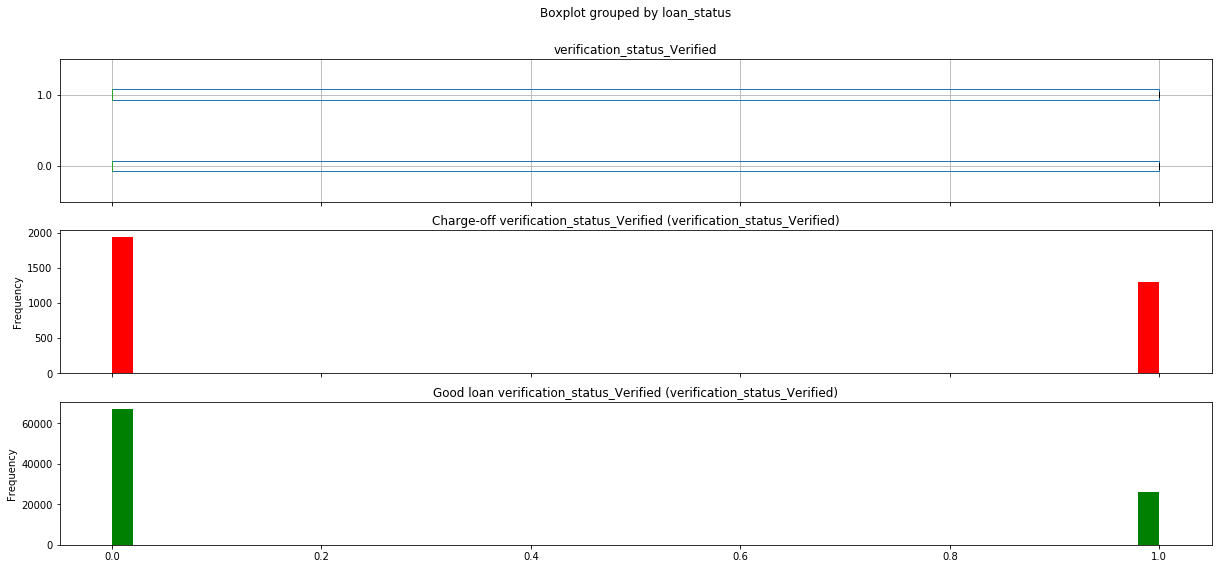

Missing values for home_ownership_ANY 0


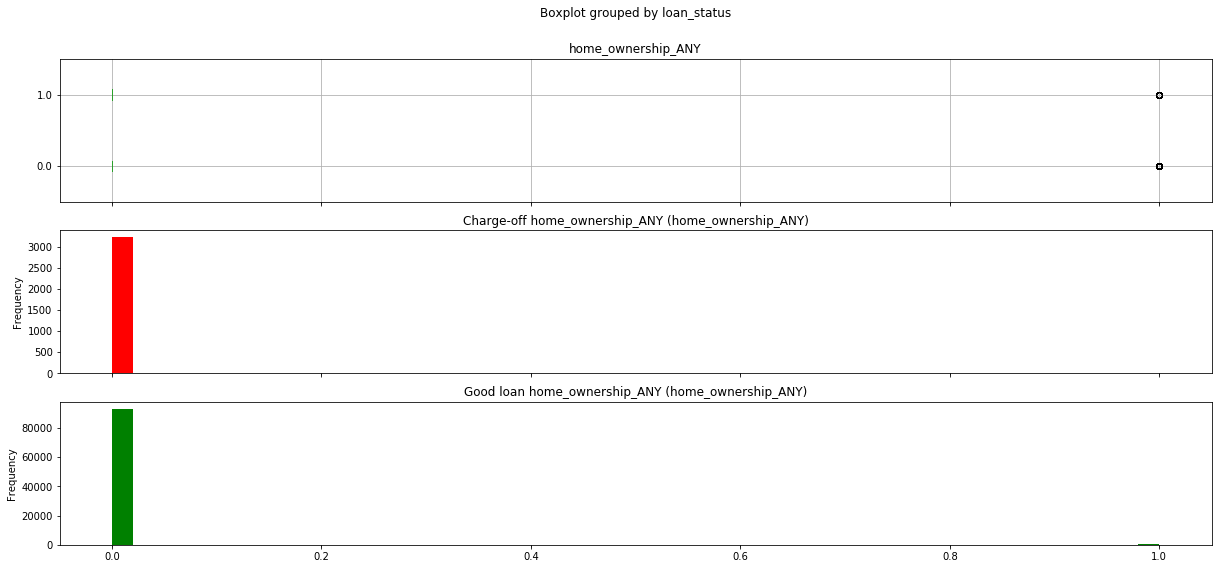

Missing values for home_ownership_MORTGAGE 0


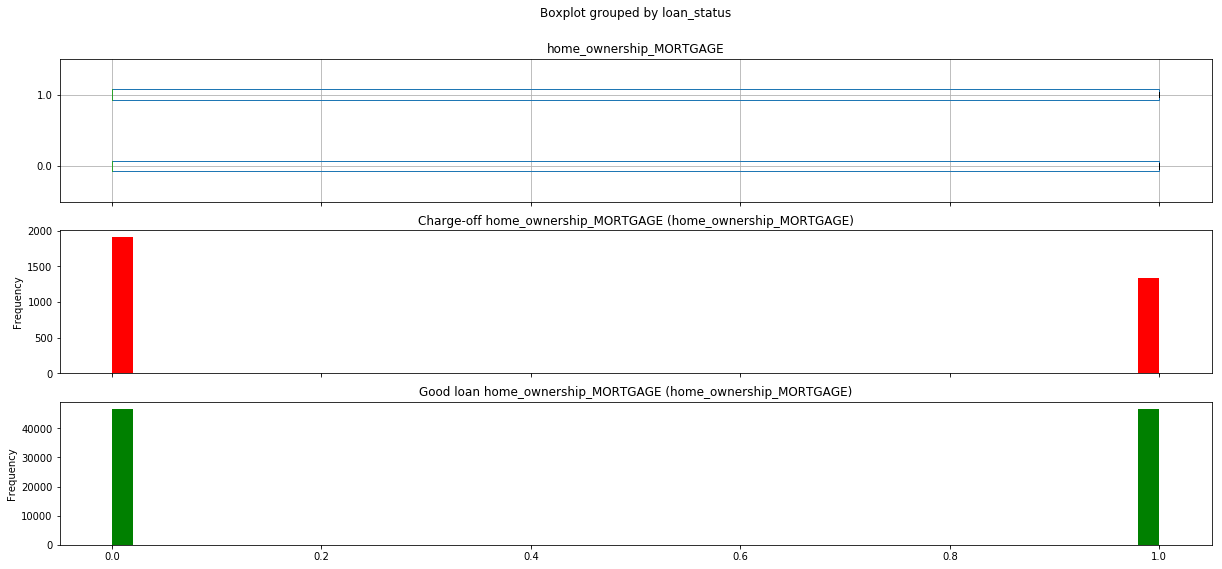

Missing values for home_ownership_OWN 0


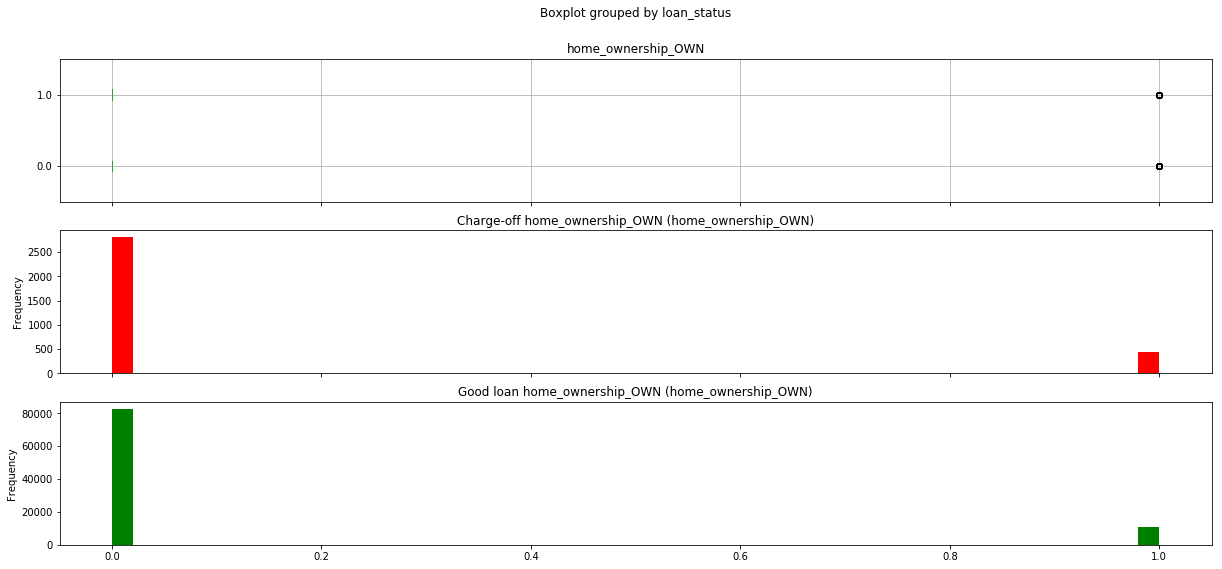

Missing values for home_ownership_RENT 0


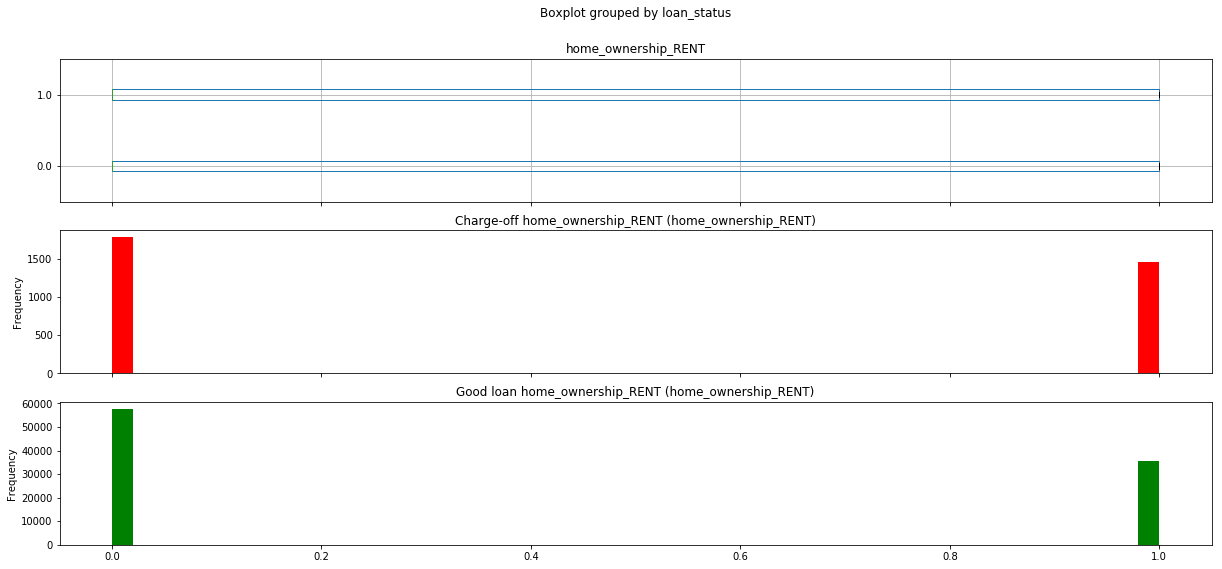

Missing values for verification_status_joint_Not Verified 0


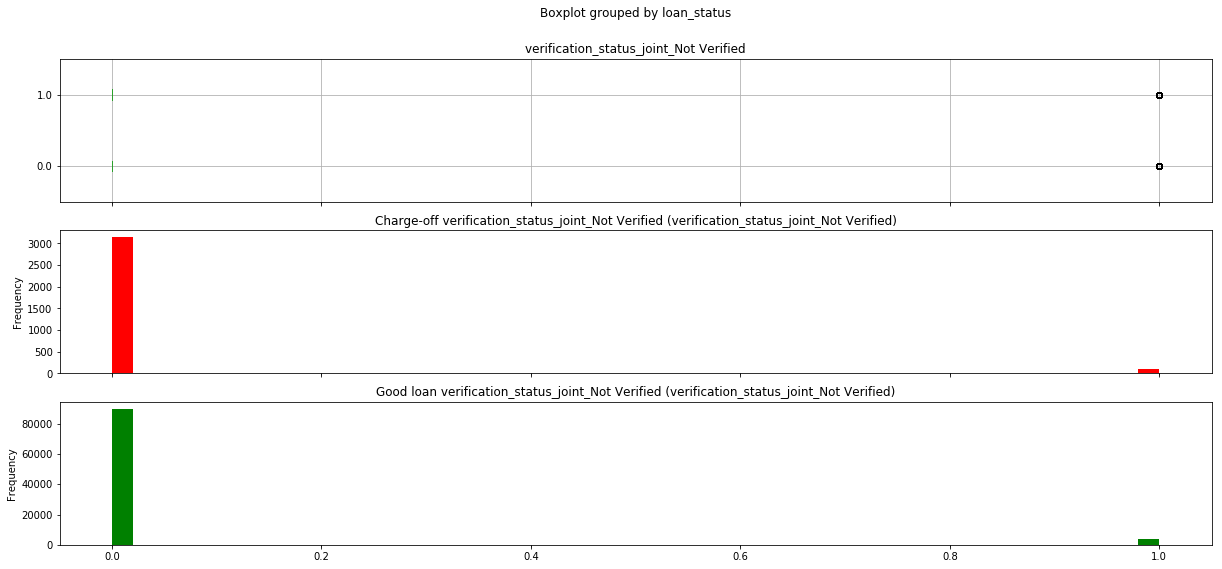

Missing values for verification_status_joint_Source Verified 0


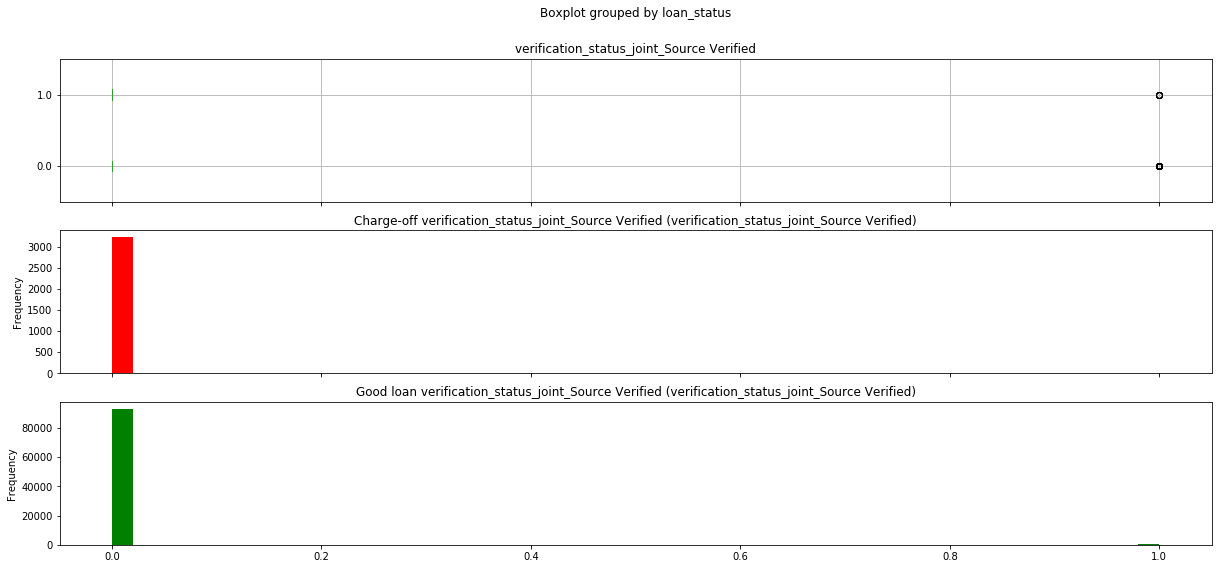

Missing values for verification_status_joint_Verified 0


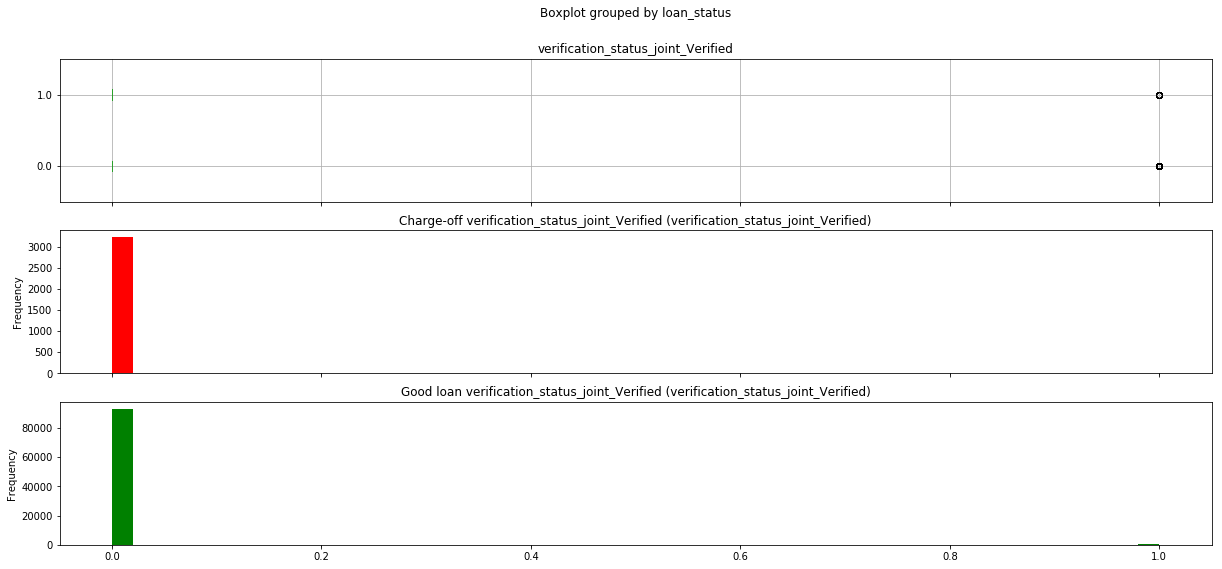

Missing values for purpose_car 0


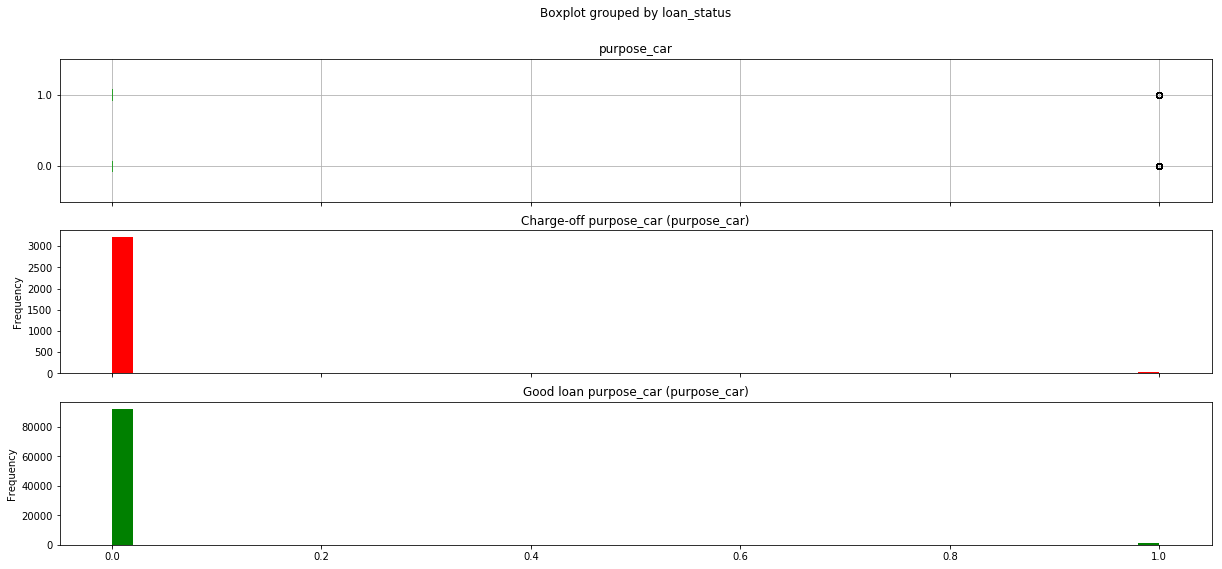

Missing values for purpose_credit_card 0


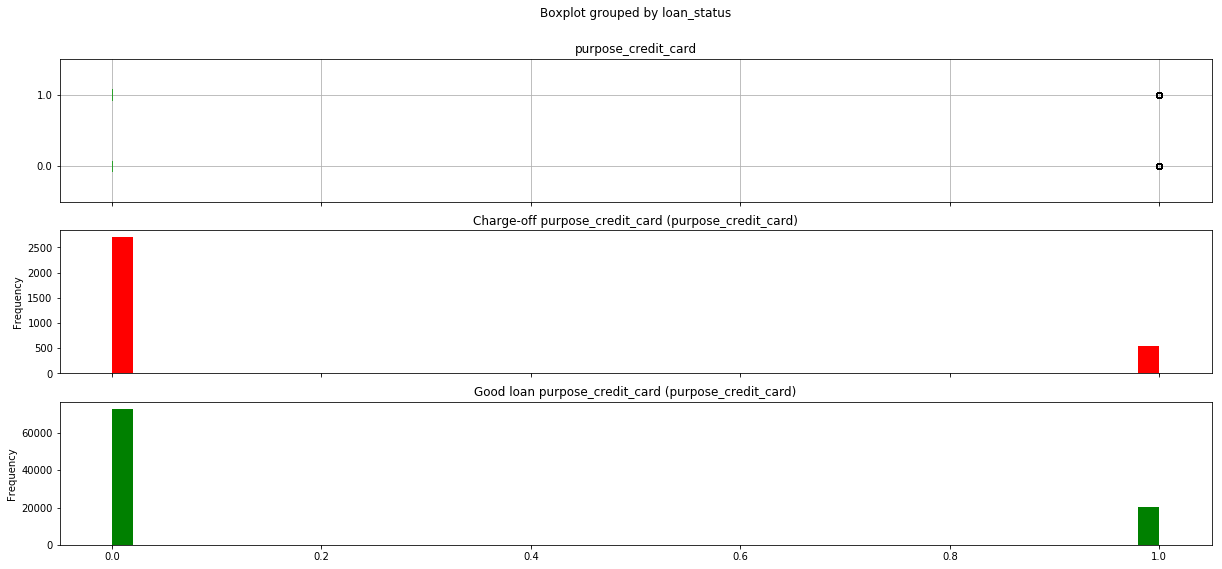

Missing values for purpose_debt_consolidation 0


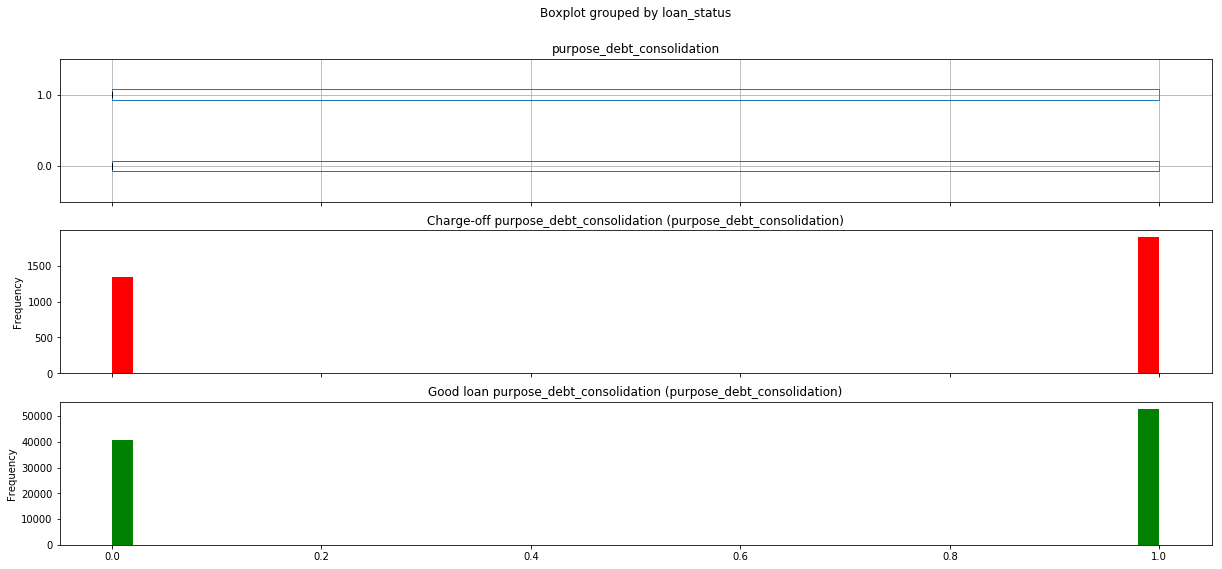

Missing values for purpose_home_improvement 0


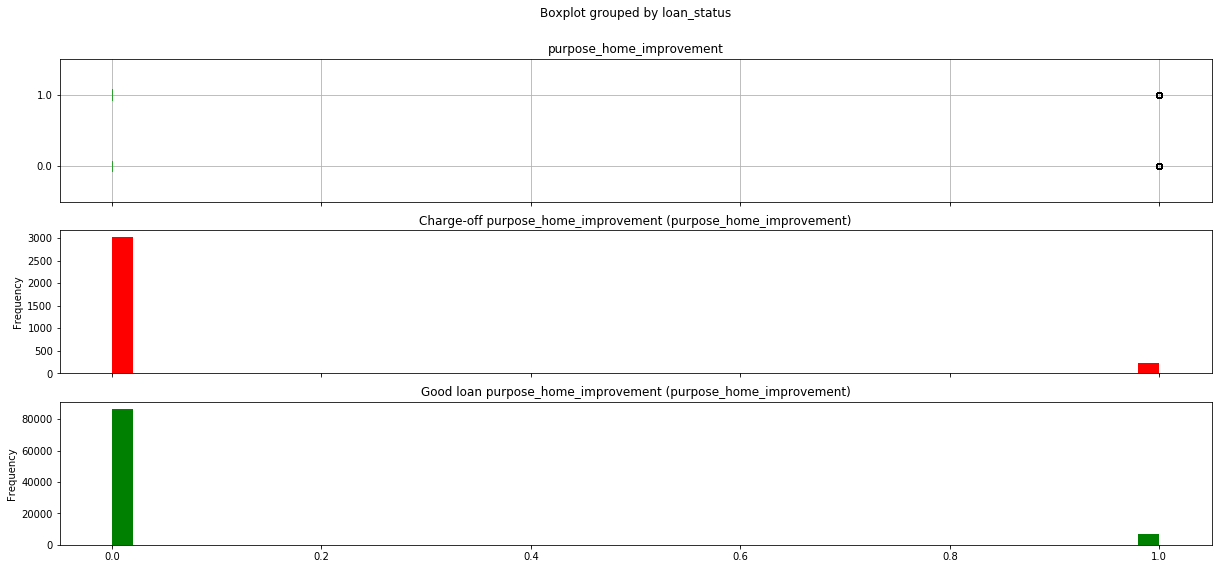

Missing values for purpose_house 0


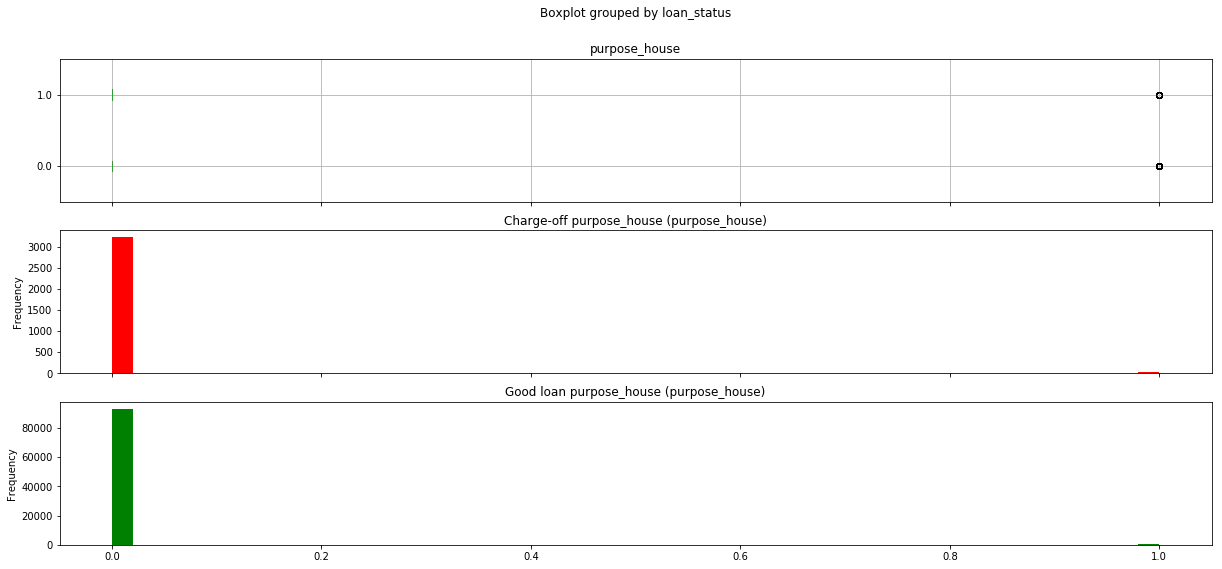

Missing values for purpose_major_purchase 0


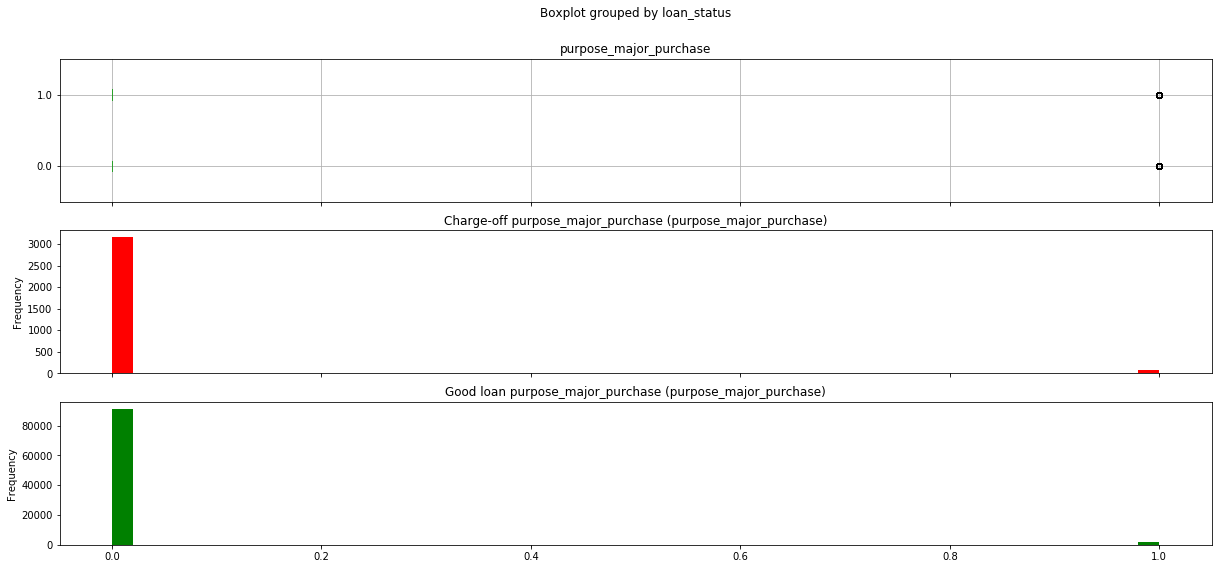

Missing values for purpose_medical 0


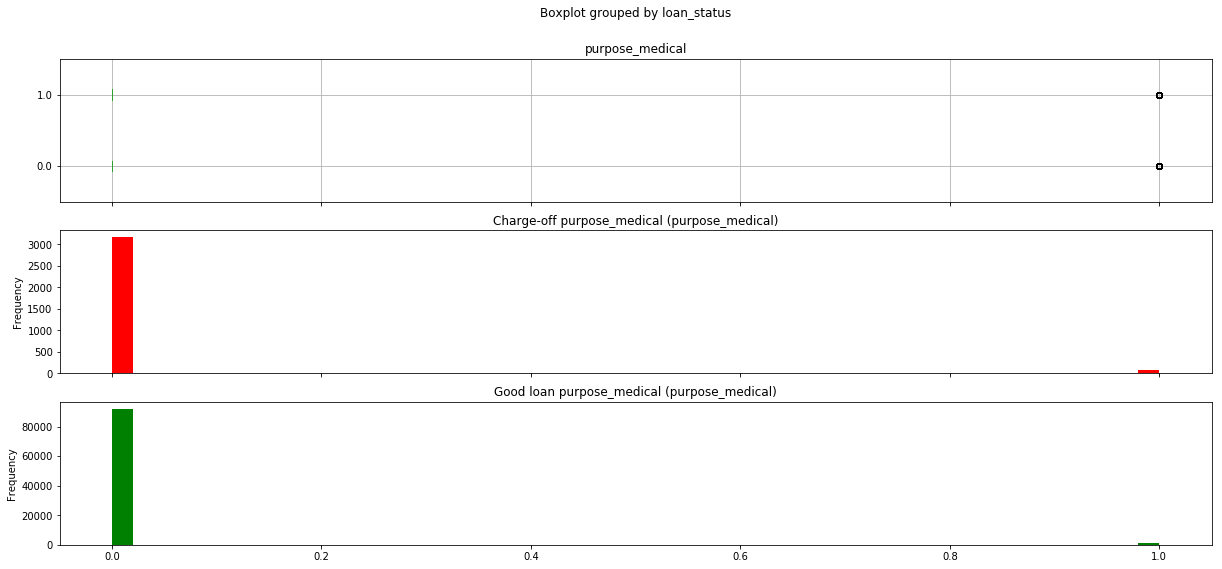

Missing values for purpose_moving 0


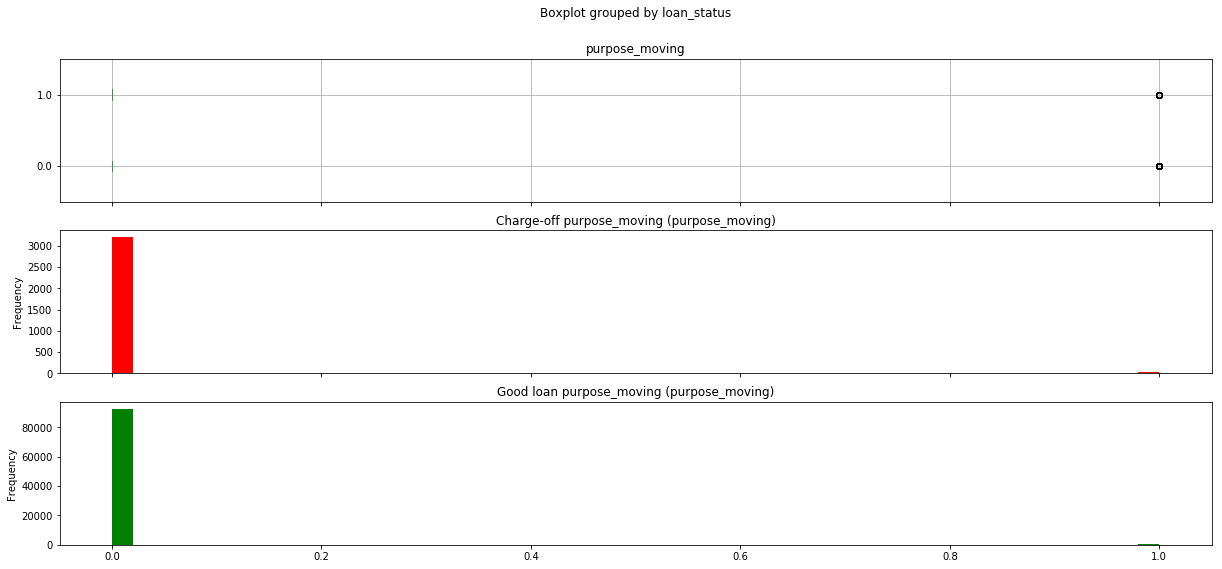

Missing values for purpose_other 0


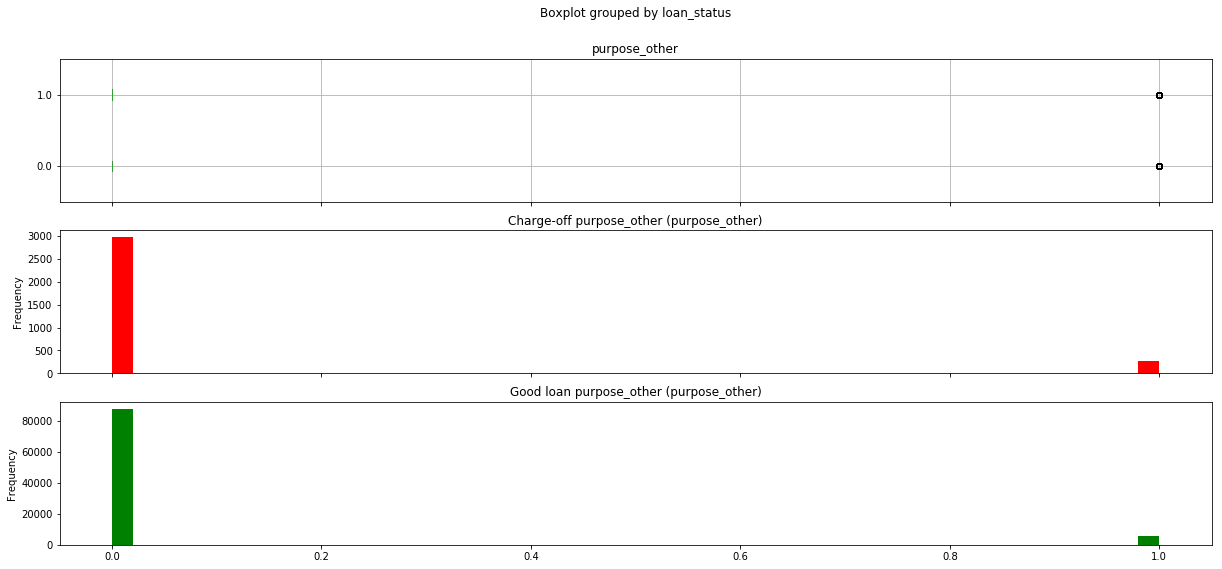

Missing values for purpose_renewable_energy 0


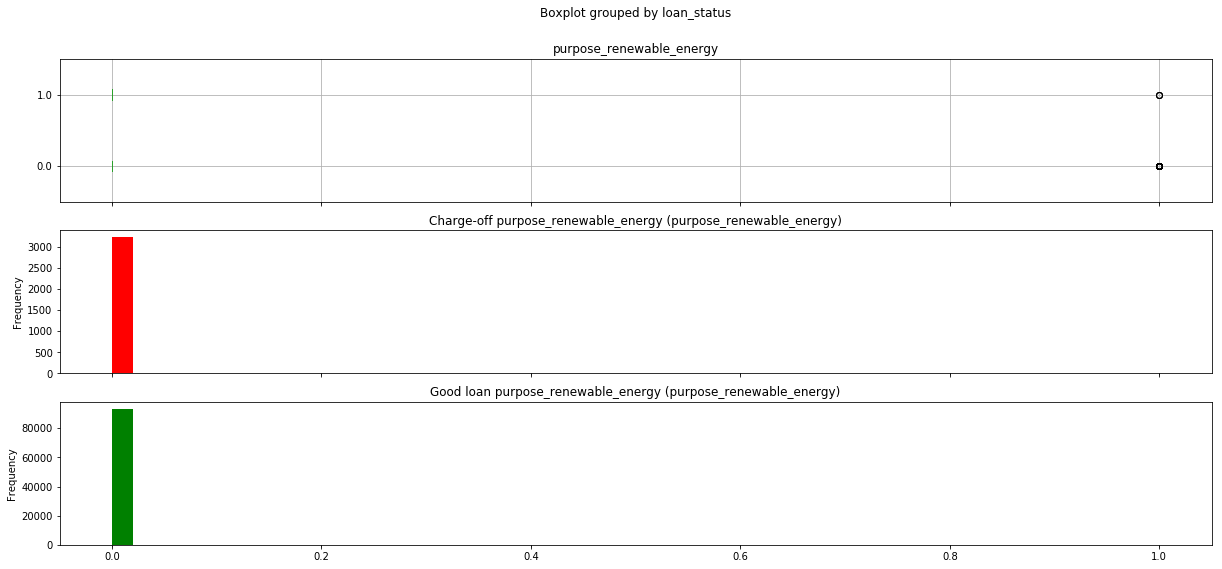

Missing values for purpose_small_business 0


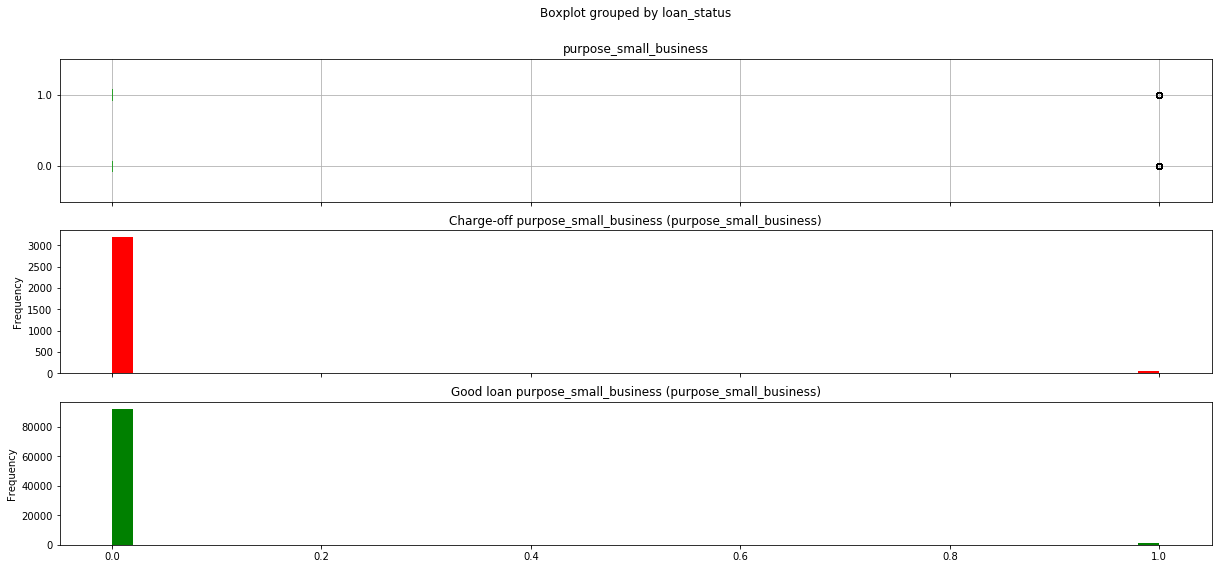

Missing values for purpose_vacation 0


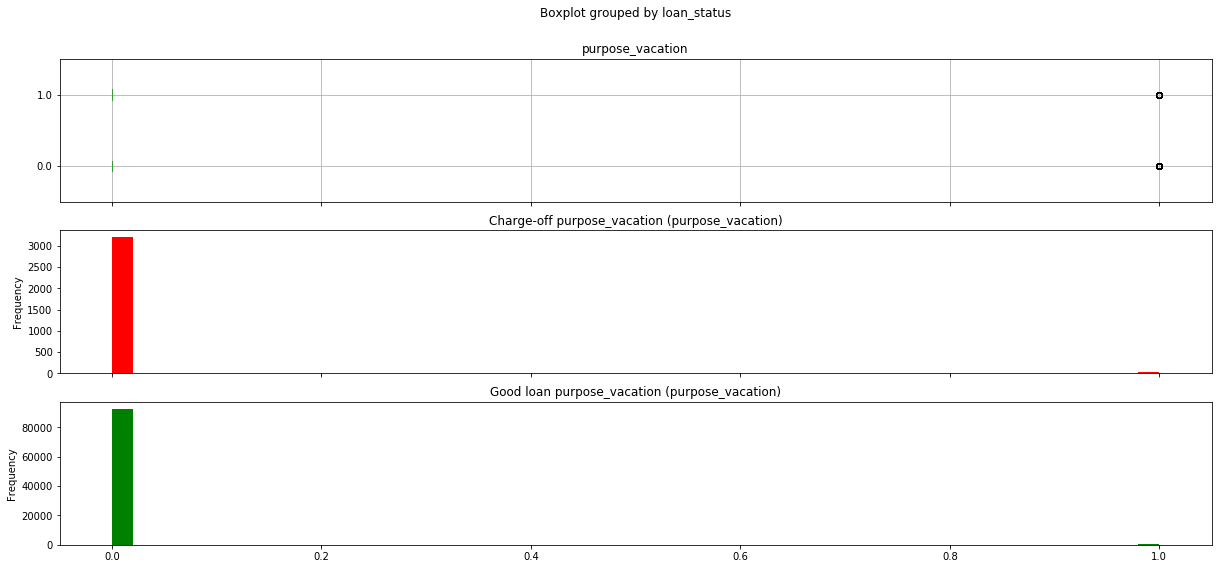

Missing values for emp_length_1 year 0


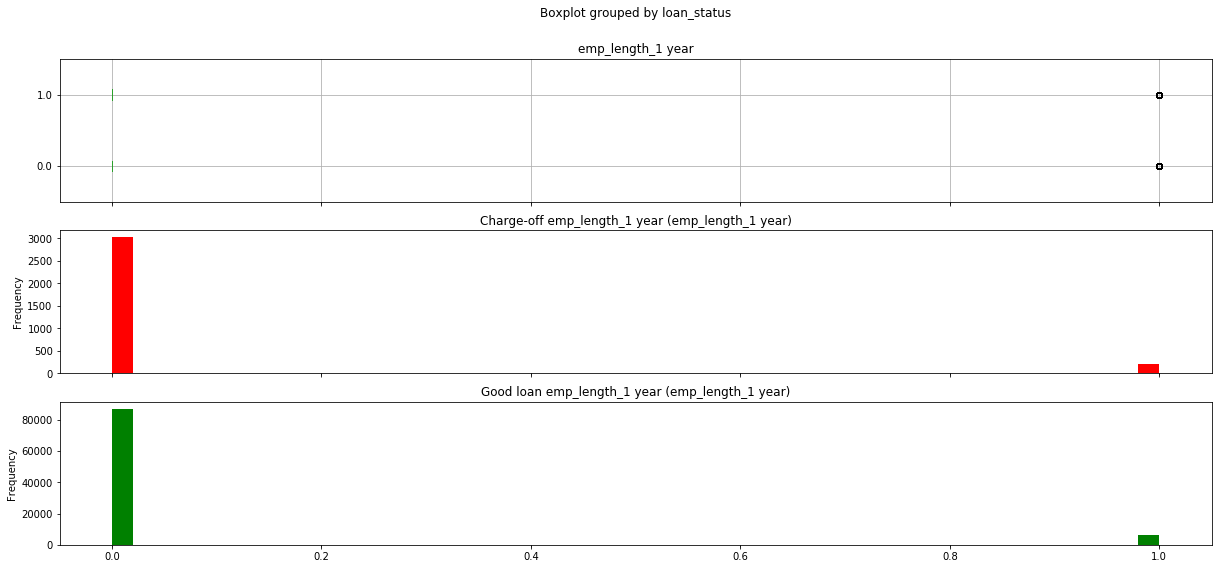

Missing values for emp_length_10+ years 0


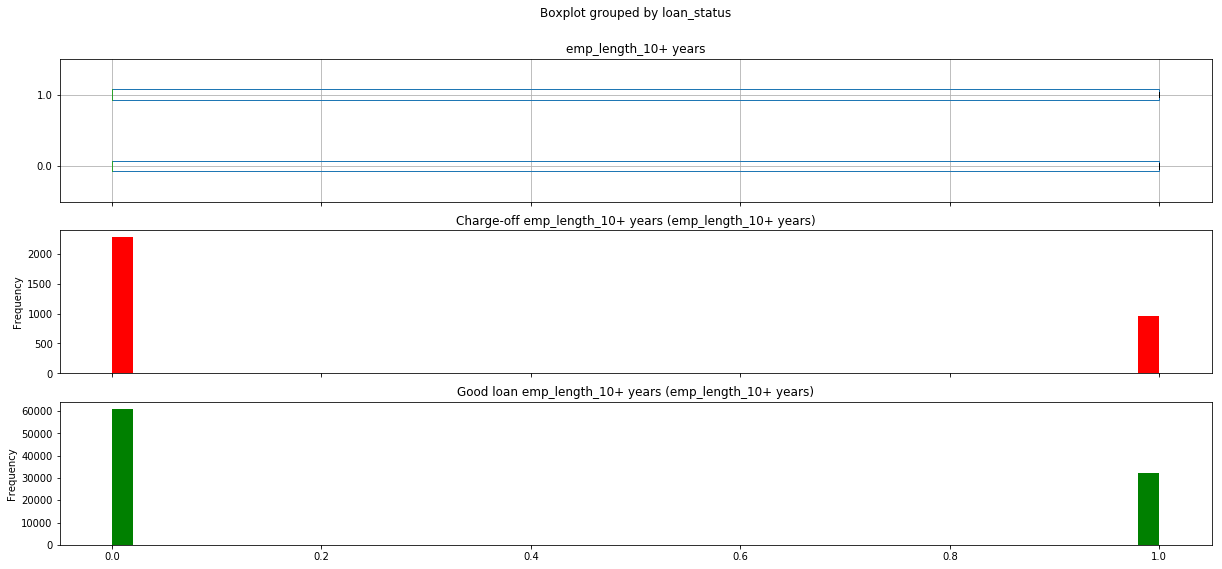

Missing values for emp_length_2 years 0


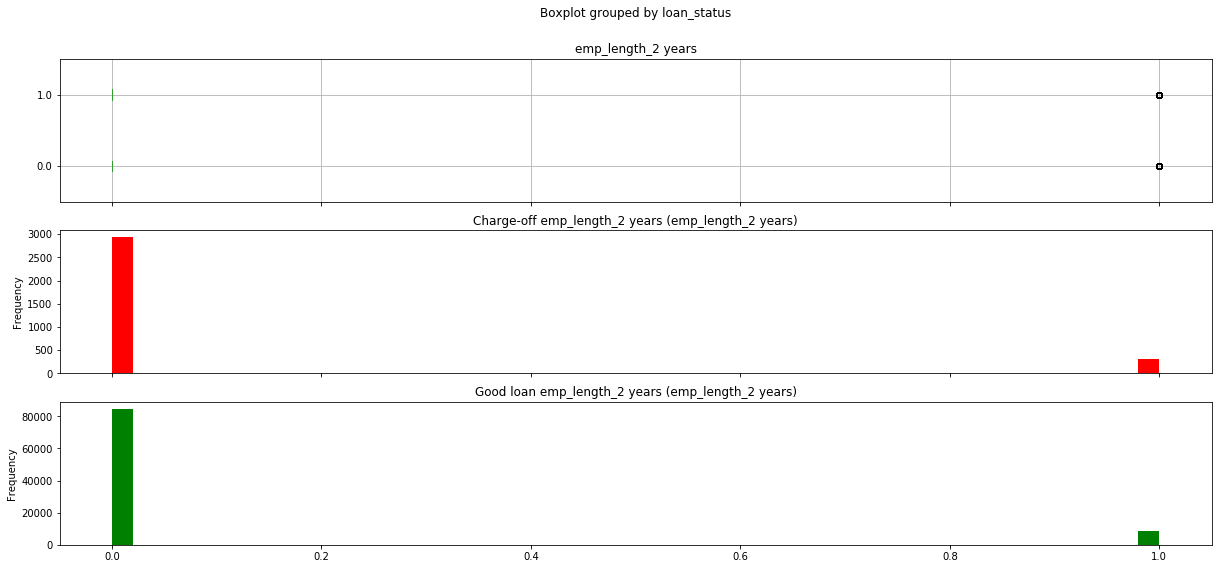

Missing values for emp_length_3 years 0


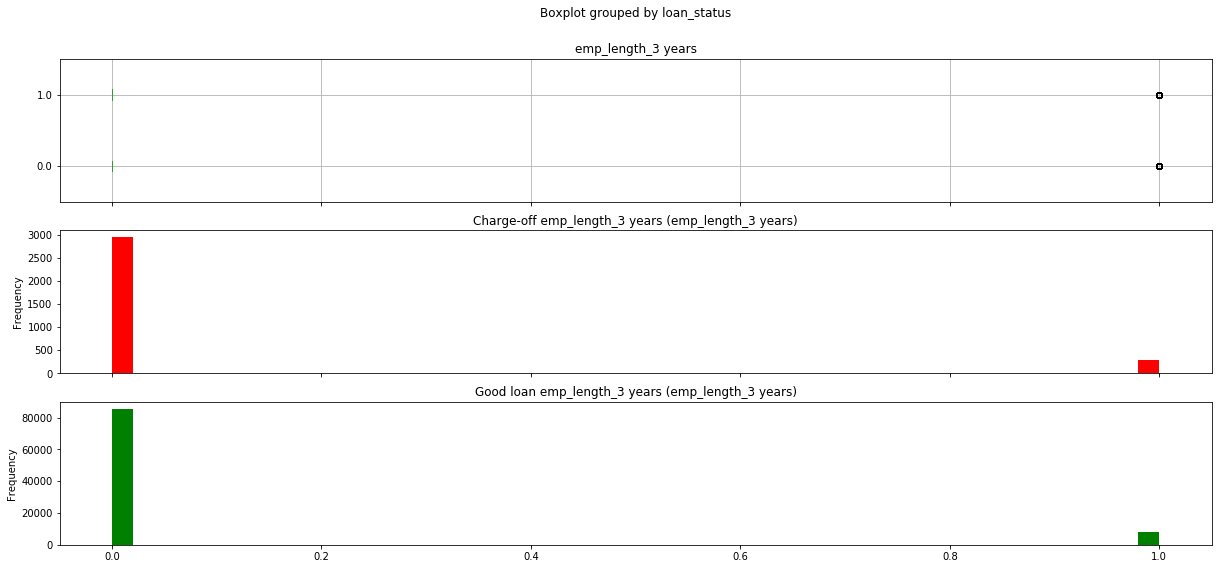

Missing values for emp_length_4 years 0


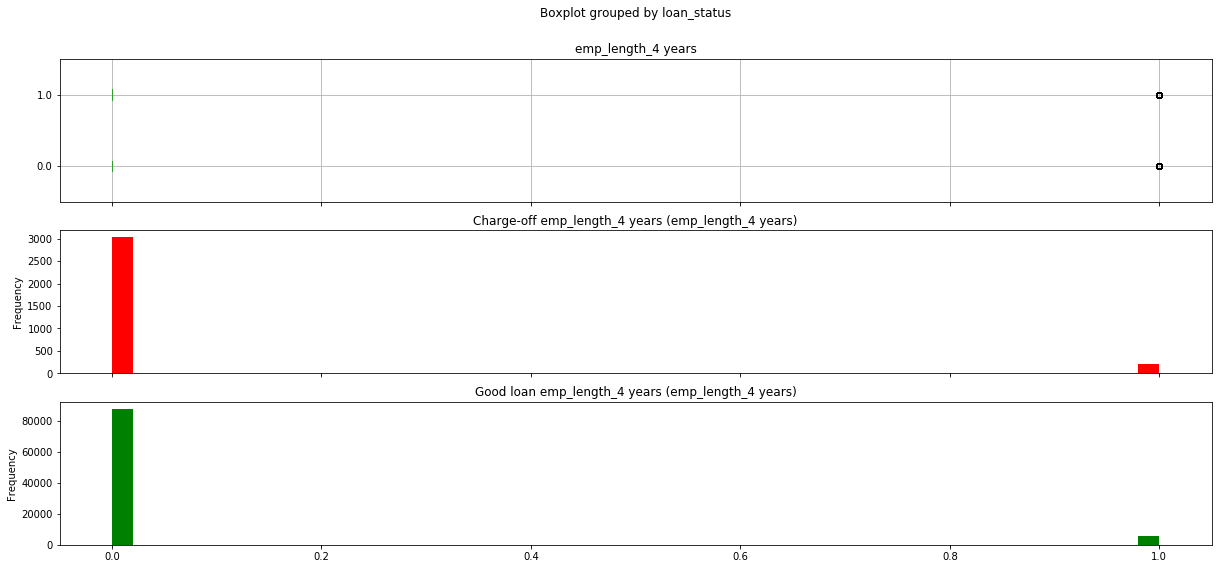

Missing values for emp_length_5 years 0


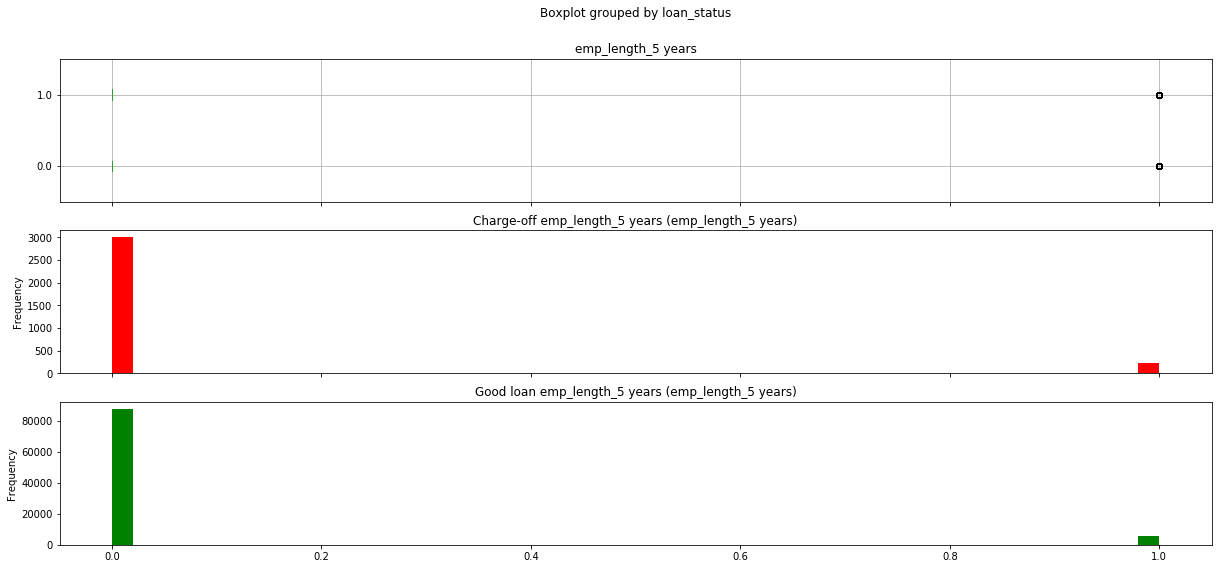

Missing values for emp_length_6 years 0


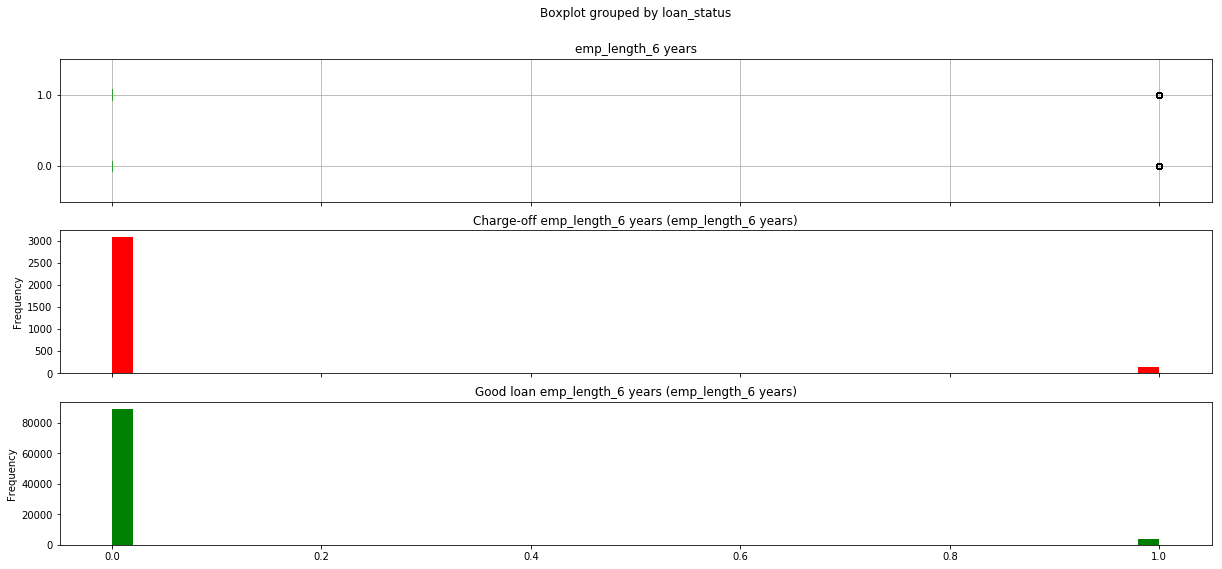

Missing values for emp_length_7 years 0


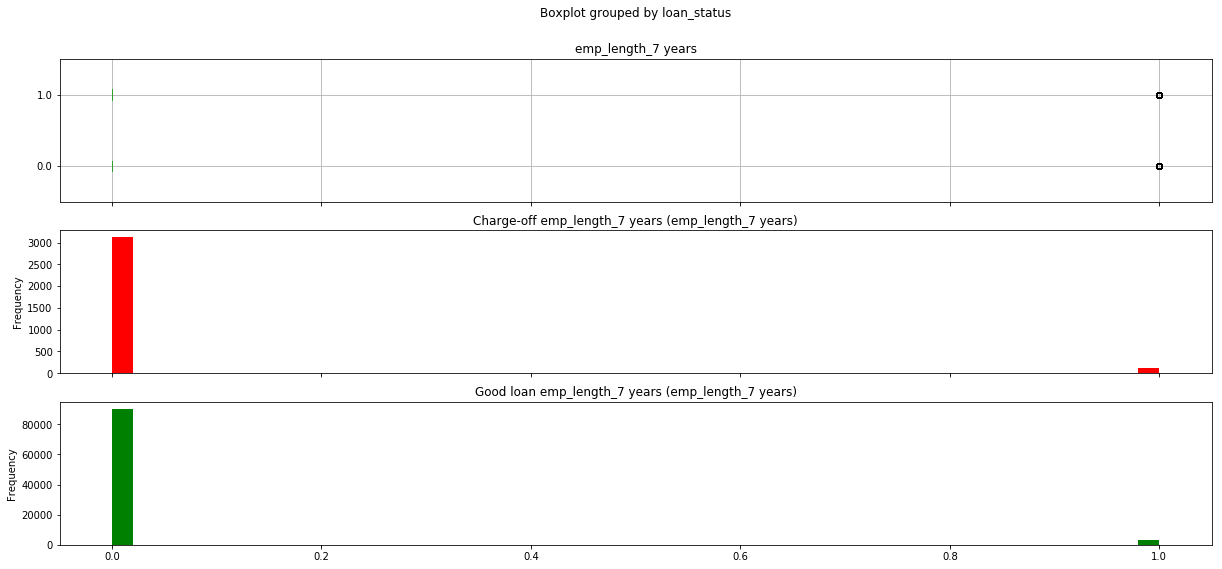

Missing values for emp_length_8 years 0


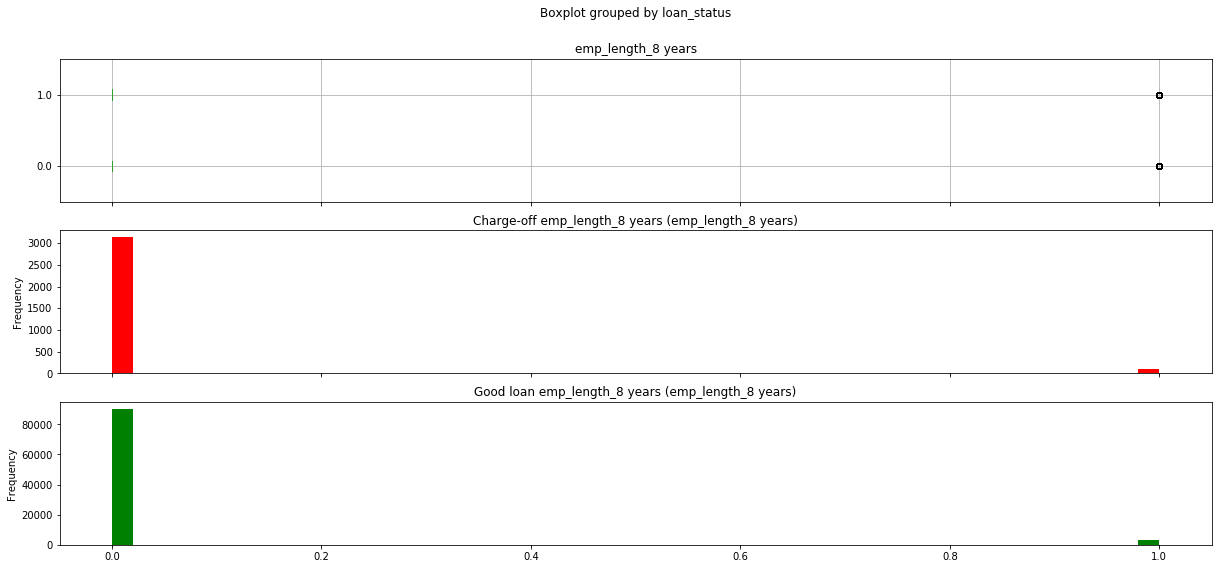

Missing values for emp_length_9 years 0


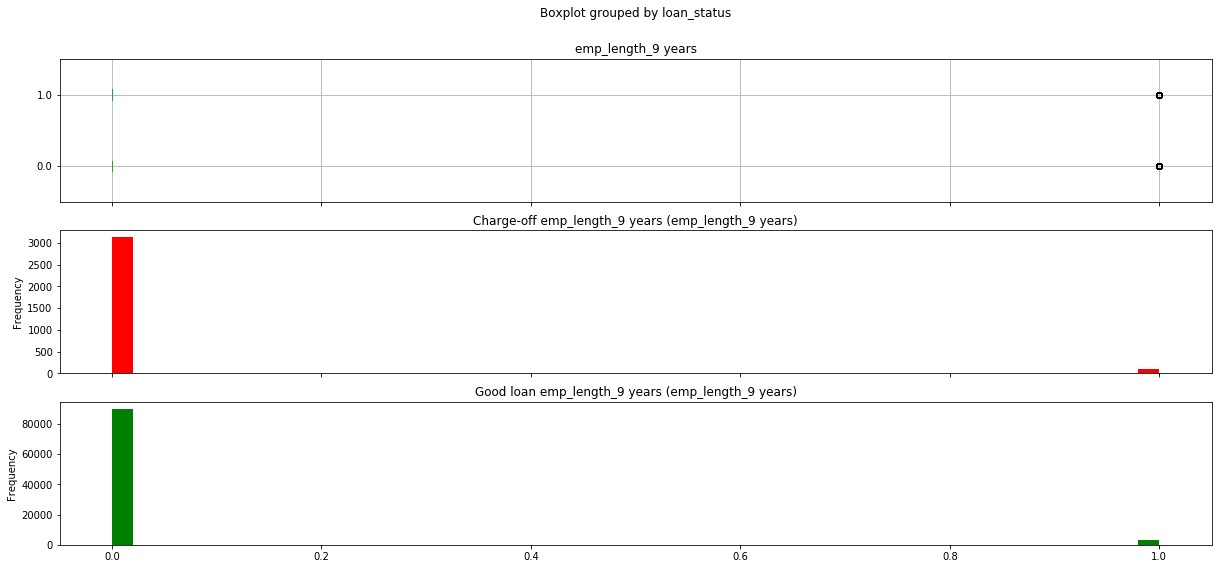

Missing values for emp_length_< 1 year 0


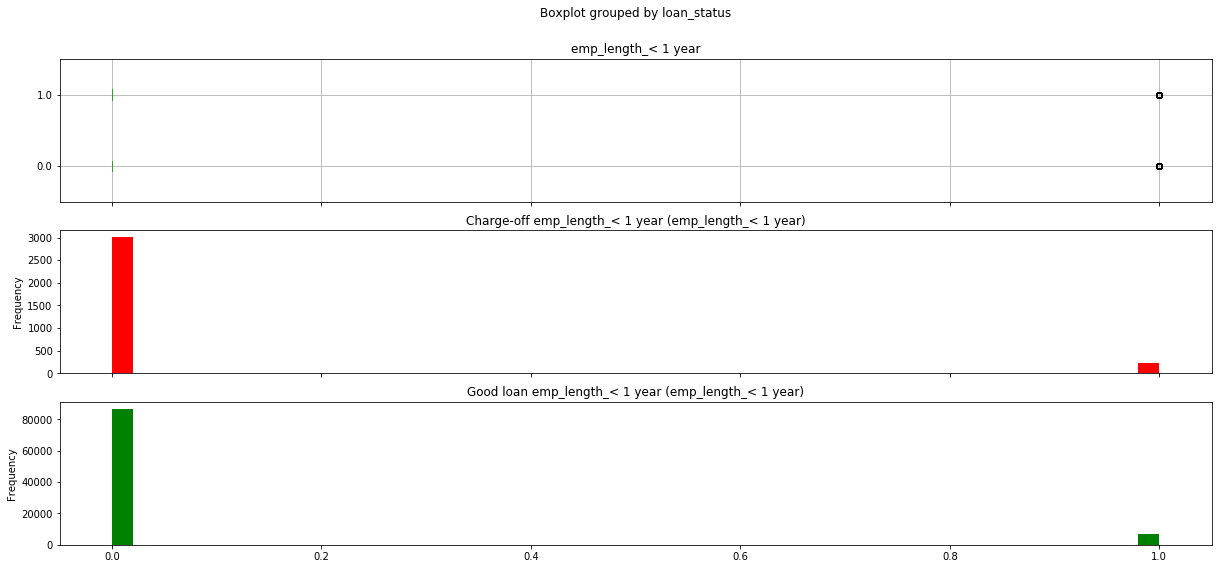

In [25]:
for col in df.columns.values:
    plot_box_hist2(df, col, col, bins=50)

### Implementation
In this section, the process for which metrics, algorithms, and techniques that you implemented for the given data will need to be clearly documented. It should be abundantly clear how the implementation was carried out, and discussion should be made regarding any complications that occurred during this process. Questions to ask yourself when writing this section:
- _Is it made clear how the algorithms and techniques were implemented with the given datasets or input data?_
- _Were there any complications with the original metrics or techniques that required changing prior to acquiring a solution?_
- _Was there any part of the coding process (e.g., writing complicated functions) that should be documented?_


I have used validation_curve from sklearn.model_selection package to find the best parameters for the classifier. I initialized the classifier and run it with a range of 

In [ ]:
    
    ftwo_scorer = make_scorer(fbeta_score, beta=2)
    train_scores, test_scores = validation_curve(clf, X, y, \
                                             param_name = 'max_features', \
                                             param_range = p_range, \
                                             cv = 3, 
                                             scoring = 'recall')

### Refinement
In this section, you will need to discuss the process of improvement you made upon the algorithms and techniques you used in your implementation. For example, adjusting parameters for certain models to acquire improved solutions would fall under the refinement category. Your initial and final solutions should be reported, as well as any significant intermediate results as necessary. Questions to ask yourself when writing this section:
- _Has an initial solution been found and clearly reported?_
- _Is the process of improvement clearly documented, such as what techniques were used?_
- _Are intermediate and final solutions clearly reported as the process is improved?_

## IV. Results
_(approx. 2-3 pages)_

### Model Evaluation and Validation
In this section, the final model and any supporting qualities should be evaluated in detail. It should be clear how the final model was derived and why this model was chosen. In addition, some type of analysis should be used to validate the robustness of this model and its solution, such as manipulating the input data or environment to see how the model’s solution is affected (this is called sensitivity analysis). Questions to ask yourself when writing this section:
- _Is the final model reasonable and aligning with solution expectations? Are the final parameters of the model appropriate?_
- _Has the final model been tested with various inputs to evaluate whether the model generalizes well to unseen data?_
- _Is the model robust enough for the problem? Do small perturbations (changes) in training data or the input space greatly affect the results?_
 - Run prediction on different quarters.
 
- _Can results found from the model be trusted?_

### Justification
In this section, your model’s final solution and its results should be compared to the benchmark you established earlier in the project using some type of statistical analysis. You should also justify whether these results and the solution are significant enough to have solved the problem posed in the project. Questions to ask yourself when writing this section:
- _Are the final results found stronger than the benchmark result reported earlier?_
- _Have you thoroughly analyzed and discussed the final solution?_
- _Is the final solution significant enough to have solved the problem?_

## V. Conclusion
_(approx. 1-2 pages)_

### Free-Form Visualization
In this section, you will need to provide some form of visualization that emphasizes an important quality about the project. It is much more free-form, but should reasonably support a significant result or characteristic about the problem that you want to discuss. Questions to ask yourself when writing this section:
- _Have you visualized a relevant or important quality about the problem, dataset, input data, or results?_
- _Is the visualization thoroughly analyzed and discussed?_
- _If a plot is provided, are the axes, title, and datum clearly defined?_

Visualize profit growth with added percentage interest.
Relate default rate to interest.

### Reflection
In this section, you will summarize the entire end-to-end problem solution and discuss one or two particular aspects of the project you found interesting or difficult. You are expected to reflect on the project as a whole to show that you have a firm understanding of the entire process employed in your work. Questions to ask yourself when writing this section:
- _Have you thoroughly summarized the entire process you used for this project?_
- _Were there any interesting aspects of the project?_
- _Were there any difficult aspects of the project?_
- _Does the final model and solution fit your expectations for the problem, and should it be used in a general setting to solve these types of problems?_

### Improvement
In this section, you will need to provide discussion as to how one aspect of the implementation you designed could be improved. As an example, consider ways your implementation can be made more general, and what would need to be modified. You do not need to make this improvement, but the potential solutions resulting from these changes are considered and compared/contrasted to your current solution. Questions to ask yourself when writing this section:
- _Are there further improvements that could be made on the algorithms or techniques you used in this project?_
- _Were there algorithms or techniques you researched that you did not know how to implement, but would consider using if you knew how?_
- _If you used your final solution as the new benchmark, do you think an even better solution exists?_

-----------

**Before submitting, ask yourself. . .**

- Does the project report you’ve written follow a well-organized structure similar to that of the project template?
- Is each section (particularly **Analysis** and **Methodology**) written in a clear, concise and specific fashion? Are there any ambiguous terms or phrases that need clarification?
- Would the intended audience of your project be able to understand your analysis, methods, and results?
- Have you properly proof-read your project report to assure there are minimal grammatical and spelling mistakes?
- Are all the resources used for this project correctly cited and referenced?
- Is the code that implements your solution easily readable and properly commented?
- Does the code execute without error and produce results similar to those reported?